In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import time
import tensorflow as tf

# Read our New York registrations Dataset

In [2]:
#This dataset shows the electric vehicles registrations currently registered accross New York State
NYS_registrations_df = pd.read_csv('Resources/NYS Electric Vehicle Registrations.csv')
NYS_registrations_df.head()

Record Type              VIN Registration Class       City State    Zip  \
0         VEH      96722014661                SRF     BOVINA    NY  13740   
1         VEH          9106843                SRF   GLENDALE    NY  11385   
2         VEH       909SR2223A                SRF   STAFFORD    NY  14143   
3         VEH  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095   
4         VEH         9A204759                SPC   BROOKLYN    NY  11211   

     County  Model Year   Make Body Type Fuel Type  Unladen Weight  \
0  DELAWARE        1972   SAAB      2DSD  ELECTRIC          2000.0   
1    QUEENS        1974    EVA      4DSD  ELECTRIC          2180.0   
2   GENESEE        1979  CITIC      2DSD  ELECTRIC           850.0   
3    FULTON        2012  VANTA      PICK  ELECTRIC          1900.0   
4     KINGS        2014  CROWN      P/SH  ELECTRIC          3335.0   

   Maximum Gross Weight  Passengers Reg Valid Date Reg Expiration Date Color  \
0                   NaN         NaN     05/04/2021          06/26/2023    WH   
1                   NaN         NaN     09/21/2021          10/03/2023    BR   
2                   NaN         NaN     05/12/2021          04/01/2023    GR   
3                   NaN         NaN     07/01/2014                 NaN    WH   
4                   NaN         NaN     12/09/2021          12/31/2022    WH   

  Scofflaw Indicator Suspension Indicator Revocation Indicator  
0                  N                    N                    N  
1                  N                    N                    N  
2                  N                    N                    N  
3                  N                    N                    N  
4                  N                    N                    N

In [3]:
# We want to find out all the columns we have in our dataset
NYS_registrations_df.columns

Index(['Record Type', 'VIN', 'Registration Class', 'City', 'State', 'Zip',
       'County', 'Model Year', 'Make', 'Body Type', 'Fuel Type',
       'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
       'Reg Valid Date', 'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator'],
      dtype='object')

In [4]:
#  Let's drop the columns we will not use
# We choose to drop the columns below because they do not have an inpact on our analysis
drop_cols = ['Record Type', 'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
          'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator']
NYS_registrations_df.drop(drop_cols, axis=1, inplace=True)
NYS_registrations_df.head()

VIN Registration Class       City State    Zip    County  \
0      96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1          9106843                SRF   GLENDALE    NY  11385    QUEENS   
2       909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4         9A204759                SPC   BROOKLYN    NY  11211     KINGS   

   Model Year   Make Body Type Fuel Type Reg Valid Date  
0        1972   SAAB      2DSD  ELECTRIC     05/04/2021  
1        1974    EVA      4DSD  ELECTRIC     09/21/2021  
2        1979  CITIC      2DSD  ELECTRIC     05/12/2021  
3        2012  VANTA      PICK  ELECTRIC     07/01/2014  
4        2014  CROWN      P/SH  ELECTRIC     12/09/2021

In [5]:
# Current Registrations VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

62063

In [6]:
NYS_registrations_df['Reg Valid Date'] = pd.to_datetime(NYS_registrations_df['Reg Valid Date'])
NYS_registrations_df.head()

VIN Registration Class       City State    Zip    County  \
0      96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1          9106843                SRF   GLENDALE    NY  11385    QUEENS   
2       909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4         9A204759                SPC   BROOKLYN    NY  11211     KINGS   

   Model Year   Make Body Type Fuel Type Reg Valid Date  
0        1972   SAAB      2DSD  ELECTRIC     2021-05-04  
1        1974    EVA      4DSD  ELECTRIC     2021-09-21  
2        1979  CITIC      2DSD  ELECTRIC     2021-05-12  
3        2012  VANTA      PICK  ELECTRIC     2014-07-01  
4        2014  CROWN      P/SH  ELECTRIC     2021-12-09

In [7]:
# We will be using the Registration Year information to clean duplicates 
NYS_registrations_df['Registration year'] = NYS_registrations_df['Reg Valid Date'].dt.strftime("%Y")

# Then we will adjust the index of our New York registration Database
NYS_registrations_df.set_index('Reg Valid Date', inplace=True)
NYS_registrations_df.head()

VIN Registration Class       City State    Zip  \
Reg Valid Date                                                               
2021-05-04          96722014661                SRF     BOVINA    NY  13740   
2021-09-21              9106843                SRF   GLENDALE    NY  11385   
2021-05-12           909SR2223A                SRF   STAFFORD    NY  14143   
2014-07-01      9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095   
2021-12-09             9A204759                SPC   BROOKLYN    NY  11211   

                  County  Model Year   Make Body Type Fuel Type  \
Reg Valid Date                                                    
2021-05-04      DELAWARE        1972   SAAB      2DSD  ELECTRIC   
2021-09-21        QUEENS        1974    EVA      4DSD  ELECTRIC   
2021-05-12       GENESEE        1979  CITIC      2DSD  ELECTRIC   
2014-07-01        FULTON        2012  VANTA      PICK  ELECTRIC   
2021-12-09         KINGS        2014  CROWN      P/SH  ELECTRIC   

               Registration year  
Reg Valid Date                    
2021-05-04                  2021  
2021-09-21                  2021  
2021-05-12                  2021  
2014-07-01                  2014  
2021-12-09                  2021

# Looking for duplicates

In [8]:
# let's see the duplicates accross the data set
duplicates = NYS_registrations_df[NYS_registrations_df.duplicated()]
duplicates.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Registration year     0
dtype: int64

In [9]:
# inspection of City duplicates
NYS_registrations_df[NYS_registrations_df.duplicated('City')]

VIN Registration Class           City State  \
Reg Valid Date                                                              
2022-01-31      7SAYGDEF9NF365467                PAS       BROOKLYN    NY   
2022-01-12      7SAYGDEF9NF337765                OMT       BROOKLYN    NY   
2021-12-15      7SAYGDEF9NF328094                PAS          BRONX    NY   
2021-12-18      7SAYGDEF9NF326491                PAS       NEW YORK    NY   
2022-01-18      7SAYGDEF9NF325096                PAS  STATEN ISLAND    NY   
...                           ...                ...            ...   ...   
2021-10-27            A976B08198T                SPC       BROOKLYN    NY   
2021-10-27            A976B07325S                SPC       BROOKLYN    NY   
2021-10-27            A976B06198R                SPC       BROOKLYN    NY   
2014-07-18            A969N02801M                PSD         CORONA    NY   
2014-08-06              A83T50116                PSD         CORONA    NY   

                  Zip    County  Model Year   Make Body Type Fuel Type  \
Reg Valid Date                                                           
2022-01-31      11249     KINGS        2022  TESLA      SUBN  ELECTRIC   
2022-01-12      11229     KINGS        2022  TESLA      SUBN  ELECTRIC   
2021-12-15      10465     BRONX        2022  TESLA      SUBN  ELECTRIC   
2021-12-18      10025  NEW YORK        2022  TESLA      SUBN  ELECTRIC   
2022-01-18      10305  RICHMOND        2022  TESLA      SUBN  ELECTRIC   
...               ...       ...         ...    ...       ...       ...   
2021-10-27      11232     KINGS        2019   YALE       SWT  ELECTRIC   
2021-10-27      11232     KINGS        2018   YALE      P/SH  ELECTRIC   
2021-10-27      11232     KINGS        2017   YALE      P/SH  ELECTRIC   
2014-07-18      11368    QUEENS        2014   YALE      P/SH  ELECTRIC   
2014-08-06      11368    QUEENS        2010    TCM      P/SH  ELECTRIC   

               Registration year  
Reg Valid Date                    
2022-01-31                  2022  
2022-01-12                  2022  
2021-12-15                  2021  
2021-12-18                  2021  
2022-01-18                  2022  
...                          ...  
2021-10-27                  2021  
2021-10-27                  2021  
2021-10-27                  2021  
2014-07-18                  2014  
2014-08-06                  2014  

[60077 rows x 11 columns]

In [10]:
# inspection of Date/VIN/County duplicates
inspection= NYS_registrations_df[NYS_registrations_df.duplicated(subset=['Registration year','VIN', 'County'], keep=False)].sort_values('VIN')
inspection.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Registration year     0
dtype: int64

In [11]:
# inspection of Date/VIN duplicates
inspect_date_vin = NYS_registrations_df[NYS_registrations_df.duplicated(subset=['Registration year','VIN'], keep=False)].sort_values('VIN')
inspect_date_vin.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Registration year     0
dtype: int64

# Addressing potential Null Values

In [12]:
NYS_registrations_df.isna().sum()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Registration year     0
dtype: int64

In [13]:
# we want to see the unique Make in our dataset
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVA', 'CITIC', 'VANTA', 'CROWN', 'DE/EL', 'MANIT',
       'HONDA', 'TESLA', 'AMPER', 'PROTE', 'VOLVO', 'CENNT', 'ARCIM',
       'RIVIA', 'TOYOT', 'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO',
       'ZE/MO', 'AZURE', 'FORD', 'THINK', 'GREEN', 'SCOUT', 'NAVIS',
       'INTER', 'STAR', 'POLAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'KARM', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TESL',
       'BMW', 'TO/OU', 'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL',
       'NEWFL', 'NE/FL', 'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI',
       'NOVA', 'NOVB', 'NO/BU', 'IC', 'CR/CO', 'MITSU', 'LINCO', 'RAM',
       'ZENIT', 'ZENTI', 'FIAT', 'PIAGG', 'CHEVR', 'GMC', 'ZENN', 'CHRYS',
       'LION', 'GILLI', 'DETRO', 'VOLKS', 'ASVE', 'EA/BE', 'COM', 'COMUT',
       'CO/CA', 'KALMA', 'AMPHI', 'CRAYL', 'CUSHM', 'EZ/GO', 'OHAWA',
       'ORANG', 'ORAN', 'ZELEC', 'ZEV', 'ORION', 'OROIN', 'ORON', 'IRION',
       'OTION', 'NISSA', 'PRO', 'JOHND', 'JO/DE', 'LI/SE', 'STING',
    

In [14]:
len(NYS_registrations_df['Make'].unique())

197

In [15]:
# Next we can see some vehicles name are just mispelled or have an a different name , we will group by the OEM.
NYS_registrations_df['Make'].replace(['CROWN', 'TOYOT'], 'TOYOTA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORION','OTION','OROIN','IRION','ORON','ENERG'], 'FORD', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NOVB', 'NOVA','IRION'], 'NOVA BUS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NEWFL', 'NE/FL'], 'NEW FLYER', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['DOOH', 'DOOHA'], 'DOOHAN', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['JAGUA','JAG'], 'JAGUAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORAN','ORANG'], 'ORANGE EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['MILE','MILES'], 'MILES EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['GENU','GENUI'], 'GENESIS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['KARM', 'FISKE','KALMA'], 'KARMA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['PIAGG','VESPA'], 'PIAGGIO', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ZERO','ZE/MO'], 'ZERO EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['POLRD','POLAR','POLES','POLE'], 'POLESTAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['CITIC','CITC'], 'HONDA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['VOLKS', 'SCOUT'],'VOLKSWAGEN',
                    inplace=True)
NYS_registrations_df['Make'].replace(['CHRIS','CHRYS','CRAYL'], 
                    'CHRYSLER', inplace=True)
NYS_registrations_df['Make'].replace('SUBAR', 'SUBARU', inplace=True)
NYS_registrations_df['Make'].replace('TESL', 'TESLA', inplace=True)
NYS_registrations_df['Make'].replace('FREIG', 'FREIGHT LINER', inplace=True)
NYS_registrations_df['Make'].replace('PORSC', 'PORSCHE', inplace=True)
NYS_registrations_df['Make'].replace('NIUU', 'NIU', inplace=True)
NYS_registrations_df['Make'].replace('LINCO', 'LINCOLN', inplace=True)
NYS_registrations_df['Make'].replace('VANTA', 'BMW', inplace=True)
NYS_registrations_df['Make'].replace('CASE', 'CAKE', inplace=True)
NYS_registrations_df['Make'].replace('NISSA', 'NISSAN', inplace=True)
NYS_registrations_df['Make'].replace('SUZUK', 'SUZUKI', inplace=True)
NYS_registrations_df['Make'].replace('RIVIA', 'RIVIAN', inplace=True)
NYS_registrations_df['Make'].replace('GREEN', 'GREENPOWER MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('HYUND', 'HYUNDAI', inplace=True)
NYS_registrations_df['Make'].replace('CENNT', 'CENNTRO', inplace=True)
NYS_registrations_df['Make'].replace('PROTE', 'PROTERRA', inplace=True)
NYS_registrations_df['Make'].replace(['INTER','STAR','OTHER'], 'INTERNATIONAL',
                                     inplace=True)
NYS_registrations_df['Make'].replace(['MITSU','FUSO' ],'MITSUBISHI', 
                                     inplace=True)
NYS_registrations_df['Make'].replace(['IC','ICE','IC/PN' ],'ICBUS', 
                                     inplace=True)
NYS_registrations_df['Make'].replace('ZELEC', 'ZELECTRIC MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('KAWAS', 'KAWASAKI', inplace=True)
NYS_registrations_df['Make'].replace('EVA', 'EVI', inplace=True)
NYS_registrations_df['Make'].replace('EVTA', 'EVT', inplace=True)
NYS_registrations_df['Make'].replace('CHEVR', 'CHEVROLET', inplace=True)

In [16]:
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVI', 'HONDA', 'BMW', 'TOYOTA', 'DE/EL', 'MANIT', 'TESLA',
       'AMPER', 'PROTERRA', 'VOLVO', 'CENNTRO', 'ARCIM', 'RIVIAN',
       'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO EV', 'AZURE', 'FORD',
       'THINK', 'GREENPOWER MOTORS', 'VOLKSWAGEN', 'NAVIS',
       'INTERNATIONAL', 'POLESTAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TO/OU',
       'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL', 'NEW FLYER',
       'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI', 'NOVA BUS', 'NO/BU',
       'ICBUS', 'CR/CO', 'MITSUBISHI', 'LINCOLN', 'RAM', 'ZENIT', 'ZENTI',
       'FIAT', 'PIAGGIO', 'CHEVROLET', 'GMC', 'ZENN', 'CHRYSLER', 'LION',
       'GILLI', 'DETRO', 'ASVE', 'EA/BE', 'COM', 'COMUT', 'CO/CA',
       'AMPHI', 'CUSHM', 'EZ/GO', 'OHAWA', 'ORANGE EV',
       'ZELECTRIC MOTORS', 'ZEV', 'NISSAN', 'PRO', 'JOHND', 'JO/DE',
       'LI/SE', 'STING', 'HA/DA', 'LIVEW', 'MEVH', 'CADIL',
       'FREIGHT LINER', 'TRANT', 'EGO', 'ETU

In [17]:
len(NYS_registrations_df['Make'].unique())
# A DROP FROM 197 TO 162

162

In [18]:
NYS_registrations_df

VIN Registration Class       City State    Zip  \
Reg Valid Date                                                               
2021-05-04          96722014661                SRF     BOVINA    NY  13740   
2021-09-21              9106843                SRF   GLENDALE    NY  11385   
2021-05-12           909SR2223A                SRF   STAFFORD    NY  14143   
2014-07-01      9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095   
2021-12-09             9A204759                SPC   BROOKLYN    NY  11211   
...                         ...                ...        ...   ...    ...   
2021-10-27          A976B08198T                SPC   BROOKLYN    NY  11232   
2021-10-27          A976B07325S                SPC   BROOKLYN    NY  11232   
2021-10-27          A976B06198R                SPC   BROOKLYN    NY  11232   
2014-07-18          A969N02801M                PSD     CORONA    NY  11368   
2014-08-06            A83T50116                PSD     CORONA    NY  11368   

                  County  Model Year    Make Body Type Fuel Type  \
Reg Valid Date                                                     
2021-05-04      DELAWARE        1972    SAAB      2DSD  ELECTRIC   
2021-09-21        QUEENS        1974     EVI      4DSD  ELECTRIC   
2021-05-12       GENESEE        1979   HONDA      2DSD  ELECTRIC   
2014-07-01        FULTON        2012     BMW      PICK  ELECTRIC   
2021-12-09         KINGS        2014  TOYOTA      P/SH  ELECTRIC   
...                  ...         ...     ...       ...       ...   
2021-10-27         KINGS        2019    YALE       SWT  ELECTRIC   
2021-10-27         KINGS        2018    YALE      P/SH  ELECTRIC   
2021-10-27         KINGS        2017    YALE      P/SH  ELECTRIC   
2014-07-18        QUEENS        2014    YALE      P/SH  ELECTRIC   
2014-08-06        QUEENS        2010     TCM      P/SH  ELECTRIC   

               Registration year  
Reg Valid Date                    
2021-05-04                  2021  
2021-09-21                  2021  
2021-05-12                  2021  
2014-07-01                  2014  
2021-12-09                  2021  
...                          ...  
2021-10-27                  2021  
2021-10-27                  2021  
2021-10-27                  2021  
2014-07-18                  2014  
2014-08-06                  2014  

[62063 rows x 11 columns]

In [19]:
# we then find the count for each Make in our dataset
NYS_registrations_df['Make' ].value_counts()

TESLA        37137
NIU           6918
HYUNDAI       3130
FORD          3082
CHEVROLET     3044
             ...  
CUSHM            1
AMPHI            1
CO/CA            1
COMUT            1
TCM              1
Name: Make, Length: 162, dtype: int64

In [20]:
# Looking at the Make for Yale to see if it's actually a car.
# base on the registration class  SPC stand for self parking cars as found here https://www.allacronyms.com/SPC/car
NYS_registrations_df[NYS_registrations_df['Make' ]=='YALE']

VIN Registration Class       City State    Zip  \
Reg Valid Date                                                           
2021-12-09          N336261                SPC  HAUPPAUGE    NY  11788   
2021-11-21           N30346                SPC   NEW YORK    NY  10002   
2021-12-14      G807N09683P                SPC   BROOKLYN    NY  11218   
2021-11-24      G807N09057N                SPC   BROOKLYN    NY  11206   
2021-10-29      F807N04372D                SPC    ASTORIA    NY  11105   
2021-10-29      E216A01721E                SPC    ASTORIA    NY  11105   
2021-10-29      E216A01715E                SPC    ASTORIA    NY  11105   
2021-12-14      D875V06421P                SPC   BROOKLYN    NY  11218   
2021-12-14      D875V06225P                SPC   BROOKLYN    NY  11218   
2021-12-14      D875V05953P                SPC   BROOKLYN    NY  11218   
2021-10-29      D216A02259C                SPC   BETHPAGE    NY  11714   
2021-10-29      D216A02258C                SPC      BRONX    NY  10473   
2021-10-29      D216A02257C                SPC      BRONX    NY  10473   
2021-10-29      D216A02254C                SPC      BRONX    NY  10473   
2020-03-18      C839N02158H                PSD   FLUSHING    NY  11373   
2021-12-08      B974V02082N                SPC   BROOKLYN    NY  11214   
2021-11-23      B807N01689U                SPC   NEW YORK    NY  10002   
2022-01-24      A976B09580U                SPC   BROOKLYN    NY  11232   
2021-10-27      A976B08198T                SPC   BROOKLYN    NY  11232   
2021-10-27      A976B07325S                SPC   BROOKLYN    NY  11232   
2021-10-27      A976B06198R                SPC   BROOKLYN    NY  11232   
2014-07-18      A969N02801M                PSD     CORONA    NY  11368   

                  County  Model Year  Make Body Type Fuel Type  \
Reg Valid Date                                                   
2021-12-09       SUFFOLK        1978  YALE       SWT  ELECTRIC   
2021-11-21      NEW YORK        1972  YALE      P/SH  ELECTRIC   
2021-12-14         KINGS        2016  YALE      P/SH  ELECTRIC   
2021-11-24         KINGS        2015  YALE      P/SH  ELECTRIC   
2021-10-29        QUEENS        2006  YALE       SWT  ELECTRIC   
2021-10-29        QUEENS        2007  YALE       SWT  ELECTRIC   
2021-10-29        QUEENS        2007  YALE       SWT  ELECTRIC   
2021-12-14         KINGS        2016  YALE      P/SH  ELECTRIC   
2021-12-14         KINGS        2016  YALE      P/SH  ELECTRIC   
2021-12-14         KINGS        2016  YALE      P/SH  ELECTRIC   
2021-10-29        NASSAU        2005  YALE       SWT  ELECTRIC   
2021-10-29         BRONX        2005  YALE       SWT  ELECTRIC   
2021-10-29         BRONX        2005  YALE       SWT  ELECTRIC   
2021-10-29         BRONX        2005  YALE       SWT  ELECTRIC   
2020-03-18        QUEENS        2010  YALE       SWT  ELECTRIC   
2021-12-08         KINGS        2015  YALE      P/SH  ELECTRIC   
2021-11-23      NEW YORK        1997  YALE      P/SH  ELECTRIC   
2022-01-24         KINGS        2020  YALE      P/SH  ELECTRIC   
2021-10-27         KINGS        2019  YALE       SWT  ELECTRIC   
2021-10-27         KINGS        2018  YALE      P/SH  ELECTRIC   
2021-10-27         KINGS        2017  YALE      P/SH  ELECTRIC   
2014-07-18        QUEENS        2014  YALE      P/SH  ELECTRIC   

               Registration year  
Reg Valid Date                    
2021-12-09                  2021  
2021-11-21                  2021  
2021-12-14                  2021  
2021-11-24                  2021  
2021-10-29                  2021  
2021-10-29                  2021  
2021-10-29                  2021  
2021-12-14                  2021  
2021-12-14                  2021  
2021-12-14                  2021  
2021-10-29                  2021  
2021-10-29                  2021  
2021-10-29                  2021  
2021-10-29                  2021  
2020-03-18                  2020  
2021-12-08                  2021  
2021-11-23                  2021

In [21]:
# for the purpose of our analysis , we will filter  the dataset by Model year equal or  later than 2012 to have a decade of dataset.
NYS_registrations_df= NYS_registrations_df[NYS_registrations_df['Model Year'] >= 2012] 
NYS_registrations_df

VIN Registration Class           City State  \
Reg Valid Date                                                            
2014-07-01      9E2SPAXBC113501                PSD      JOHNSTOWN    NY   
2021-12-09             9A204759                SPC       BROOKLYN    NY   
2021-11-16              9A19709                SPC    FARMINGDALE    NY   
2021-10-19               854087                SPC          DEPEW    NY   
2021-08-11             7.85E+14                LMB  STATEN ISLAND    NY   
...                         ...                ...            ...   ...   
2022-01-24          A976B09580U                SPC       BROOKLYN    NY   
2021-10-27          A976B08198T                SPC       BROOKLYN    NY   
2021-10-27          A976B07325S                SPC       BROOKLYN    NY   
2021-10-27          A976B06198R                SPC       BROOKLYN    NY   
2014-07-18          A969N02801M                PSD         CORONA    NY   

                  Zip    County  Model Year    Make Body Type Fuel Type  \
Reg Valid Date                                                            
2014-07-01      12095    FULTON        2012     BMW      PICK  ELECTRIC   
2021-12-09      11211     KINGS        2014  TOYOTA      P/SH  ELECTRIC   
2021-11-16      11735   SUFFOLK        2013  TOYOTA       SWT  ELECTRIC   
2021-10-19      14043      ERIE        2016   MANIT       SWT  ELECTRIC   
2021-08-11      10302  RICHMOND        2019   HONDA      MOPD  ELECTRIC   
...               ...       ...         ...     ...       ...       ...   
2022-01-24      11232     KINGS        2020    YALE      P/SH  ELECTRIC   
2021-10-27      11232     KINGS        2019    YALE       SWT  ELECTRIC   
2021-10-27      11232     KINGS        2018    YALE      P/SH  ELECTRIC   
2021-10-27      11232     KINGS        2017    YALE      P/SH  ELECTRIC   
2014-07-18      11368    QUEENS        2014    YALE      P/SH  ELECTRIC   

               Registration year  
Reg Valid Date                    
2014-07-01                  2014  
2021-12-09                  2021  
2021-11-16                  2021  
2021-10-19                  2021  
2021-08-11                  2021  
...                          ...  
2022-01-24                  2022  
2021-10-27                  2021  
2021-10-27                  2021  
2021-10-27                  2021  
2014-07-18                  2014  

[59955 rows x 11 columns]

In [22]:
# Registration VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

59955

<AxesSubplot:>

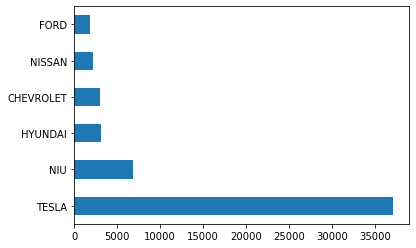

In [23]:
import matplotlib.pyplot as plt
#let's get unique values  for the top 6 Makes
Make_counts = NYS_registrations_df.Make.value_counts()
Make_counts[:6].plot(kind = 'barh')

<AxesSubplot:>

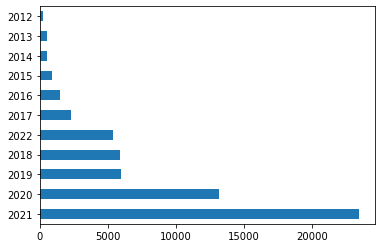

In [24]:
#let's get unique values  for the Model Year acrross the state
Model_year_counts = NYS_registrations_df['Model Year'].value_counts()
Model_year_counts.plot(kind = 'barh')

In [25]:
#let's get counts  for the Registration class
Regist_class_counts = NYS_registrations_df['Registration Class'].value_counts()
Regist_class_counts

PAS    45616
LMB     6915
SRF     2907
PSD     1125
OMT      759
MED      531
ORG      482
MOT      373
LUA      354
OMS      230
COM      144
RGL      144
SPO      104
STA       51
OMR       37
HAM       29
ITP       28
SPC       24
VAS       18
ATV       15
BOB       11
LMC       10
SRN       10
TRC        8
LMA        7
OML        5
ARG        4
OMV        2
ORM        2
SUP        2
JCA        1
SOS        1
STG        1
NYA        1
AGR        1
SCL        1
AYG        1
JSC        1
Name: Registration Class, dtype: int64

<AxesSubplot:>

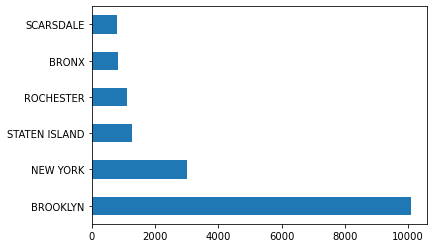

In [26]:
#let's get values counts for the top 6 Cities in the State
City_counts= NYS_registrations_df.City.value_counts()
City_counts[:6].plot(kind = 'barh')

<AxesSubplot:>

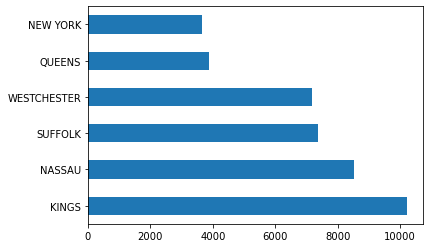

In [27]:
#let's get  values counts  for County
County_counts= NYS_registrations_df.County.value_counts()
County_counts[:6].plot(kind = 'barh')

In [28]:
#let's get all the Registration year counts
reg_year_counts= NYS_registrations_df['Registration year'].value_counts()
reg_year_counts

2021    40356
2020    13864
2022     4875
2019      230
2018      213
2017      148
2016      110
2014      108
2015       51
Name: Registration year, dtype: int64

In [29]:
# for the purpose of our analysis since 2022 is not over yet we will drop the registrations for the year 2022. 
#we will then focus on registration or sale year from 2015-2021
reg_year_counts= reg_year_counts.drop('2022')
reg_year_counts


2021    40356
2020    13864
2019      230
2018      213
2017      148
2016      110
2014      108
2015       51
Name: Registration year, dtype: int64

In [30]:
'''Slicing out new car purchases for each county, parsing information to a 
dictionary, changing index to be monthly and taking cumulative sum to convert
information to cars on the road'''

county_dict = {}
for county in list(NYS_registrations_df ['County'].unique()):
    county_dict[county] = NYS_registrations_df[
        (NYS_registrations_df['County']==county)
        
    ].resample('M').size().cumsum()

In [31]:
#filling null values created by resampling with 0's.
df_cumsum = pd.DataFrame(county_dict)
df_cumsum.fillna(0, inplace=True)
df_cumsum.head()

FULTON  KINGS  SUFFOLK  ERIE  RICHMOND  NASSAU  ROCKLAND  \
Reg Valid Date                                                             
2014-04-30         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-05-31         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-06-30         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-07-31         1.0    4.0      0.0   0.0       0.0     0.0       0.0   
2014-08-31         1.0    4.0      0.0   0.0       0.0     0.0       0.0   

                QUEENS  WESTCHESTER  SARATOGA  ...  CATTARAUGUS  HERKIMER  \
Reg Valid Date                                 ...                          
2014-04-30         0.0          0.0       0.0  ...          0.0       0.0   
2014-05-31         0.0          0.0       0.0  ...          0.0       0.0   
2014-06-30         0.0          0.0       0.0  ...          0.0       0.0   
2014-07-31        18.0          0.0       0.0  ...          0.0       0.0   
2014-08-31        25.0          0.0       0.0  ...          0.0       0.0   

                HAMILTON  MONTGOMERY  ORLEANS  YATES  FRANKLIN  DELAWARE  \
Reg Valid Date                                                             
2014-04-30           0.0         0.0      0.0    0.0       0.0       0.0   
2014-05-31           0.0         0.0      0.0    0.0       0.0       0.0   
2014-06-30           0.0         0.0      0.0    0.0       0.0       0.0   
2014-07-31           0.0         0.0      0.0    0.0       0.0       0.0   
2014-08-31           0.0         0.0      0.0    0.0       0.0       0.0   

                WASHINGTON  CHENANGO  
Reg Valid Date                        
2014-04-30             0.0       0.0  
2014-05-31             0.0       0.0  
2014-06-30             0.0       0.0  
2014-07-31             0.0       0.0  
2014-08-31             0.0       0.0  

[5 rows x 63 columns]

## Electric Vehicles on the Road in NY State Over Time

Before we take a look at the electric vehicle trends for each county, it is important to see the larger picture by looking at the statewide trend.

In [32]:
#summing each row to get monthly statewide total 
df_cumsum['State Total'] = df_cumsum.sum(axis=1)
df_cumsum.head()

FULTON  KINGS  SUFFOLK  ERIE  RICHMOND  NASSAU  ROCKLAND  \
Reg Valid Date                                                             
2014-04-30         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-05-31         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-06-30         0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2014-07-31         1.0    4.0      0.0   0.0       0.0     0.0       0.0   
2014-08-31         1.0    4.0      0.0   0.0       0.0     0.0       0.0   

                QUEENS  WESTCHESTER  SARATOGA  ...  HERKIMER  HAMILTON  \
Reg Valid Date                                 ...                       
2014-04-30         0.0          0.0       0.0  ...       0.0       0.0   
2014-05-31         0.0          0.0       0.0  ...       0.0       0.0   
2014-06-30         0.0          0.0       0.0  ...       0.0       0.0   
2014-07-31        18.0          0.0       0.0  ...       0.0       0.0   
2014-08-31        25.0          0.0       0.0  ...       0.0       0.0   

                MONTGOMERY  ORLEANS  YATES  FRANKLIN  DELAWARE  WASHINGTON  \
Reg Valid Date                                                               
2014-04-30             0.0      0.0    0.0       0.0       0.0         0.0   
2014-05-31             0.0      0.0    0.0       0.0       0.0         0.0   
2014-06-30             0.0      0.0    0.0       0.0       0.0         0.0   
2014-07-31             0.0      0.0    0.0       0.0       0.0         0.0   
2014-08-31             0.0      0.0    0.0       0.0       0.0         0.0   

                CHENANGO  State Total  
Reg Valid Date                         
2014-04-30           0.0          3.0  
2014-05-31           0.0          3.0  
2014-06-30           0.0         13.0  
2014-07-31           0.0         47.0  
2014-08-31           0.0         66.0  

[5 rows x 64 columns]

In [33]:
df_cumsum = df_cumsum.reset_index()
df_cumsum.head()

Reg Valid Date  FULTON  KINGS  SUFFOLK  ERIE  RICHMOND  NASSAU  ROCKLAND  \
0     2014-04-30     0.0    0.0      0.0   0.0       0.0     0.0       0.0   
1     2014-05-31     0.0    0.0      0.0   0.0       0.0     0.0       0.0   
2     2014-06-30     0.0    0.0      0.0   0.0       0.0     0.0       0.0   
3     2014-07-31     1.0    4.0      0.0   0.0       0.0     0.0       0.0   
4     2014-08-31     1.0    4.0      0.0   0.0       0.0     0.0       0.0   

   QUEENS  WESTCHESTER  ...  HERKIMER  HAMILTON  MONTGOMERY  ORLEANS  YATES  \
0     0.0          0.0  ...       0.0       0.0         0.0      0.0    0.0   
1     0.0          0.0  ...       0.0       0.0         0.0      0.0    0.0   
2     0.0          0.0  ...       0.0       0.0         0.0      0.0    0.0   
3    18.0          0.0  ...       0.0       0.0         0.0      0.0    0.0   
4    25.0          0.0  ...       0.0       0.0         0.0      0.0    0.0   

   FRANKLIN  DELAWARE  WASHINGTON  CHENANGO  State Total  
0       0.0       0.0         0.0       0.0          3.0  
1       0.0       0.0         0.0       0.0          3.0  
2       0.0       0.0         0.0       0.0         13.0  
3       0.0       0.0         0.0       0.0         47.0  
4       0.0       0.0         0.0       0.0         66.0  

[5 rows x 65 columns]

In [34]:
#saving the df for dashboarding
import os
path = 'Resources'
output_file = os.path.join(path,f'vehicles_on_the_road.csv')
df_cumsum.to_csv(output_file, index=False)

# Diagrams

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

### Electric Vehicles on the Road in NYS (2012-2021)

In [36]:
reg_year_counts_df = pd.DataFrame(reg_year_counts)
reg_year_counts_df= reg_year_counts.reset_index()
reg_year_counts_df.columns = ['Year','Total Counts']
reg_year_counts_df

Year  Total Counts
0  2021         40356
1  2020         13864
2  2019           230
3  2018           213
4  2017           148
5  2016           110
6  2014           108
7  2015            51

In [37]:
#let's reindex the year column
reg_year_counts_df= reg_year_counts_df.reindex([6,7,5,4,3,2,1,0])
reg_year_counts_df

Year  Total Counts
6  2014           108
7  2015            51
5  2016           110
4  2017           148
3  2018           213
2  2019           230
1  2020         13864
0  2021         40356

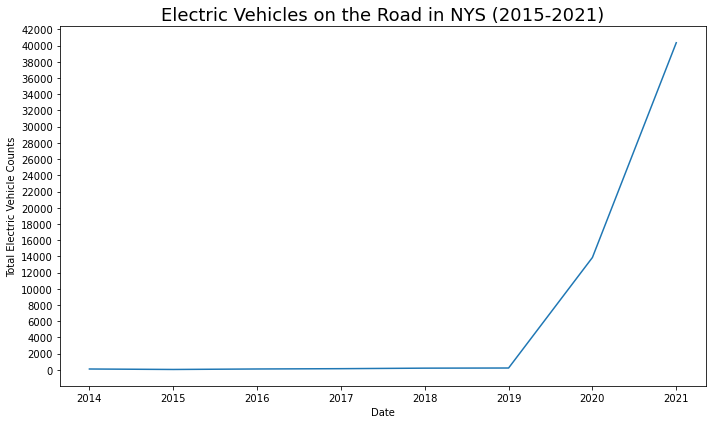

In [38]:
# Create a line chart
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='Year', y='Total Counts', data=reg_year_counts_df, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Electric Vehicles on the Road in NYS (2015-2021)',fontsize=18)
ax.set_yticks(range(0,43000,2000))
plt.tight_layout()
plt.savefig('Images/EV_on_the_road_2015_2021.png', facecolor='white');

### Total Electric Vehicle Count by City (Top 10)

In [39]:
# Count the total numbers of electric vehicle per city
City_counts_df = pd.DataFrame(City_counts)
City_counts_df= City_counts_df.reset_index()
City_counts_df.columns = ['City','Total Counts']

# Select the top 10 city
City_counts_df.sort_values('Total Counts',ascending =True)
City_counts_10_df= City_counts_df.head(10)
City_counts_10_df

City  Total Counts
0       BROOKLYN         10075
1       NEW YORK          3017
2  STATEN ISLAND          1270
3      ROCHESTER          1113
4          BRONX           830
5      SCARSDALE           810
6     GREAT NECK           590
7        SYOSSET           502
8       FLUSHING           494
9      DIX HILLS           465

In [40]:
top_10_cities = ['BROOKLYN', 'NEW YORK', 'STATEN ISLAND', 'ROCHESTER', 'BRONX', 
                  'SCARSDALE', 'GREAT NECK', 'SYOSSET', 'FLUSHING', 'DIX HILLS']

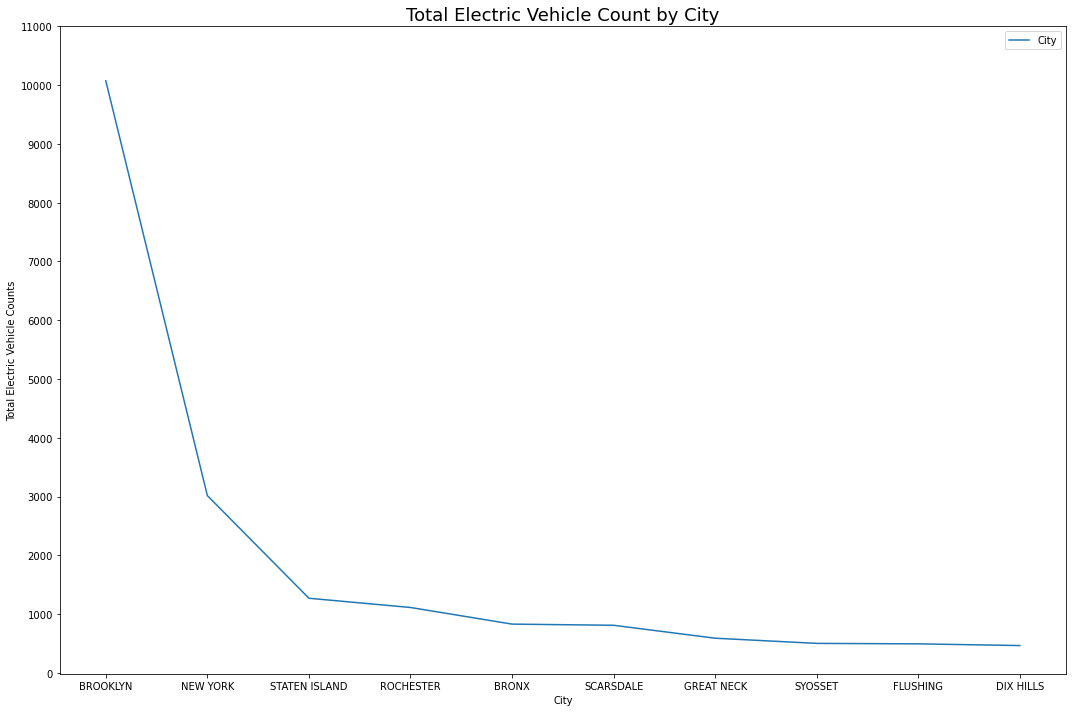

In [41]:
# Create a line chart
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='City', y='Total Counts', data=City_counts_10_df, ax=ax, label='City')
ax.set_xlabel('City')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by City',fontsize=18)
ax.set_yticks(range(0,12000,1000))
plt.tight_layout()
plt.savefig('Images/EV_Count_by_City.png', facecolor='white');

### Total Electric Vehicle Count by County over time (2015-2021)

In [42]:
County_counts_10= County_counts.head(10)
County_counts_10

KINGS          10212
NASSAU          8531
SUFFOLK         7369
WESTCHESTER     7170
QUEENS          3883
NEW YORK        3664
MONROE          2376
ERIE            1873
ROCKLAND        1346
RICHMOND        1270
Name: County, dtype: int64

In [43]:
# top 10 counties
top_10_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK','MONROE','ERIE','ROCKLAND','RICHMOND']

In [44]:
#filtering out counties to keep top 10
df_cumsum = df_cumsum.loc[:, ['Reg Valid Date', *top_10_county]]
df_cumsum.head()

Reg Valid Date  KINGS  NASSAU  SUFFOLK  WESTCHESTER  QUEENS  NEW YORK  \
0     2014-04-30    0.0     0.0      0.0          0.0     0.0       0.0   
1     2014-05-31    0.0     0.0      0.0          0.0     0.0       0.0   
2     2014-06-30    0.0     0.0      0.0          0.0     0.0      10.0   
3     2014-07-31    4.0     0.0      0.0          0.0    18.0      21.0   
4     2014-08-31    4.0     0.0      0.0          0.0    25.0      31.0   

   MONROE  ERIE  ROCKLAND  RICHMOND  
0     0.0   0.0       0.0       0.0  
1     0.0   0.0       0.0       0.0  
2     0.0   0.0       0.0       0.0  
3     0.0   0.0       0.0       0.0  
4     0.0   0.0       0.0       0.0

In [45]:
County_counts_10_df = pd.DataFrame(County_counts_10)
County_counts_10_df = County_counts_10_df.reset_index()
County_counts_10_df.columns = ['County','Total Counts']
County_counts_10_df.sort_values('Total Counts',ascending =True)
County_counts_10_df

County  Total Counts
0        KINGS         10212
1       NASSAU          8531
2      SUFFOLK          7369
3  WESTCHESTER          7170
4       QUEENS          3883
5     NEW YORK          3664
6       MONROE          2376
7         ERIE          1873
8     ROCKLAND          1346
9     RICHMOND          1270

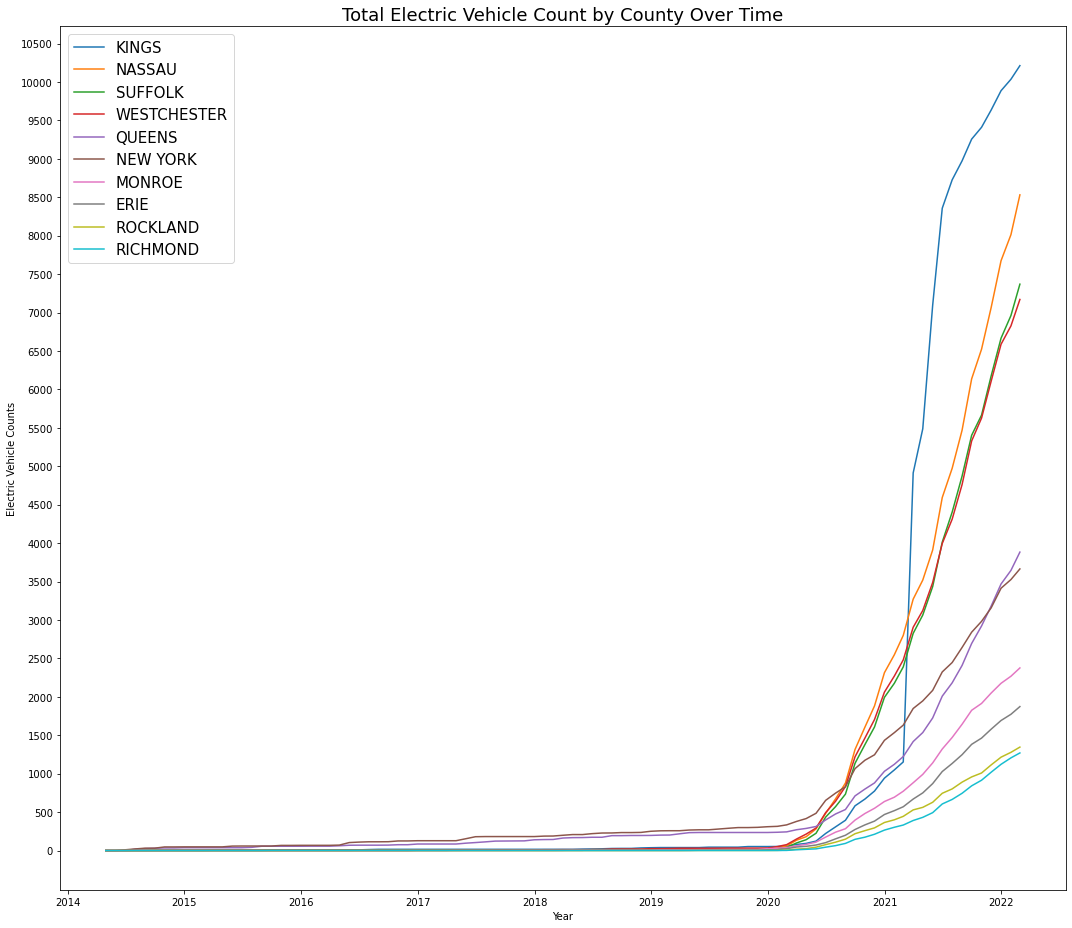

In [46]:
# Create a mutiple-line chart for the top 10 counties
fig, ax = plt.subplots(figsize=(15,13))
for county in top_10_county:
    sns.lineplot(x='Reg Valid Date', y=county, data=df_cumsum, ax=ax, 
                 label=county)

ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by County Over Time',fontsize=18)
ax.set_yticks(range(0,11000,500))
ax.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Images/EV_Count_by_County_Over_Time.png', facecolor='white');

## Most Purchased Car Models by County

In [47]:
# the top 10 counties based on the total counts of electric vehicle
County_counts_10_df

County  Total Counts
0        KINGS         10212
1       NASSAU          8531
2      SUFFOLK          7369
3  WESTCHESTER          7170
4       QUEENS          3883
5     NEW YORK          3664
6       MONROE          2376
7         ERIE          1873
8     ROCKLAND          1346
9     RICHMOND          1270

In [48]:
# top 10 counties
top_10_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK','MONROE','ERIE','ROCKLAND','RICHMOND']

### Most Purchased Models in Kings County (Top 6)

In [49]:
County_model_counts_df=NYS_registrations_df[['County','Registration year','Make']]
County_model_counts_df.head()

County Registration year    Make
Reg Valid Date                                    
2014-07-01        FULTON              2014     BMW
2021-12-09         KINGS              2021  TOYOTA
2021-11-16       SUFFOLK              2021  TOYOTA
2021-10-19          ERIE              2021   MANIT
2021-08-11      RICHMOND              2021   HONDA

In [50]:
Kings_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'KINGS')]
Kings_model_counts = Kings_counts_df.Make.value_counts()
Kings_model_counts

NIU              6877
TESLA            2679
CHEVROLET         122
HYUNDAI            99
NISSAN             59
SMART              59
FORD               41
AUDI               38
VOLKSWAGEN         32
BMW                30
KIA                28
HINO               18
INTERNATIONAL      15
PORSCHE            14
ZERO EV            12
YALE               10
POLESTAR            8
VOLVO               8
MINI                7
NEW FLYER           6
GENESIS             5
PIAGGIO             4
TOYOTA              4
FIAT                3
HONDA               3
ICBUS               2
CRUS                2
RIVIAN              2
JAGUAR              2
CUSTO               2
GENZE               2
GEM                 1
DOOSA               1
AMPER               1
SUBARU              1
ALTA                1
GE/SC               1
AZURE               1
ETUK                1
JIAJ                1
LUCID               1
HA/DA               1
BAODI               1
CY/TR               1
FLYWI               1
MITSUBISHI

In [51]:
Kings_model_counts_df = pd.DataFrame(Kings_model_counts)
Kings_model_counts_6_df = Kings_model_counts_df .reset_index().head(6)
Kings_model_counts_6_df.columns = ['Model','Total Counts']
Kings_model_counts_6_df

Model  Total Counts
0        NIU          6877
1      TESLA          2679
2  CHEVROLET           122
3    HYUNDAI            99
4     NISSAN            59
5      SMART            59

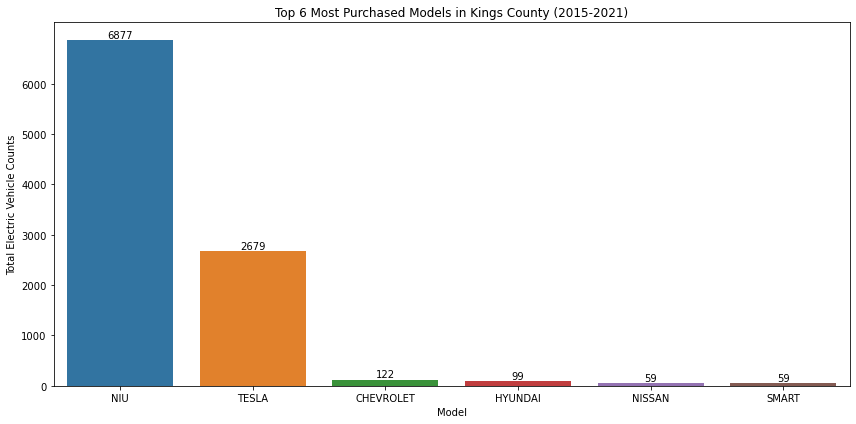

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Kings_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Kings County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_King.png', facecolor='white');

### Most Purchased Models in Nassau County (Top 6)

In [53]:
Nassau_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NASSAU')]
Nassau_model_counts = Nassau_counts_df.Make.value_counts()
#Nassau_model_counts

In [54]:
Nassau_model_counts_df = pd.DataFrame(Nassau_model_counts)
Nassau_model_counts_6_df = Nassau_model_counts_df .reset_index().head(6)
Nassau_model_counts_6_df.columns = ['Model','Total Counts']
Nassau_model_counts_6_df

Model  Total Counts
0      TESLA          6908
1    HYUNDAI           453
2       FORD           231
3    PORSCHE           176
4  CHEVROLET           168
5       AUDI           129

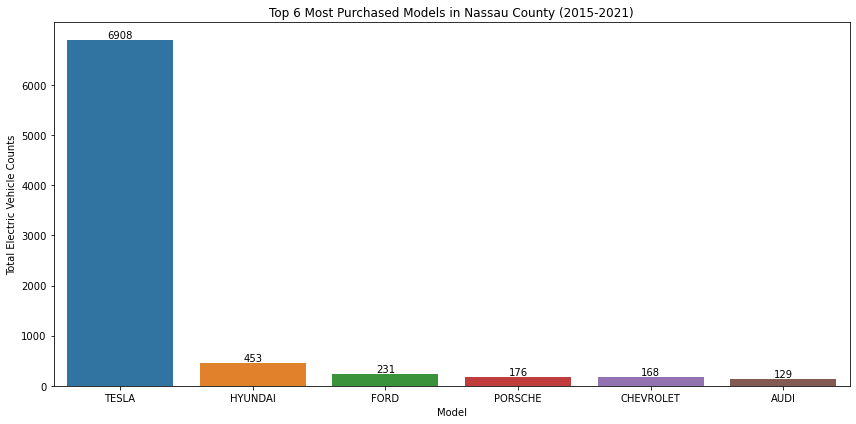

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Nassau_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Nassau County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Nassau.png', facecolor='white');

### Most Purchased Models in Suffolk County (Top 6)

In [56]:
Suffolk_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'SUFFOLK')]
Suffolk_model_counts = Suffolk_counts_df.Make.value_counts()
#Suffolk_model_counts

In [57]:
Suffolk_model_counts_df = pd.DataFrame(Suffolk_model_counts)
Suffolk_model_counts_6_df = Suffolk_model_counts_df .reset_index().head(6)
Suffolk_model_counts_6_df.columns = ['Model','Total Counts']
Suffolk_model_counts_6_df

Model  Total Counts
0      TESLA          5572
1    HYUNDAI           466
2  CHEVROLET           239
3       FORD           239
4     NISSAN           175
5    PORSCHE           102

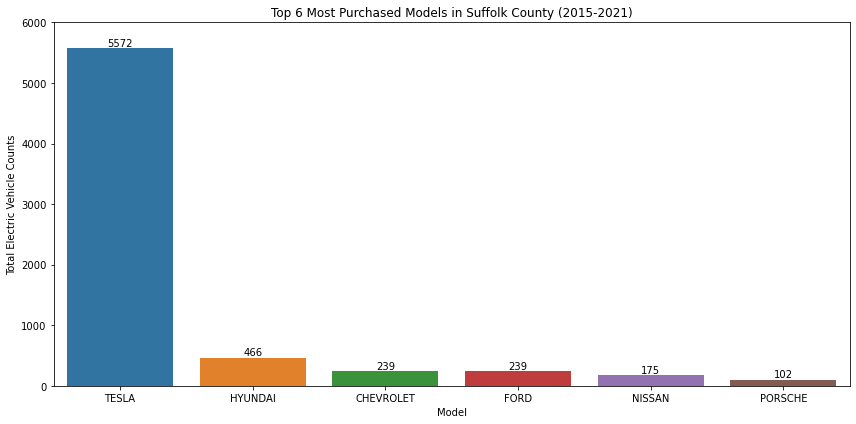

In [58]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Suffolk_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Suffolk County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Suffolk.png', facecolor='white');

### Most Purchased Models in Westchester County (Top 6)

In [59]:
Westchester_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'WESTCHESTER')]
Westchester_model_counts = Westchester_counts_df.Make.value_counts()
#Westchester_model_counts

In [60]:
Westchester_model_counts_df = pd.DataFrame(Westchester_model_counts)
Westchester_model_counts_6_df = Westchester_model_counts_df .reset_index().head(6)
Westchester_model_counts_6_df.columns = ['Model','Total Counts']
Westchester_model_counts_6_df

Model  Total Counts
0      TESLA          5628
1  CHEVROLET           255
2     NISSAN           201
3    HYUNDAI           179
4       FORD           168
5       AUDI           137

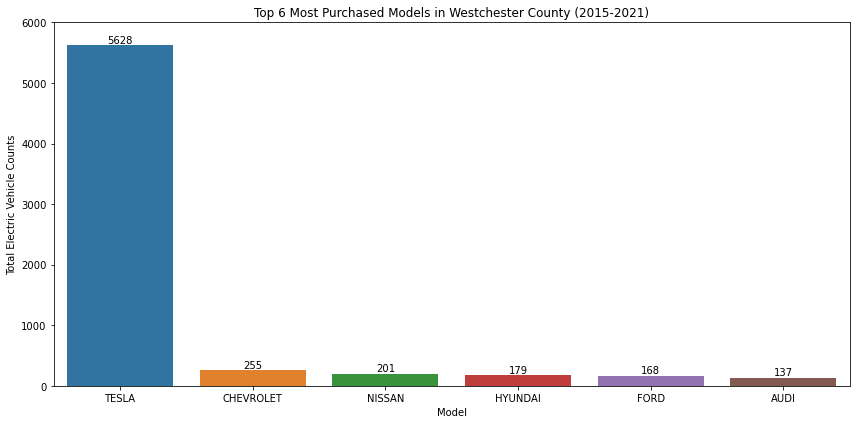

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Westchester_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Westchester County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Westchester.png', facecolor='white');

### Most Purchased Models in Queens County (Top 6)

In [62]:
Queens_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'QUEENS')]
Queens_model_counts = Queens_counts_df.Make.value_counts()
#Queens_model_counts

In [63]:
Queens_model_counts_df = pd.DataFrame(Queens_model_counts)
Queens_model_counts_6_df = Queens_model_counts_df .reset_index().head(6)
Queens_model_counts_6_df.columns = ['Model','Total Counts']
Queens_model_counts_6_df

Model  Total Counts
0      TESLA          2967
1  CHEVROLET           249
2     NISSAN           148
3    HYUNDAI           130
4       FORD            95
5        KIA            56

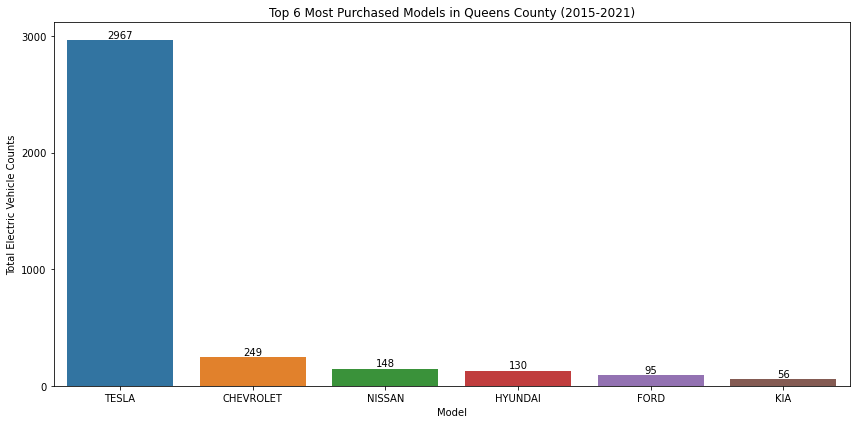

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Queens_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Queens County (2015-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Queens.png', facecolor='white');

### Most Purchased Models in New York County (Top 6)

In [65]:
New_York_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NEW YORK')]
New_York_model_counts = New_York_counts_df.Make.value_counts()
#New_York_model_counts

In [66]:
New_York_model_counts_df = pd.DataFrame(New_York_model_counts)
New_York_model_counts_6_df = New_York_model_counts_df.reset_index().head(6)
New_York_model_counts_6_df.columns = ['Model','Total Counts']
New_York_model_counts_6_df

Model  Total Counts
0      TESLA          2714
1  CHEVROLET           218
2     NISSAN           182
3      EL/SM            77
4    PORSCHE            70
5       AUDI            55

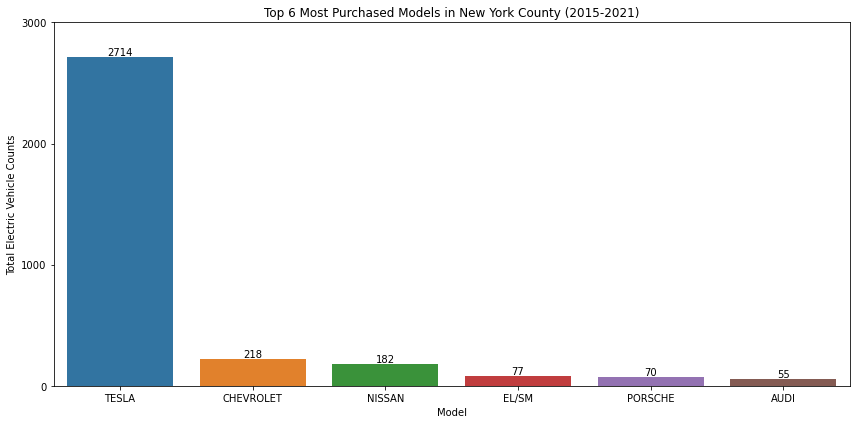

In [67]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=New_York_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in New York County (2015-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_New_York.png', facecolor='white');

### Most Purchased Models in Monroe County (Top 6)

In [68]:
Monroe_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'MONROE')]
Monroe_model_counts = Monroe_counts_df.Make.value_counts()
#Monroe_model_counts

In [69]:
Monroe_model_counts_df = pd.DataFrame(Monroe_model_counts)
Monroe_model_counts_6_df = Monroe_model_counts_df.reset_index().head(6)
Monroe_model_counts_6_df.columns = ['Model','Total Counts']
Monroe_model_counts_6_df

Model  Total Counts
0      TESLA          1101
1  CHEVROLET           338
2     NISSAN           265
3    HYUNDAI           247
4       FORD            89
5        KIA            88

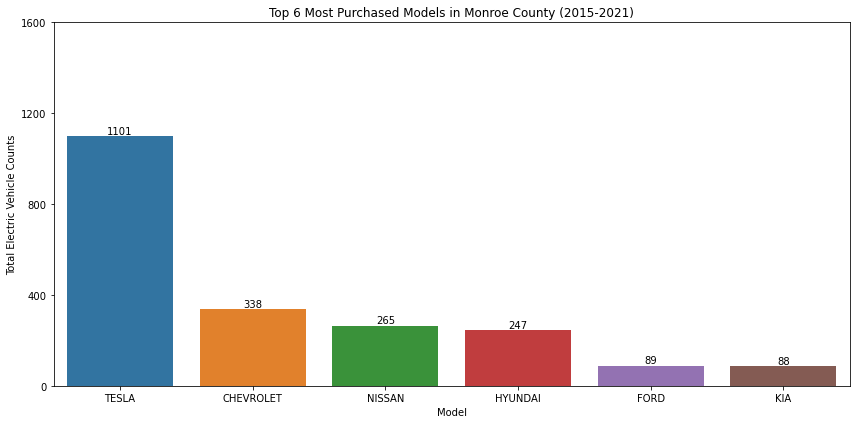

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Monroe_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Monroe County (2015-2021)')
ax.set_yticks(range(0,2000,400))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Monroe.png', facecolor='white');

### Most Purchased Models in Erie County (Top 6)

In [71]:
Erie_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ERIE')]
Erie_model_counts = Erie_counts_df.Make.value_counts()
#Erie_model_counts

In [72]:
Erie_model_counts_df = pd.DataFrame(Erie_model_counts)
Erie_model_counts_6_df = Erie_model_counts_df.reset_index().head(6)
Erie_model_counts_6_df.columns = ['Model','Total Counts']
Erie_model_counts_6_df

Model  Total Counts
0       TESLA           902
1     HYUNDAI           321
2   CHEVROLET           194
3        FORD           124
4      NISSAN           119
5  VOLKSWAGEN            38

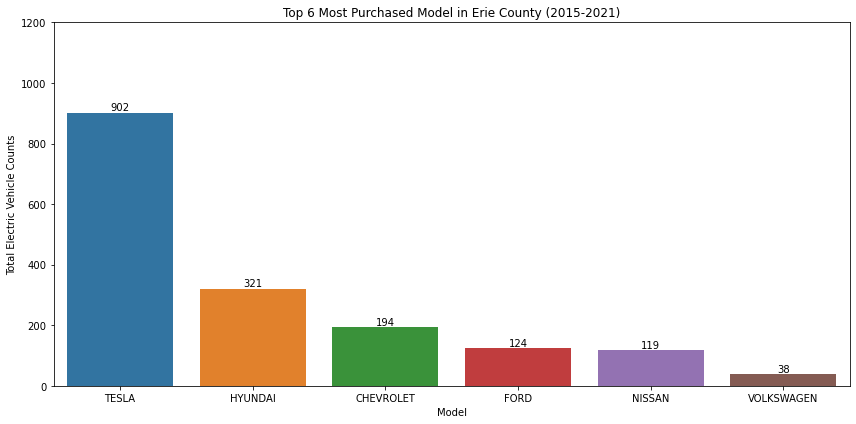

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Erie_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Erie County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Erie.png', facecolor='white');

### Most Purchased Models in Rockland County (Top 6)

In [74]:
Rockland_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ROCKLAND')]
Rockland_model_counts = Rockland_counts_df.Make.value_counts()
#Rockland_model_counts

In [75]:
Rockland_model_counts_df = pd.DataFrame(Rockland_model_counts)
Rockland_model_counts_6_df = Rockland_model_counts_df.reset_index().head(6)
Rockland_model_counts_6_df.columns = ['Model','Total Counts']
Rockland_model_counts_6_df

Model  Total Counts
0      TESLA           992
1    HYUNDAI           113
2       FORD            52
3  CHEVROLET            43
4     NISSAN            42
5        KIA            21

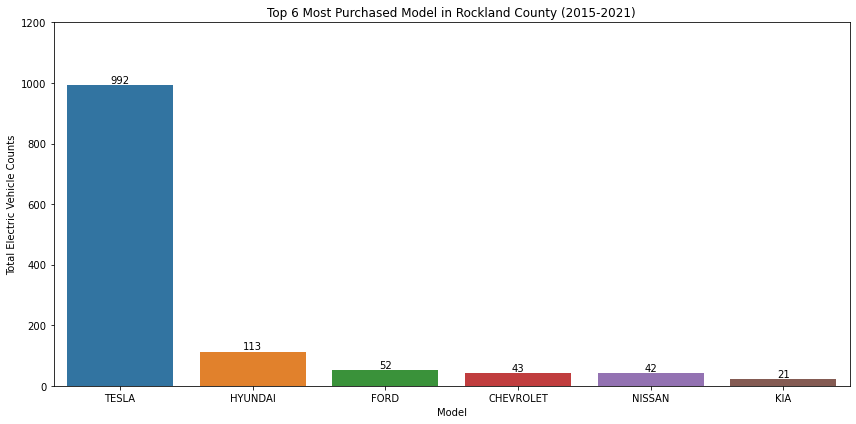

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Rockland_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Rockland County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Rockland.png', facecolor='white');

### Most Purchased Models in Richmond County (Top 6)

In [77]:
Richmond_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'RICHMOND')]
Richmond_model_counts = Richmond_counts_df.Make.value_counts()
#Richmond_model_counts

In [78]:
Richmond_model_counts_df = pd.DataFrame(Richmond_model_counts)
Richmond_model_counts_6_df = Richmond_model_counts_df.reset_index().head(6)
Richmond_model_counts_6_df.columns = ['Model','Total Counts']
Richmond_model_counts_6_df

Model  Total Counts
0      TESLA           961
1    HYUNDAI            94
2       FORD            51
3     NISSAN            26
4  CHEVROLET            25
5    PORSCHE            17

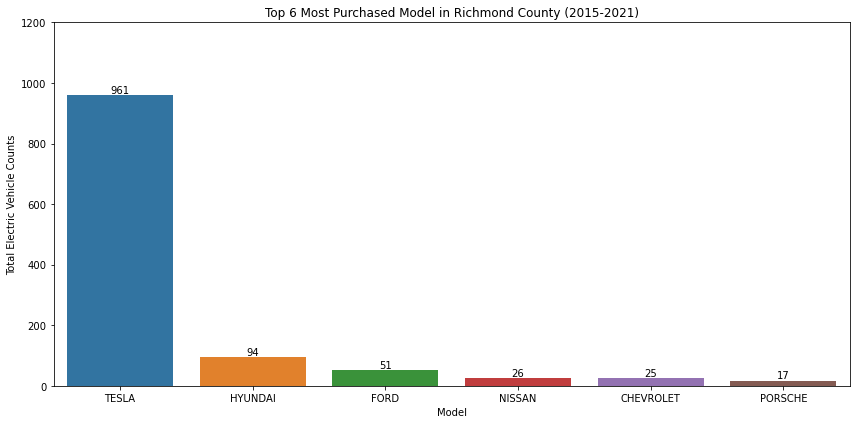

In [79]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Richmond_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Richmond County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Richmond.png', facecolor='white');

# MODEL

## Preprocessing/ Defining Functions

In [92]:
df_cumsum = df_cumsum.set_index('Reg Valid Date').resample('M').asfreq()

In [93]:
df_cumsum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2014-04-30 to 2022-02-28
Freq: M
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KINGS        95 non-null     float64
 1   NASSAU       95 non-null     float64
 2   SUFFOLK      95 non-null     float64
 3   WESTCHESTER  95 non-null     float64
 4   QUEENS       95 non-null     float64
 5   NEW YORK     95 non-null     float64
 6   MONROE       95 non-null     float64
 7   ERIE         95 non-null     float64
 8   ROCKLAND     95 non-null     float64
 9   RICHMOND     95 non-null     float64
dtypes: float64(10)
memory usage: 8.2 KB


### Separating Data for Each County
As discussed above, we will be creating time series models for the top ten counties. This requires us to break down the dataframe we have into smaller dataframes for each county.

In [94]:
def separate_data_by_county(county, df):
    """Function separates the given dataframe by county and returns the 
    separated dataframe.
    -------------------------------
    Arguments:
    county: str
    Name of county that will be separated from the dataframe. 
    
    df: class: pandas.DataFrame
    Dataframe that contains data for all counties. The specified county will 
    be separated from this DataFrame. 
    """
    
    df_county = pd.DataFrame(df.loc[:, county])
    df_county.columns=["EV's on the Road"]
    df_county.head()
    return df_county

In [95]:
#separating data by county and parsing this information to a dictionary
county_information = {}
for county in top_10_county:
    county_information[county] = {}
    county_information[county]['df']=separate_data_by_county(county, df_cumsum)

In [96]:
#separating data by county and parsing this information to a dictionary
county_dfs = {}
for county in top_10_county:
    county_dfs[county] = separate_data_by_county(county, df_cumsum)

### Functionizing the Evaluation of Models
Before modelling, one of the functions we will need is a function that will show us the various statistics so that we can evaluate the performance of the model.

In [97]:
def evaluate_model(model):
    """Function returns the model summary and diagnostics information to aid 
    the evaluation of the given model's performance.
    -------------------------------
    Arguments:
    model: SARIMAX or ARIMA model object
    Model variable to evaluate (Time series models for both pmdarima and 
    statsmodels are supported. 
    """
    
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout();

### Creating a Function for train_test_split & plotting
We will be splitting the time series into two: a training set and a testing set. This will allow us to validate the performance of the models.

In [98]:
def train_test_split_ts (df, train_size, test_size):
    
    """Function splits a given DataFrame into two sets based on the given 
    train and test sizes so that the data can be used for validation.
    -------------------------------
    Arguments:
    df: class: pandas.DataFrame
    The base dataframe that will be getting split.
    
    train_size: float
    The size of the desired training set (for example: 0.80)
    
    test_size: float
    The size of the desired training set (for example: 0.20)
    """
    
    train_end_idx = int(round(len(df)*train_size,0))
    train_set = df.iloc[0:train_end_idx,:]["EV's on the Road"]
    test_set = df.iloc[train_end_idx:,:]["EV's on the Road"]
    return train_set, test_set

Additionally, to visualize these splits we will need a plotting function.

In [99]:
def plot_train_test_split(train_data, test_data, county):
    
    """Function plots the training and testing data for visual inspection.
    -------------------------------
    Arguments:
    train_data: pandas.Series
    The training set of data to be plotted.
    
    test_data: pandas.Series
    The test set of data to be plotted.
    
    county: str
    Name of the county that the training and testing data belongs to. This 
    string is used to set the title of the axes.
    """
    
    train_data.plot(label='Train Data')
    test_data.plot(label='Test Data')
    ax=plt.gca()
    ax.set_xlabel('Year')
    ax.set_ylabel('Electric Vehicles on the Road')
    ax.set_title(f'Electric Vehicles on the Road in {county} County')
    ax.legend();

### Creating a Function for Getting Forecasts
For validation purposes we will be getting the forecast from our model for the test period and will be plotting it against the actual test data.

In [100]:
def get_forecast(model, train_data, test_data, plot=True):
    
    """Function gets forecasted values from a given model and plots them for 
    visual inspection. The length of the forecasts are dependent on the length 
    of the test data. The forecasted values are returned in a DataFrame format.
    -------------------------------
    Arguments:
    model:  SARIMAX or ARIMA model object
    Model that the forecast is to be received from. 
    
    train_data: pandas.Series
    The training set of data used in training the model.
    
    test_data: pandas.Series
    The testing set of data used for validating the model.
    
    plot: bool, default=True
    Option to plot the forecasted values along with observed values 
    (train_data and test_data).
    """
    
    #creating a df with the forecast information
    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    forecast_df['Forecasts'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=train_data, color='black', ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index, 
                         y='Forecasts', color='blue', ax=ax, 
                         label='Forecasted Data', ls='--')
            sns.lineplot(data=test_data, color='purple', ax=ax, 
                         label='Actual Data', ls='-.')
            ax.fill_between(forecast_df.index, 
                            y1=forecast_df['Lower Confidence Interval'], 
                            y2=forecast_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.legend(loc=2)
            plt.show();
    return forecast_df

### Defining a Function for Getting Predictions for Future
Lastly, we will also be needing a function similar to the get_forecast function that will be used for getting predictions for the future and plotting for visualization.

In [101]:
def get_prediction(model, df, test_data, county_name, plot=True):
    
    """Function gets predicted values from a given model and plots them for 
    visual inspection. The length of the predictions are dependent on the 
    length of the test data. The forecasted values are returned in a DataFrame 
    format.
    -------------------------------
    Arguments:
    model:  SARIMAX or ARIMA model object
    Model to be used for making predictions.
    
    df: pandas.DataFrame
    DataFrame that contains all observed data.
    
    test_data: pandas.Series
    The testing set of data used for validating the model (dictates the length
    of predictions).
    
    plot: bool, default=True
    Option to plot the predicted values along with observed values.
    """
    
    #creating a df with the prediction information
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    prediction_df['Predictions'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index, 
                         y='Predictions', color='orange', ax=ax, 
                         label='Predicted Data', ls='--')
            ax.fill_between(prediction_df.index, 
                            y1=prediction_df['Lower Confidence Interval'], 
                            y2=prediction_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.set_ylabel('Electric Vehicles on the Road')
            ax.set_title(f'Predicted Electric Vehicle Count for {county_name}')
            plt.show();
    return prediction_df

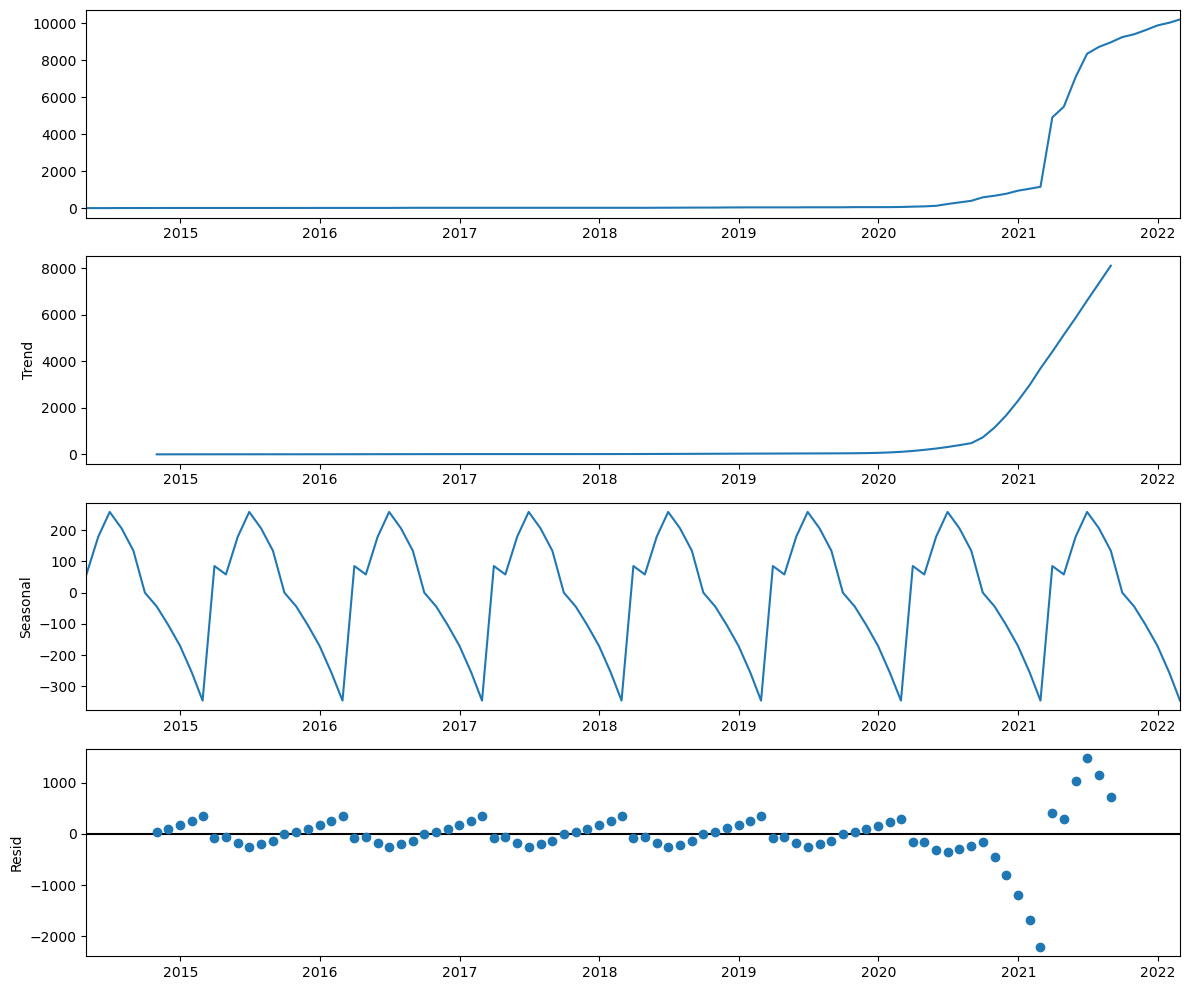

In [102]:
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['KINGS']['df'])
decomp.plot();

Not surprisingly, the electric vehicle count for King County has an upward trend. Additionally, we can see that there is seasonality to the data as well. We can now move onto creating the training and testing sets for validation.

### train_test_split
After multiple iterations, we found that the 0.80-0.20 split of the data belonging to King County resulted in the best performance.

In [103]:
#splitting dataset into train and test sets for validation
train_KINGS, test_KINGS = train_test_split_ts(county_information['KINGS']['df'], 
                                            0.80, 0.20)

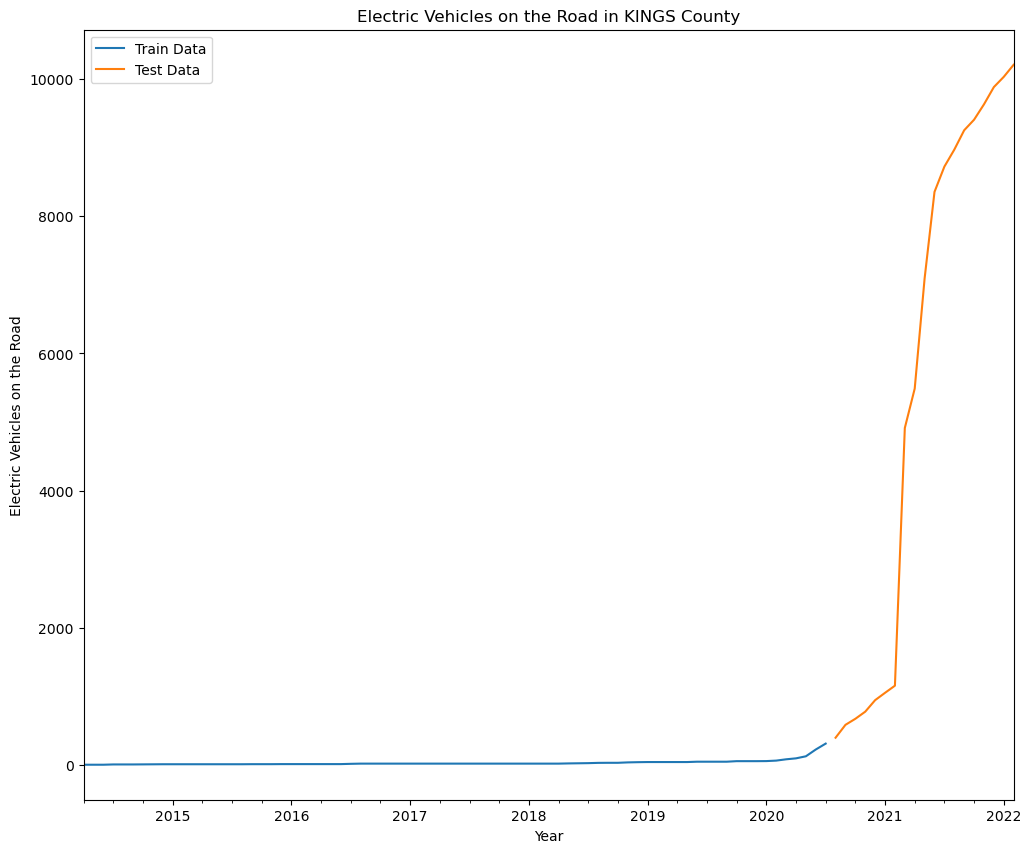

In [104]:
#plotting the split
plot_train_test_split(train_KINGS, test_KINGS, 'KINGS')

### Finding Best Parameters with Auto-Arima

To have a model that can accurately predict future values, we need to optimize the p,d,q values of the models for each county and validate. In order to achieve this programmatically, we will be using the pmdarima library.

In [107]:
import pmdarima as pm

In [108]:
auto_model = pm.auto_arima(train_KINGS, start_p=0, d=1, start_q=0, max_p=4, 
                           max_d=3, max_q=4, start_P=0, start_Q=0, max_P=3, 
                           max_D=3, max_Q=3, m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(0, 2, [], 12)   Log Likelihood                -190.461
Date:                             Thu, 17 Nov 2022   AIC                            386.922
Time:                                     02:27:18   BIC                            392.717
Sample:                                 04-30-2014   HQIC                           389.136
                                      - 07-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8133      0.178      4.564      0.000       0.464       1.163
ma.L1          0.4536      0.212      2.142      0.032       0.039       0.869
sigma2        98.7923     12.885      7.667      0.000      73.538     124.046
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               453.42
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):              20.78   Skew:                             2.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,1) for the ARIMA order and (0, 2, [], 12) for the seasonal component. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(0, 2, [], 12)   Log Likelihood                -180.755
Date:                             Thu, 17 Nov 2022   AIC                            367.510
Time:                                     02:27:36   BIC                            373.186
Sample:                                 04-30-2014   HQIC                           369.663
                                      - 07-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3796      0.117     11.766      0.000       1.150       1.609
ma.L1         -0.4619      0.218     -2.120      0.034      -0.889      -0.035
sigma2        93.5898     11.901      7.864      0.000      70.265     116.914
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               365.20
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              12.35   Skew:                             2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

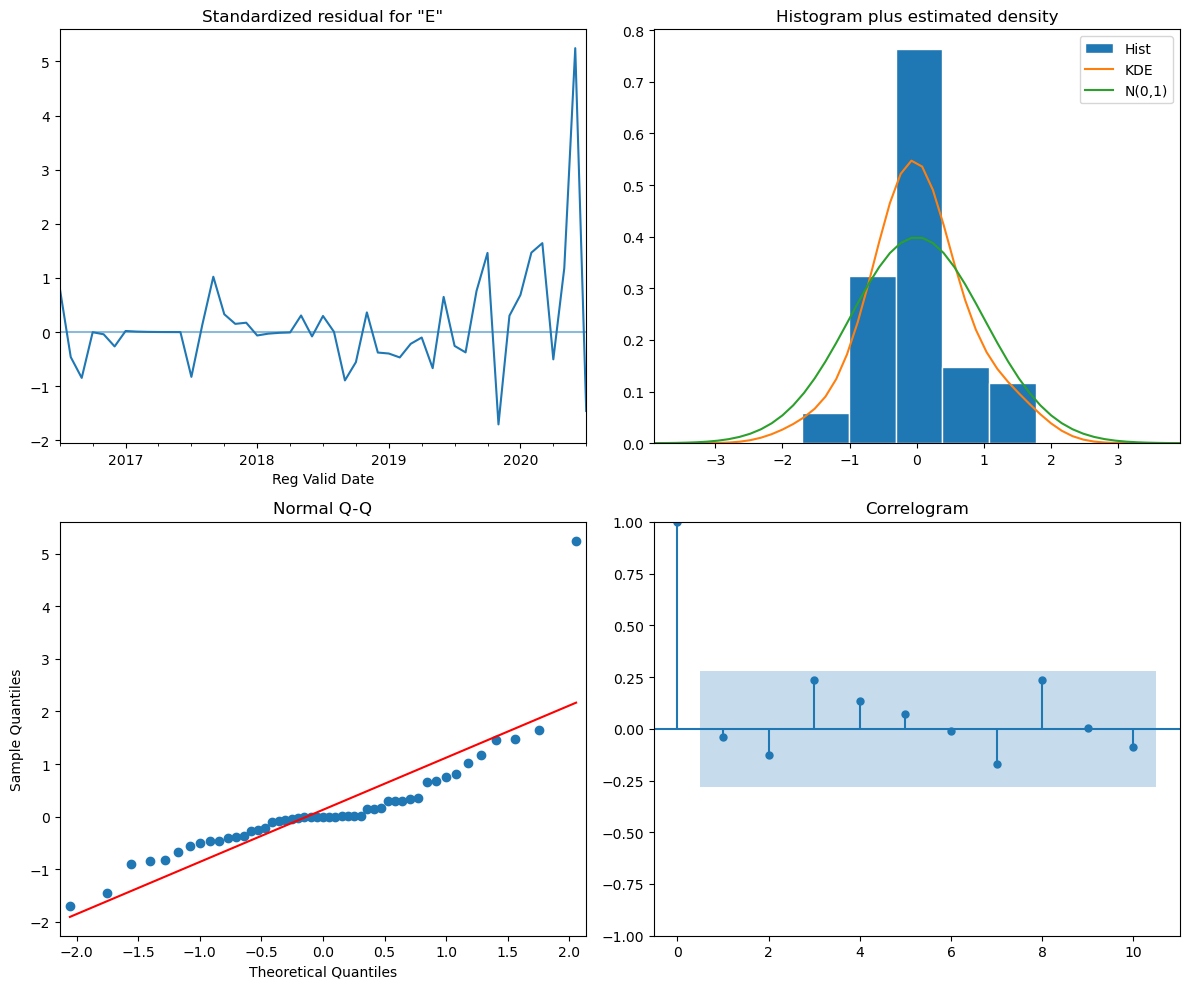

In [110]:
model = SARIMAX(train_KINGS, order=(1,1,1), 
                seasonal_order=(0, 2, [], 12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

Here, looking at the residual information, we can see that they are very close to having a normal distribution. Additionally, there is no longer an obvious seasonality based on the correlogram and the standardized residuals. The coefficient p-values also suggest that they are statistically significant. These results suggest that the model is satisfactory to move onto validation.

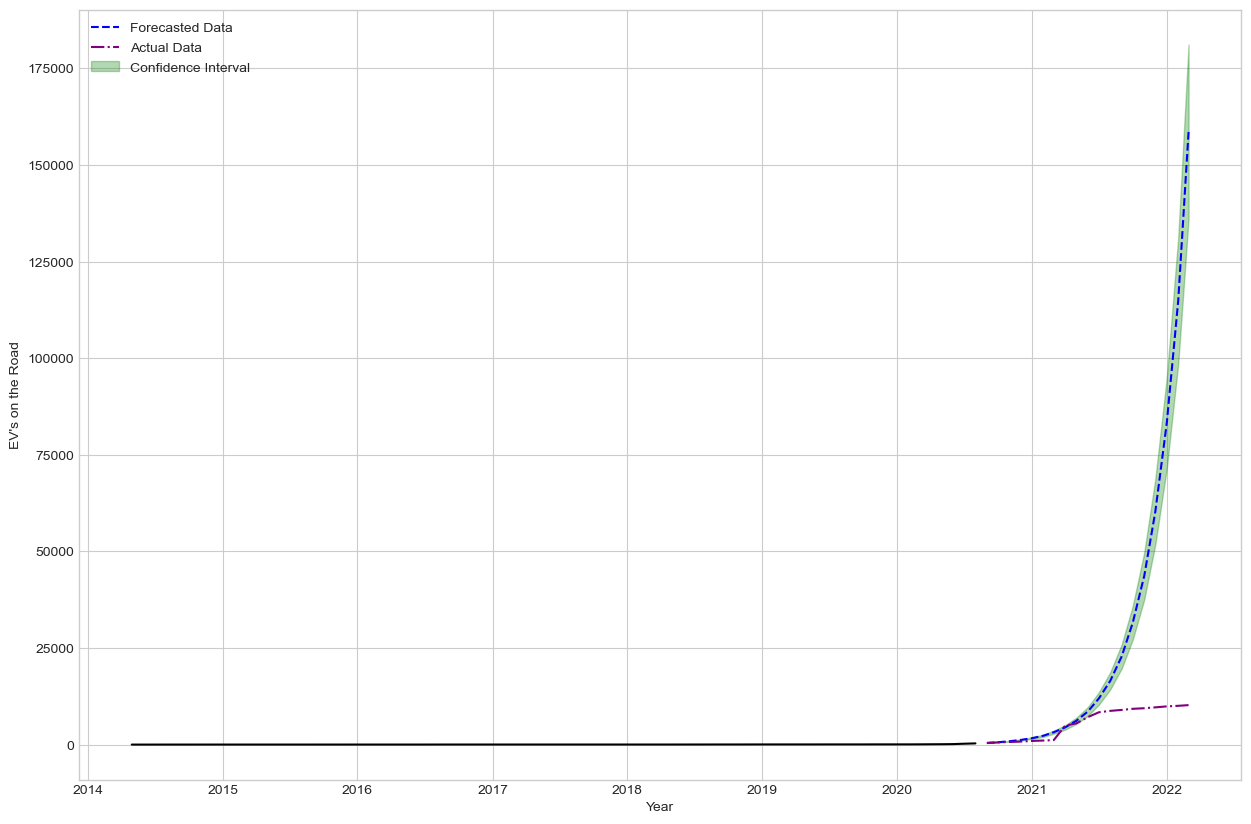

In [111]:
df_king_forecast = get_forecast(model, train_KINGS, test_KINGS, plot=True)

Above, we can see that the model is able to accurately forecast data into the future. The actual observed data is well within the confidence interval of our model's forecasts.

### Future Predictions
#### Fitting Model to All Observed Data
Now that we know that our model can accurately make predictions about the future electric vehicle counts in each county, we can use the same parameters to build a model on the whole observed dataset without splitting it into train/test sets.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   95
Model:             SARIMAX(1, 1, 1)x(0, 2, [], 12)   Log Likelihood                -514.883
Date:                             Thu, 17 Nov 2022   AIC                           1035.766
Time:                                     02:28:28   BIC                           1042.424
Sample:                                 04-30-2014   HQIC                          1038.404
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7962      0.200      3.989      0.000       0.405       1.187
ma.L1         -0.5324      0.288     -1.849      0.064      -1.097       0.032
sigma2      2.242e+05   8202.737     27.331      0.000    2.08e+05     2.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):              7504.07
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):           79810.67   Skew:                             6.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

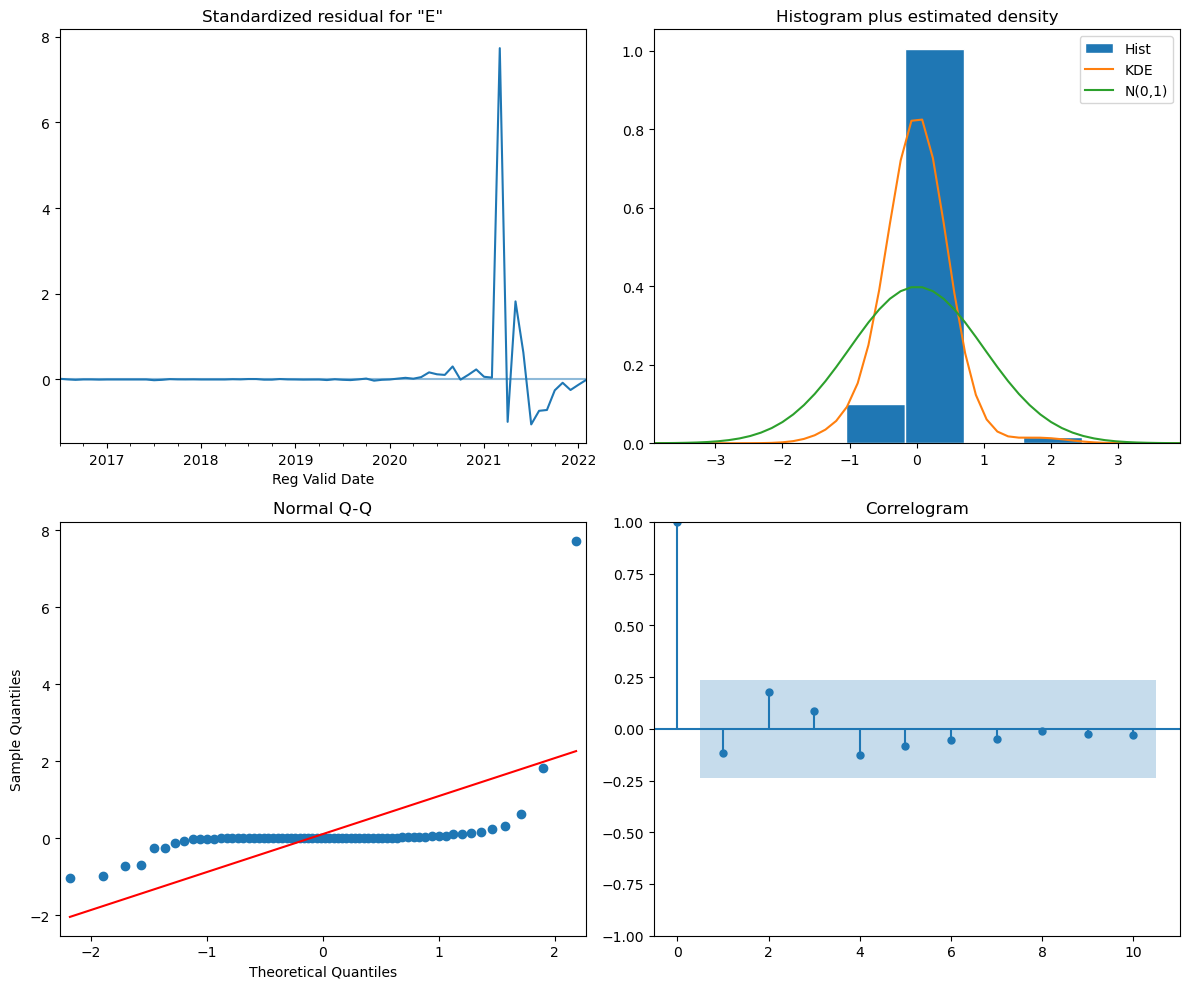

In [112]:
model = SARIMAX(county_information['KINGS']['df'], order=(1,1,1), 
                seasonal_order=(0,2,[],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

Above we can see that the residuals for this model are less normally distributed compared to the test model. However, they are still fairly close to having a normal distribution. Additionally, there is no longer an obvious seasonality based on the correlogram and the standardized residuals. The coefficient p-values also suggest that they are statistically significant.

#### Plotting & Saving Predictions
Using our model, we can predict the future counts of electric vehicles in King County and plot them. 

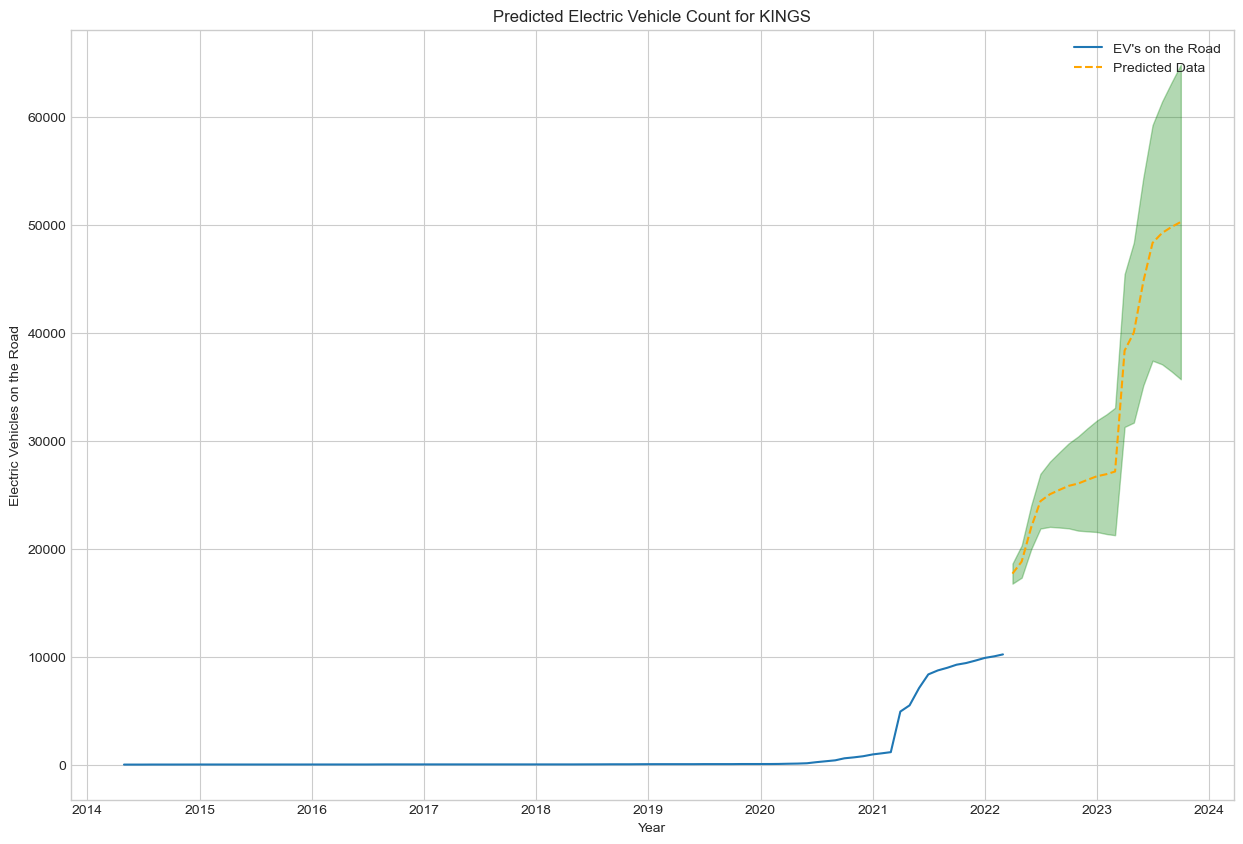

In [113]:
#creating a df of predictions and plotting
df_KINGS_preds = get_prediction(model, county_information['KINGS']['df'], 
                               test_KINGS, 'KINGS', plot=True)

The model is predicting that the amount of electric vehicles in King County are going to keep increasing almost linearly based on the mean values. If we look at the upper confidence interval though, we can see that the increase could keep an exponential pattern.

In [114]:
#saving predictions df to dict for later use
county_information['KINGS']['Predictions'] = df_KINGS_preds

In [115]:
df_KINGS_preds.head()

Lower Confidence Interval  Upper Confidence Interval   Predictions
2022-03-31               16768.235189               18624.264014  17696.249601
2022-04-30               17321.364122               20312.461780  18816.912951
2022-05-31               19963.657888               24016.930759  21990.294323
2022-06-30               21873.806846               26943.872720  24408.839783
2022-07-31               22031.344774               28076.871798  25054.108286

# NASSAU
### Seasonality Check

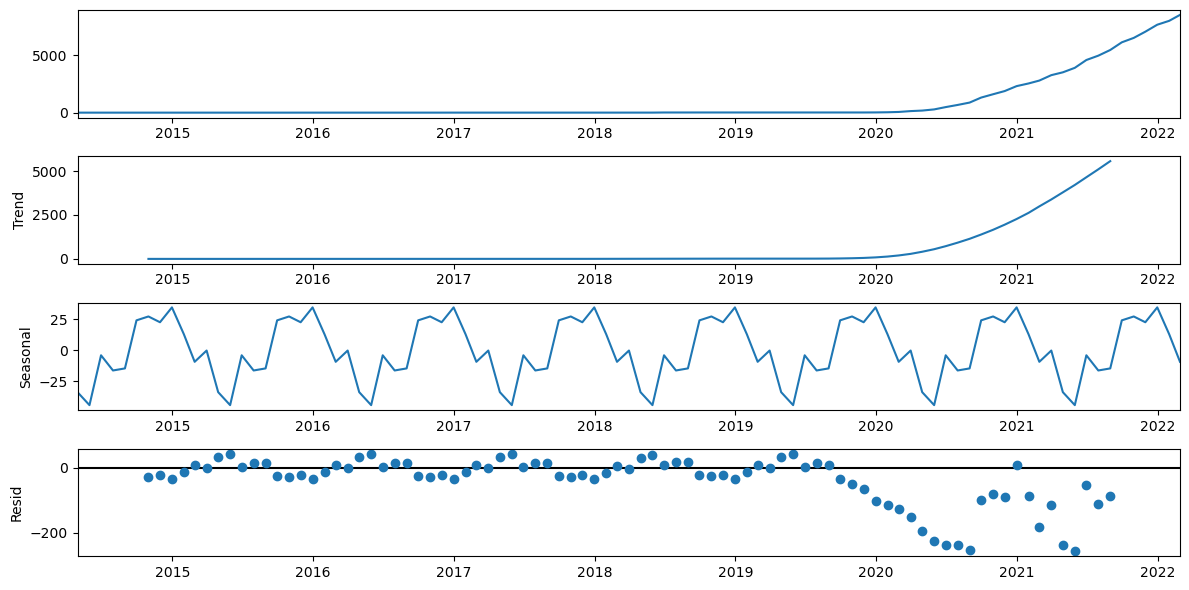

In [116]:
plt.rcParams['figure.figsize']=(12,6)
decomp = tsa.seasonal_decompose(county_information['NASSAU']['df'])
decomp.plot();

Above we can see that there is a clear trend upwards in electric vehicle counts in Snohomish county. Additionally, we can see that there is a relatively small seasonality to it.

### train_test_split
After multiple iterations, we found that the 0.75-0.25 split of the data belonging to Pierce County resulted in the best performance.

In [117]:
#splitting dataset into train and test sets for validation
train_NASSAU, test_NASSAU = train_test_split_ts(county_information['NASSAU']['df'], 
                                            0.75, 0.25)

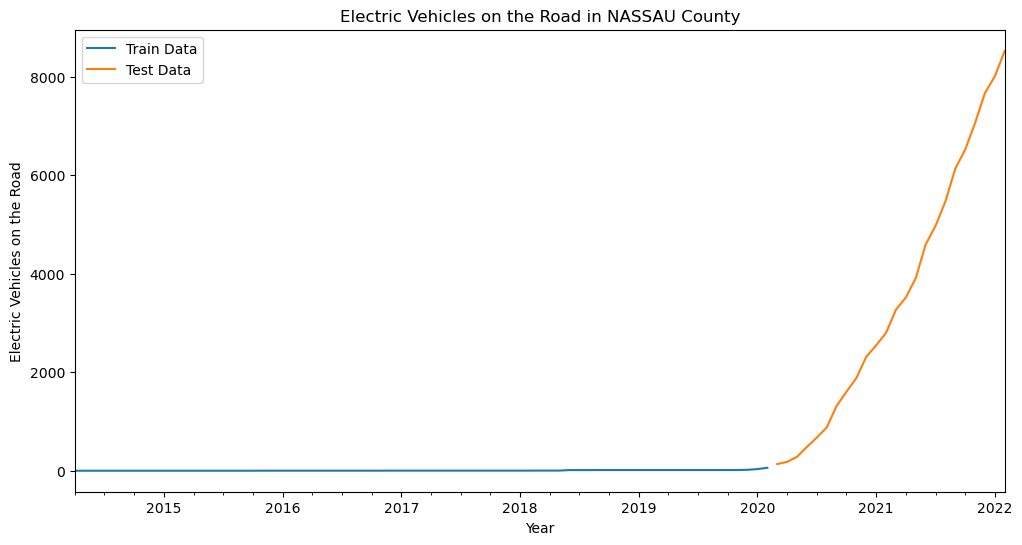

In [118]:
#plotting train and test sets
plot_train_test_split(train_NASSAU, test_NASSAU, 'NASSAU')

### Finding Best Parameters with Auto-Arima

In [119]:
auto_model = pm.auto_arima(train_NASSAU, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -166.885
Date:                Thu, 17 Nov 2022   AIC                            341.770
Time:                        02:29:41   BIC                            350.764
Sample:                    04-30-2014   HQIC                           345.343
                         - 02-29-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8210      0.932      1.953      0.051      -0.006       3.649
ar.L2         -0.8464      0.997     -0.849      0.396      -2.800       1.107
ma.L1         -0.6101      0.960     -0.636      0.525      -2.491       1.271
sigma2         6.5638      0.505     13.003      0.000       5.574       7.553
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               523.12
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             182.57   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (2,1,1) for the ARIMA order. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   71
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -158.569
Date:                Thu, 17 Nov 2022   AIC                            325.138
Time:                        02:29:43   BIC                            334.016
Sample:                    04-30-2014   HQIC                           328.656
                         - 02-29-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4791      1.457      1.015      0.310      -1.377       4.335
ar.L2          0.1208      1.898      0.064      0.949      -3.600       3.841
ma.L1         -0.1770      1.476     -0.120      0.905      -3.071       2.717
sigma2         6.2055      0.472     13.139      0.000       5.280       7.131
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               588.62
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             147.13   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

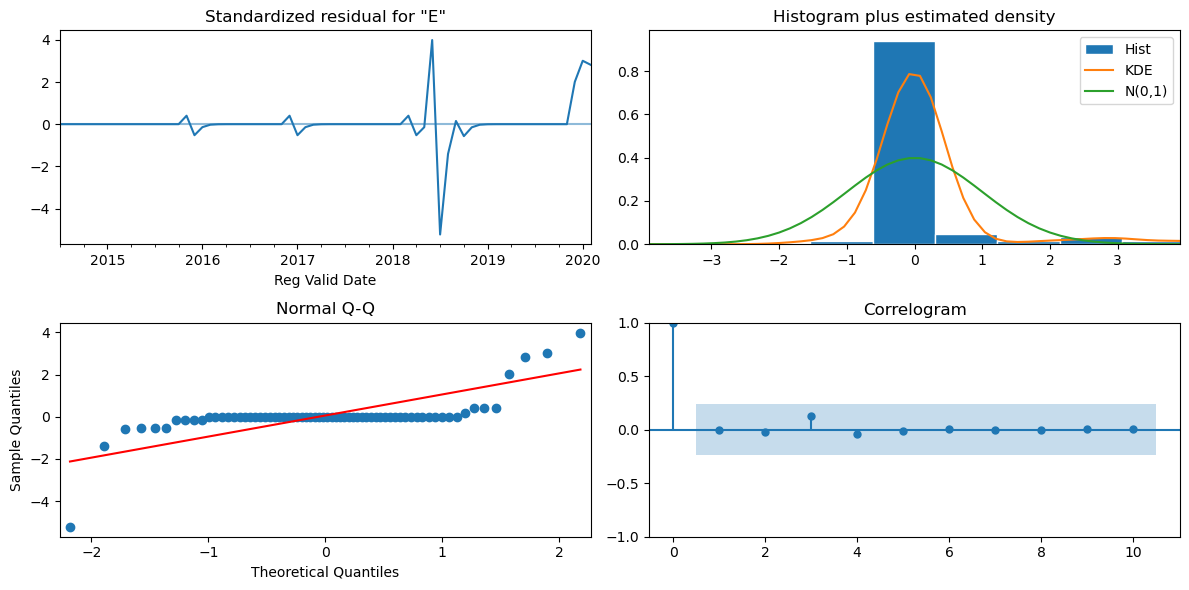

In [120]:
#fitting SARIMAX model with best params
model = SARIMAX(train_NASSAU, order=(2,1,1), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

Above, we can see that the residuals are almost perfectly normally distributed. This indicates that the parameters chosen above were successful in removing the seasonality and the trend. Additionally, even though some of the coefficients have values higher than 0.05 (our chosen alpha value), based on the AIC score these parameters resulted in the best model. So we will be moving on with this model.

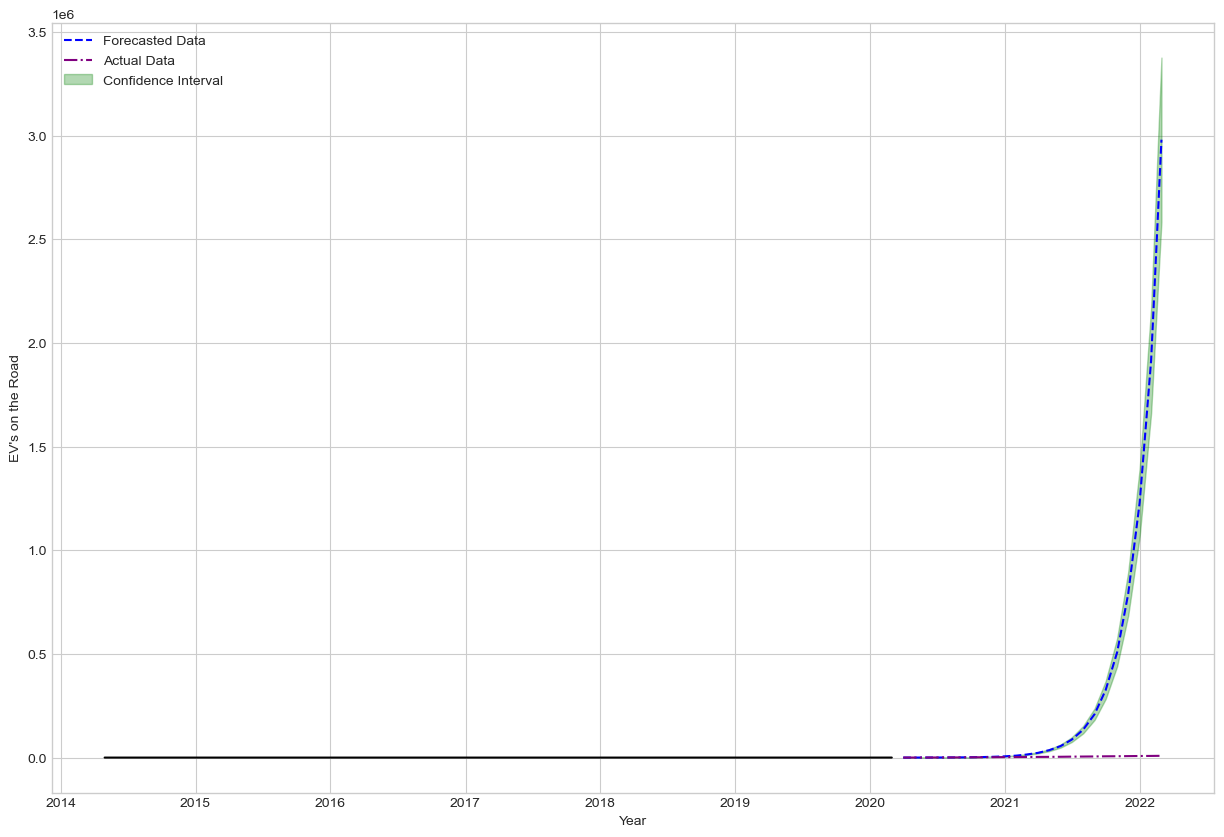

In [121]:
df_NASSU_forecast = get_forecast(model, train_NASSAU, test_NASSAU, plot=True)

Here, we can see that the forecasted data stays lower than the actual observed data. However, the observed data is still within our confidence interval. Therefore, we can move onto fitting the model to all observed data.

### Future Predictions
#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   95
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -517.227
Date:                Thu, 17 Nov 2022   AIC                           1042.454
Time:                        02:30:05   BIC                           1052.541
Sample:                    04-30-2014   HQIC                          1046.525
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7228      0.126      5.727      0.000       0.475       0.970
ar.L2          0.3154      0.135      2.342      0.019       0.051       0.579
ma.L1         -1.8953      0.345     -5.488      0.000      -2.572      -1.218
sigma2      1241.9809    457.040      2.717      0.007     346.199    2137.763
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):               330.14
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):          176955.29   Skew:                             1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

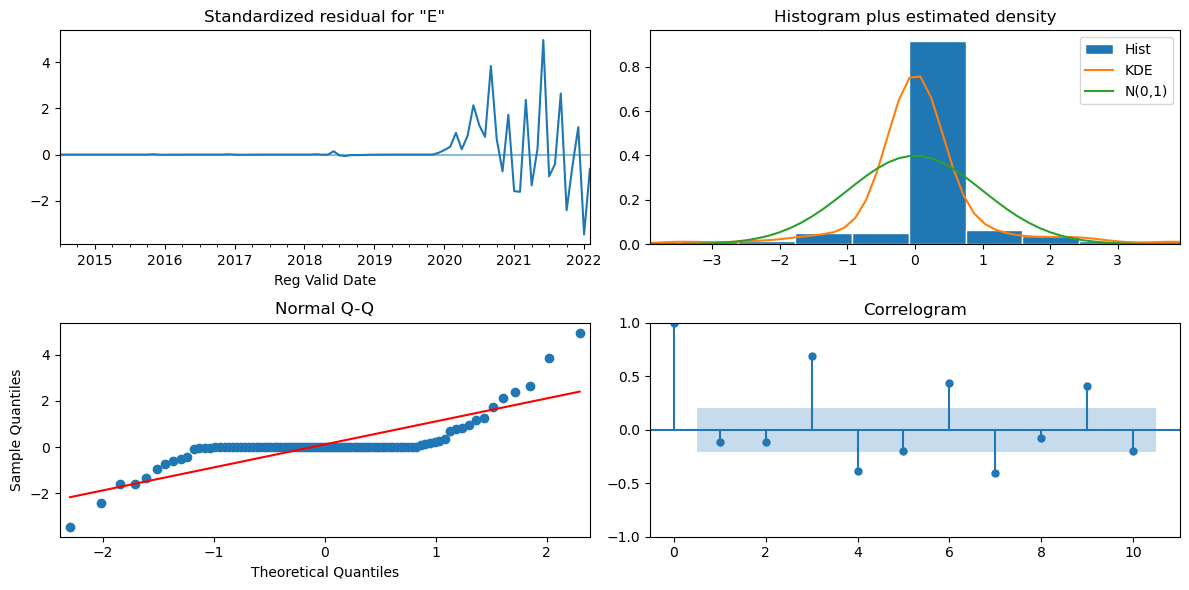

In [122]:
model = SARIMAX(county_information['NASSAU']['df'], order=(2,1,1), 
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

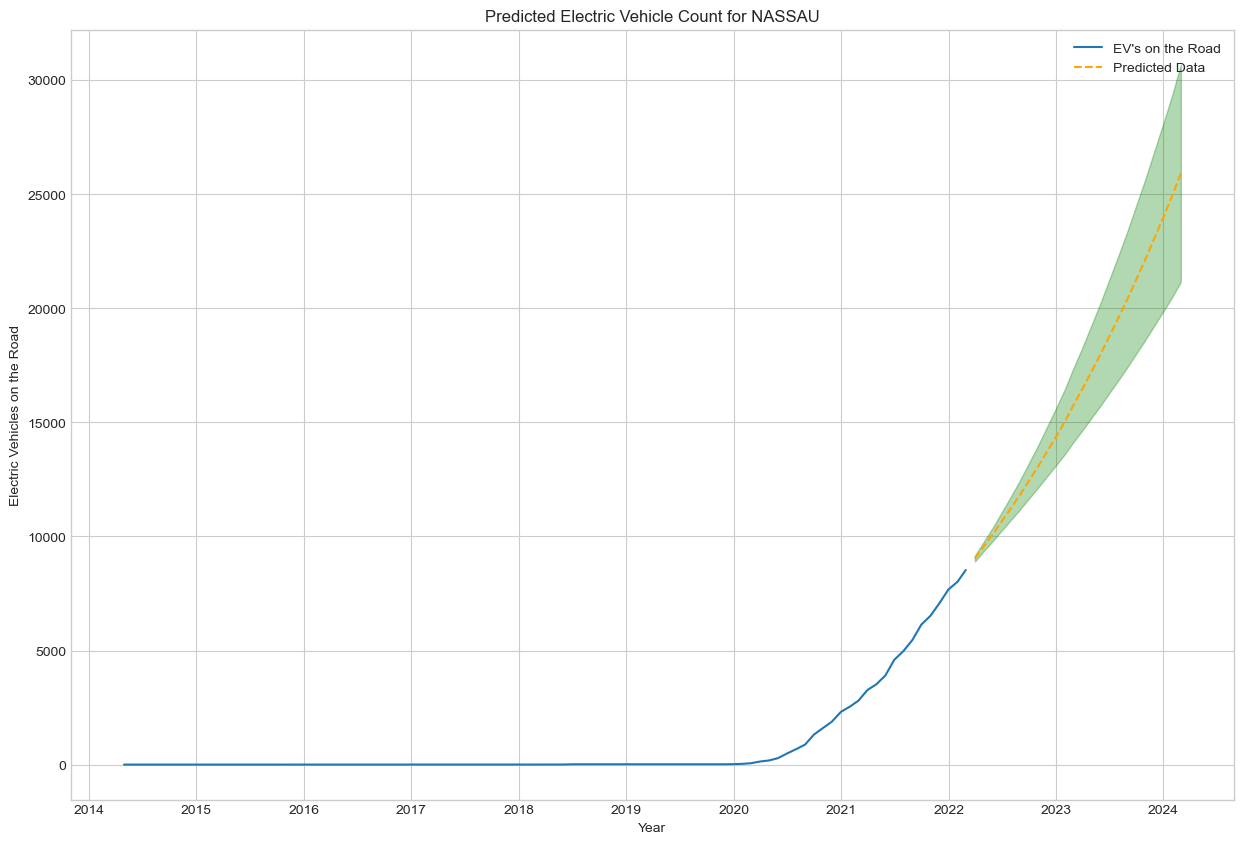

In [123]:
#getting and plotting predictions
df_NASSAU_preds = get_prediction(model, county_information['NASSAU']['df'], 
                               test_NASSAU, 'NASSAU', plot=True)

Once again, looking at the residuals, we can see that they have a fairly normal distribution. Even though some of the p-values are once again higher than the 0.05 threshold, the parameters seem to generate a model that can accurately predict the future values.

#### Plotting & Saving Predictions

In [124]:
#saving predictions
county_information['NASSAU']['Predictions'] = df_NASSAU_preds

## SUFFOLK
### Seasonality Check

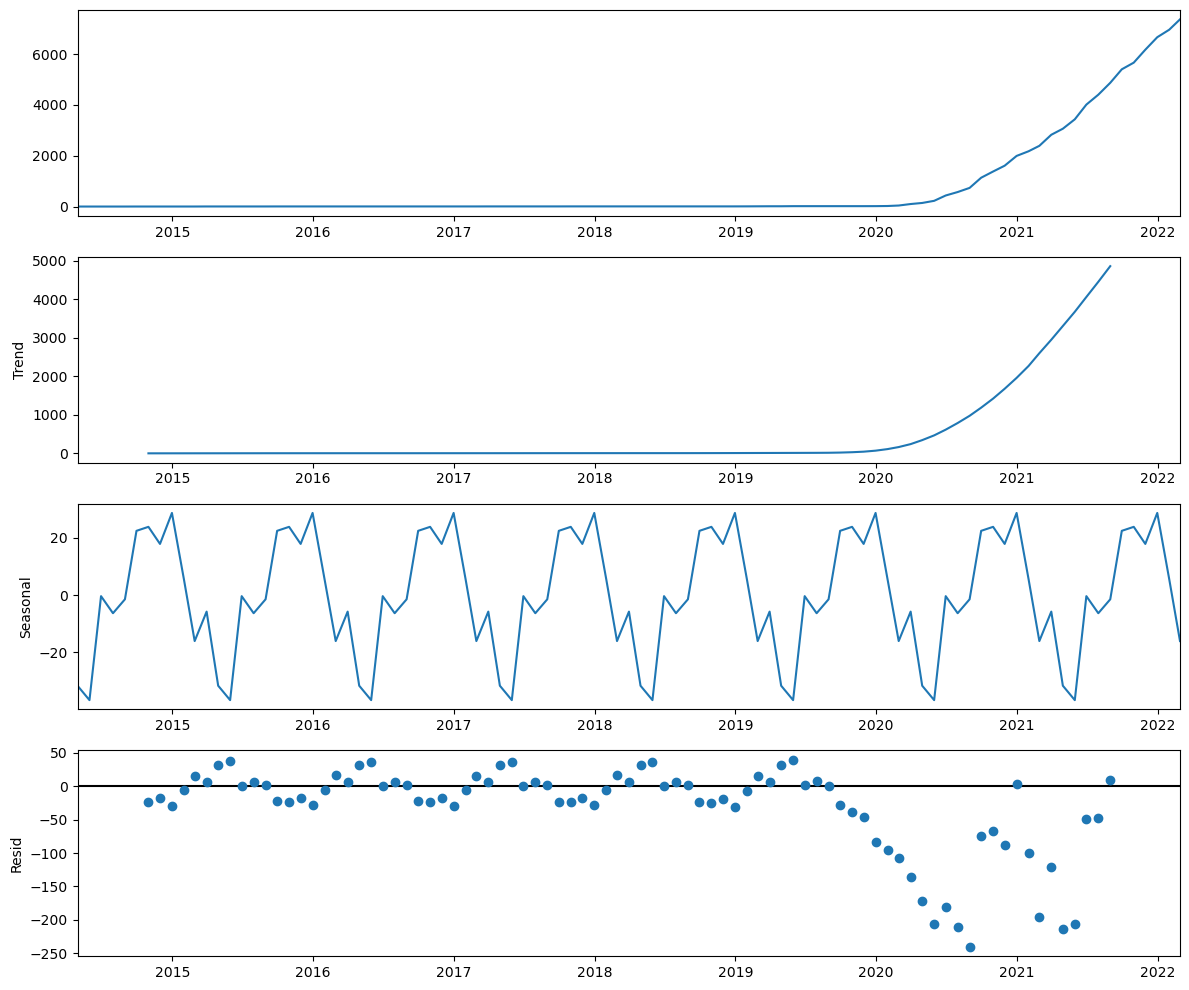

In [125]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['SUFFOLK']['df'])
decomp.plot();

As is the case with the previous counties, the decomposition for Clark County's data also suggests that there is an upwards trend and a seasonal component.

### train_test_split

After multiple iterations, we found that the 0.75-0.25 split of the data belonging to Clark County resulted in the best performance.

In [126]:
#split data into train/test sets for validation
train_SUFFOLK, test_SUFFOLK = train_test_split_ts(county_information['SUFFOLK']['df'], 
                                            0.75, 0.25)

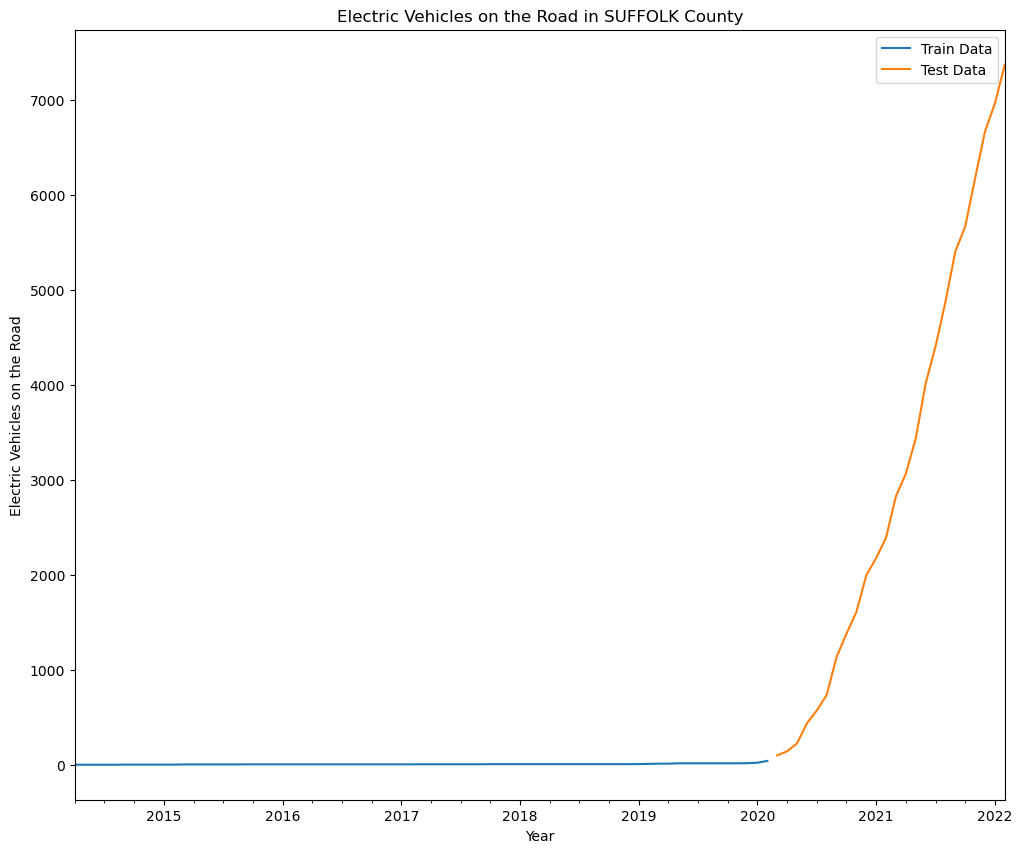

In [127]:
#plot the split
plot_train_test_split(train_SUFFOLK, test_SUFFOLK, 'SUFFOLK')

### Finding Best Parameters with Auto-Arima

In [128]:
auto_model = pm.auto_arima(train_SUFFOLK, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   71
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -124.366
Date:                            Thu, 17 Nov 2022   AIC                            252.732
Time:                                    02:30:41   BIC                            256.853
Sample:                                04-30-2014   HQIC                           254.338
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9344      0.115      8.108      0.000       0.709       1.160
sigma2         4.1165      0.343     11.989      0.000       3.444       4.789
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              2051.00
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):              23.89   Skew:                             4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,0) for the ARIMA order and (0,1,0,12) for the seasonal component. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                   71
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -119.462
Date:                            Thu, 17 Nov 2022   AIC                            242.924
Time:                                    02:30:45   BIC                            247.011
Sample:                                04-30-2014   HQIC                           244.512
                                     - 02-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5294      0.101     15.125      0.000       1.331       1.728
sigma2         3.8720      0.324     11.934      0.000       3.236       4.508
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               589.20
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):              11.62   Skew:                             2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

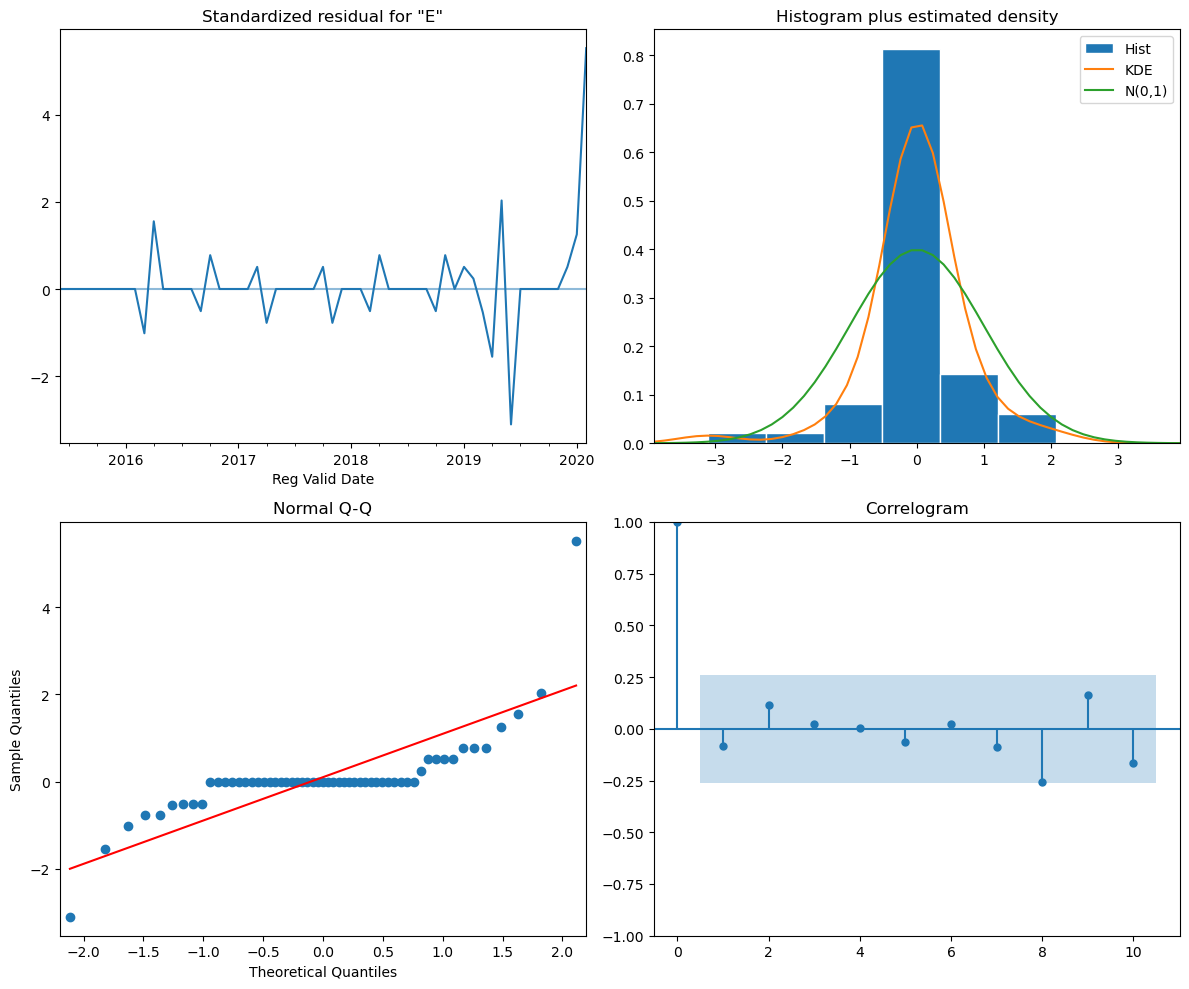

In [129]:
model = SARIMAX(train_SUFFOLK, order=(1,1,0), seasonal_order=(0,1,0,12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

The residuals are nearly normally distributed and based on the correlogram, the model was able to remove seasonality successfully.

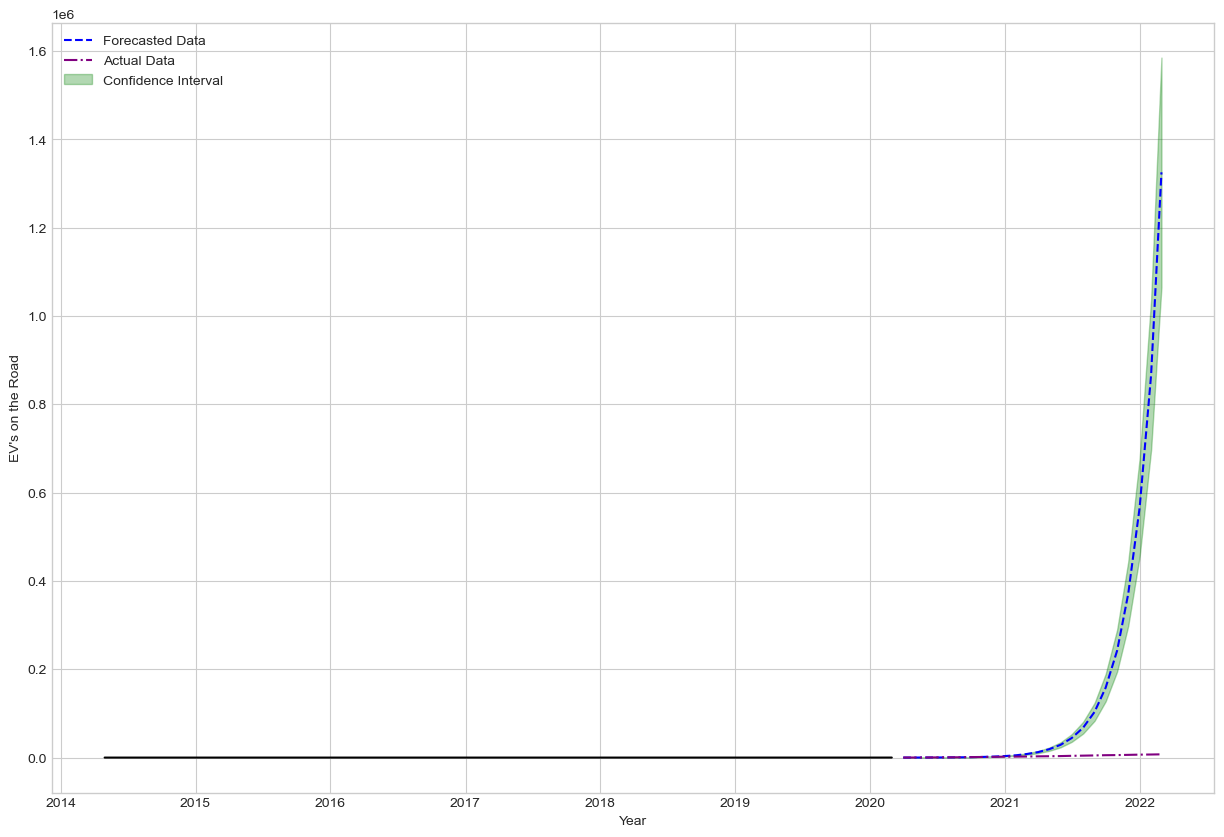

In [130]:
df_clark_forecast = get_forecast(model, train_SUFFOLK, test_SUFFOLK, plot=True)

The model's forecast stays inline with the observed data from mid-2018 to early 2020. Around March of 2020, the observed data is lower than the forecasts. This may be due to the COVID-19 pandemic that affected much of the US at this date. Even though this is the case, the observed data stays well within the confidence interval. This indicates that our model is performing very well and that we can move onto fitting the model to all the observed data to make predictions on future values.

### Future Predictions
#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                   95
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -458.466
Date:                            Thu, 17 Nov 2022   AIC                            920.932
Time:                                    02:30:56   BIC                            925.721
Sample:                                04-30-2014   HQIC                           922.853
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8491      0.037     23.119      0.000       0.777       0.921
sigma2      4828.3873    416.298     11.598      0.000    4012.458    5644.317
===================================================================================
Ljung-Box (L1) (Q):                  12.25   Jarque-Bera (JB):                96.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):           37871.07   Skew:                             1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

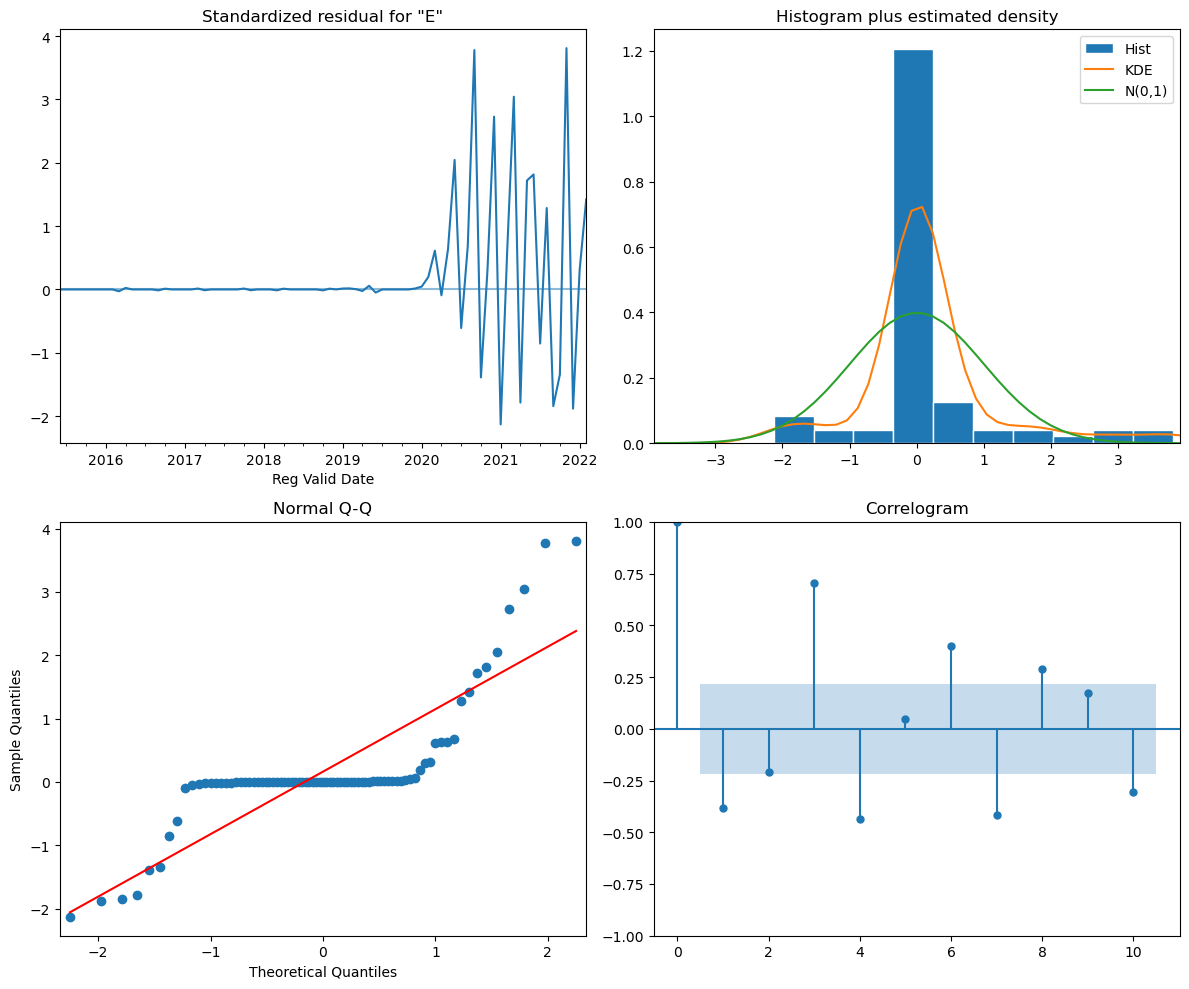

In [131]:
model = SARIMAX(county_information['SUFFOLK']['df'], order=(1, 1, 0), 
                seasonal_order=(0, 1, 0, 12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

The residuals are once again fairly normally distributed except for the portion of early 2020 to today. As discussed above, this may be due to the COVID-19 pandemic and the shutdowns that affected almost all industries including the electric vehicle market. 

#### Plotting & Saving Predictions

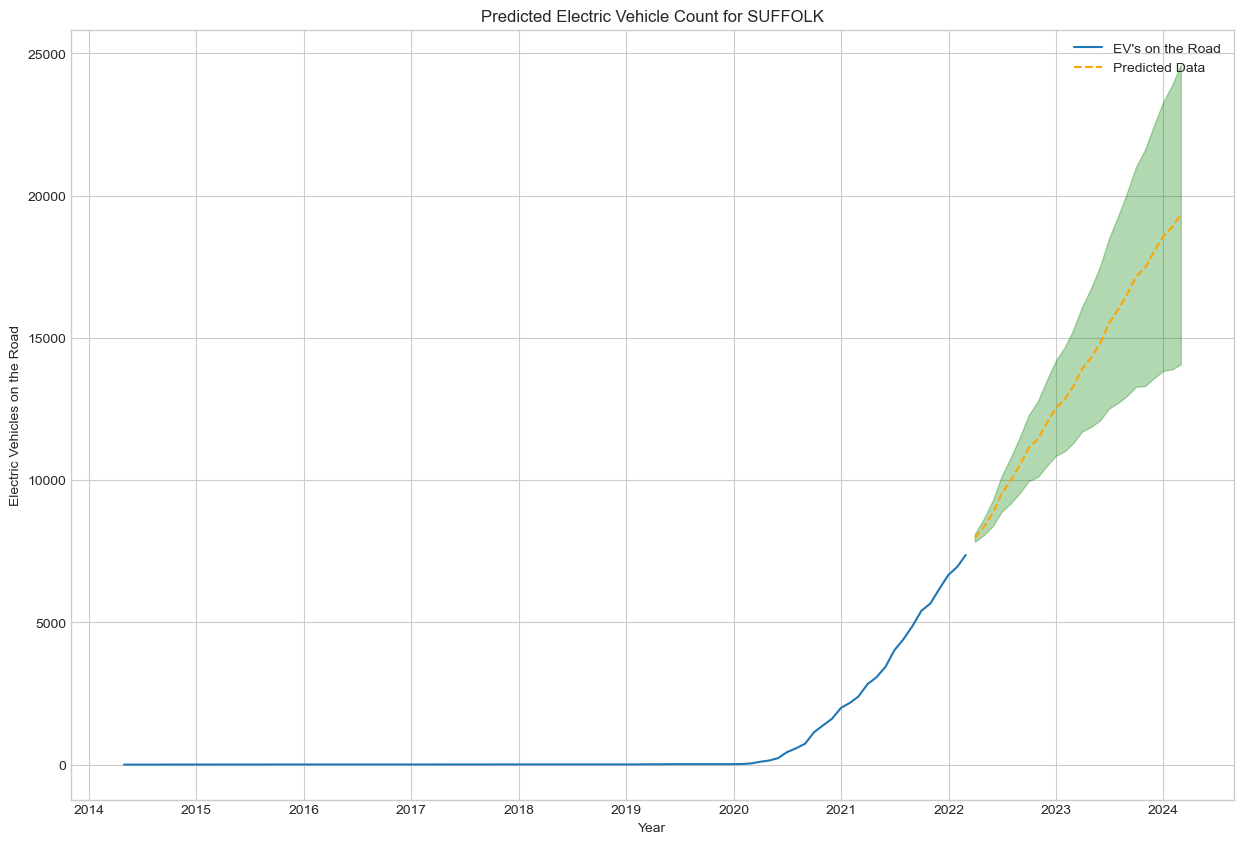

In [132]:
#getting/plotting predictions
df_SUFFOLK_preds = get_prediction(model, county_information['SUFFOLK']['df'], 
                               test_SUFFOLK, 'SUFFOLK', plot=True)

The model is predicting that the electric vehicle amount in Clark County will keep increasing exponentially in the coming years.

In [133]:
#saving predictions
county_information['SUFFOLK']['Predictions'] = df_SUFFOLK_preds

## WESTCHESTER
### Seasonality Check

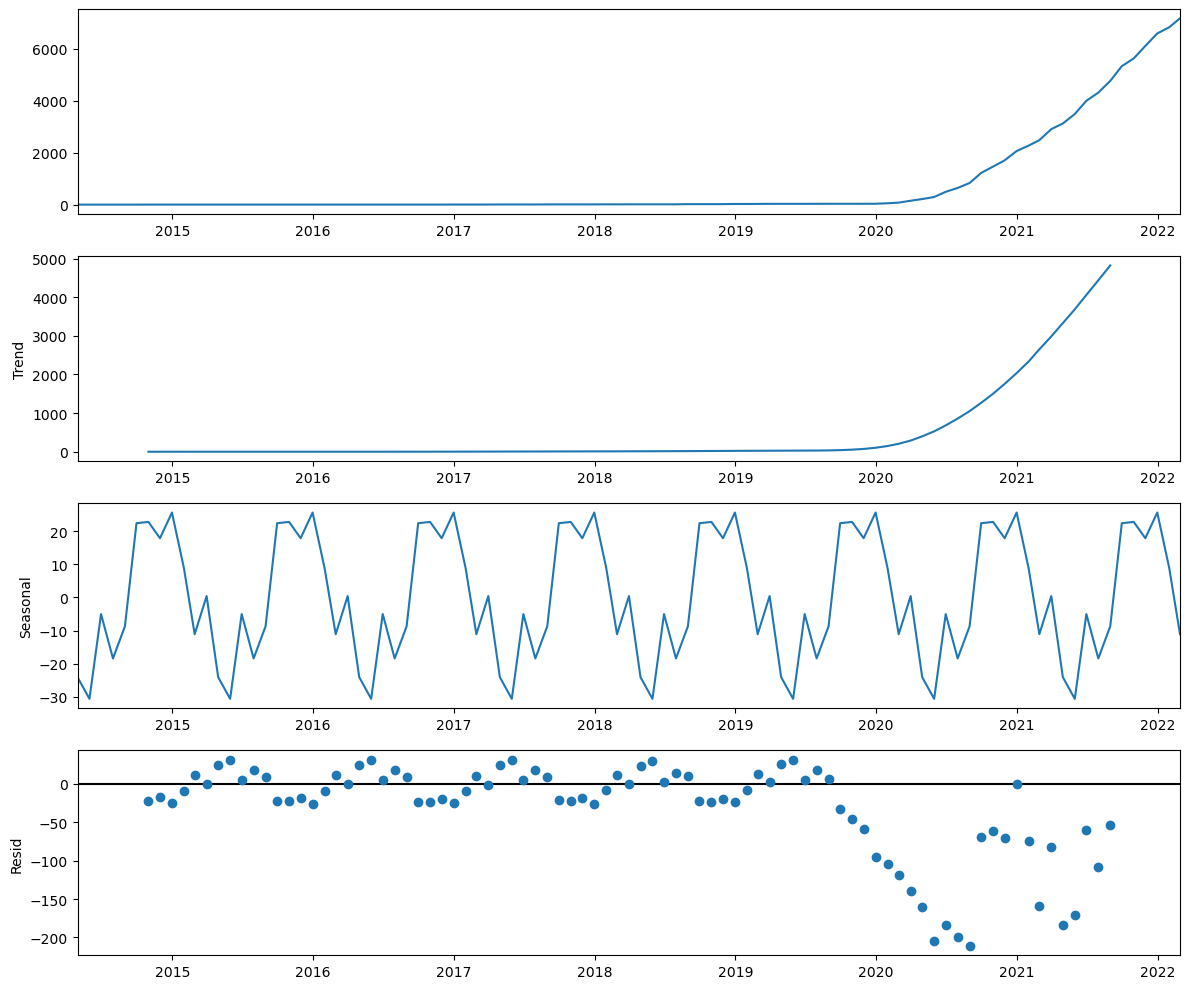

In [134]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['WESTCHESTER']['df'])
decomp.plot();

Similar to the previous counties, Thurston County's electric vehicle count is also showing an upward trend along with a seasonality component.

### train_test_split

After multiple iterations, we found that the 0.80-0.20 split of the data belonging to Thurston County resulted in the best performance.

In [135]:
#splitting data into train/test sets for validation
train_WESTCHESTER, test_WESTCHESTER = train_test_split_ts(county_information['WESTCHESTER']['df'], 
                                            0.80, 0.20)

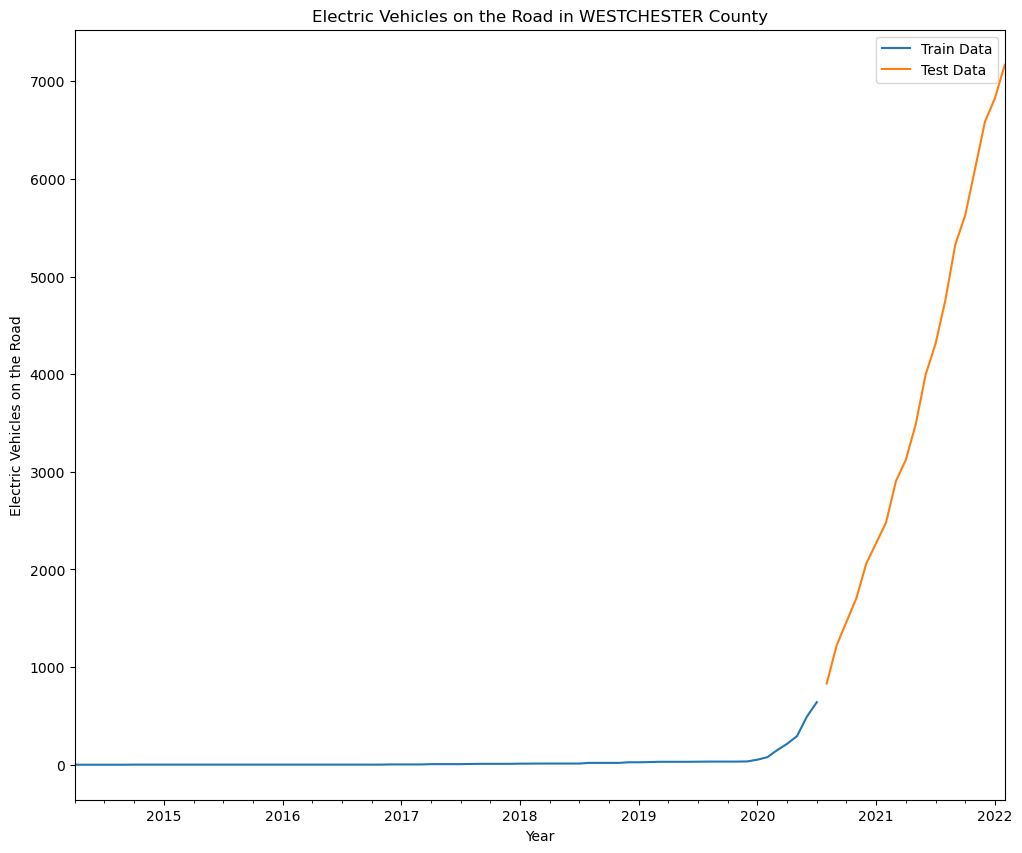

In [136]:
#plotting the split
plot_train_test_split(train_WESTCHESTER, test_WESTCHESTER, 'WESTCHESTER')

### Finding Best Parameters with Auto-Arima

In [137]:
#finding best parameters
auto_model = pm.auto_arima(train_WESTCHESTER, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   76
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -271.993
Date:                            Thu, 17 Nov 2022   AIC                            549.986
Time:                                    02:31:27   BIC                            556.415
Sample:                                04-30-2014   HQIC                           552.514
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7343      0.132      5.564      0.000       0.476       0.993
ar.L2          0.2496      0.145      1.719      0.086      -0.035       0.534
sigma2       313.4657     18.448     16.992      0.000     277.308     349.623
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3995.42
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):            2527.41   Skew:                             5.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (2,1,0) for the ARIMA order and (0,1,0,12) for the seasonal component. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                   76
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -247.973
Date:                            Thu, 17 Nov 2022   AIC                            501.946
Time:                                    02:31:28   BIC                            508.279
Sample:                                04-30-2014   HQIC                           504.428
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1896      0.070      2.698      0.007       0.052       0.327
ar.L2          1.6873      0.093     18.140      0.000       1.505       1.870
sigma2       198.8174     13.824     14.382      0.000     171.723     225.911
===================================================================================
Ljung-Box (L1) (Q):                  10.32   Jarque-Bera (JB):               615.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             612.58   Skew:                             1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

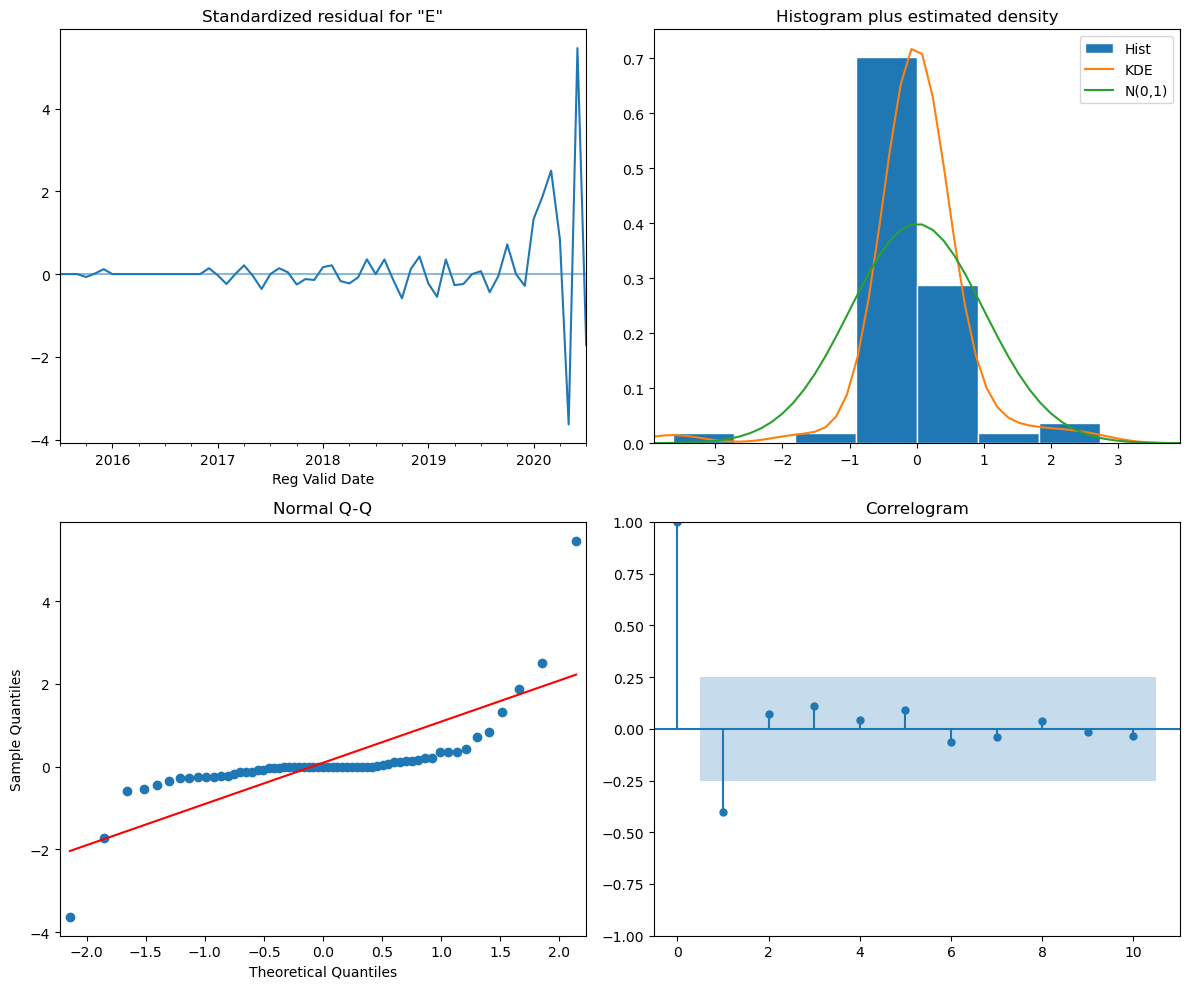

In [138]:
model = SARIMAX(train_WESTCHESTER, order=(2,1,0), seasonal_order=(0,1,0,12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

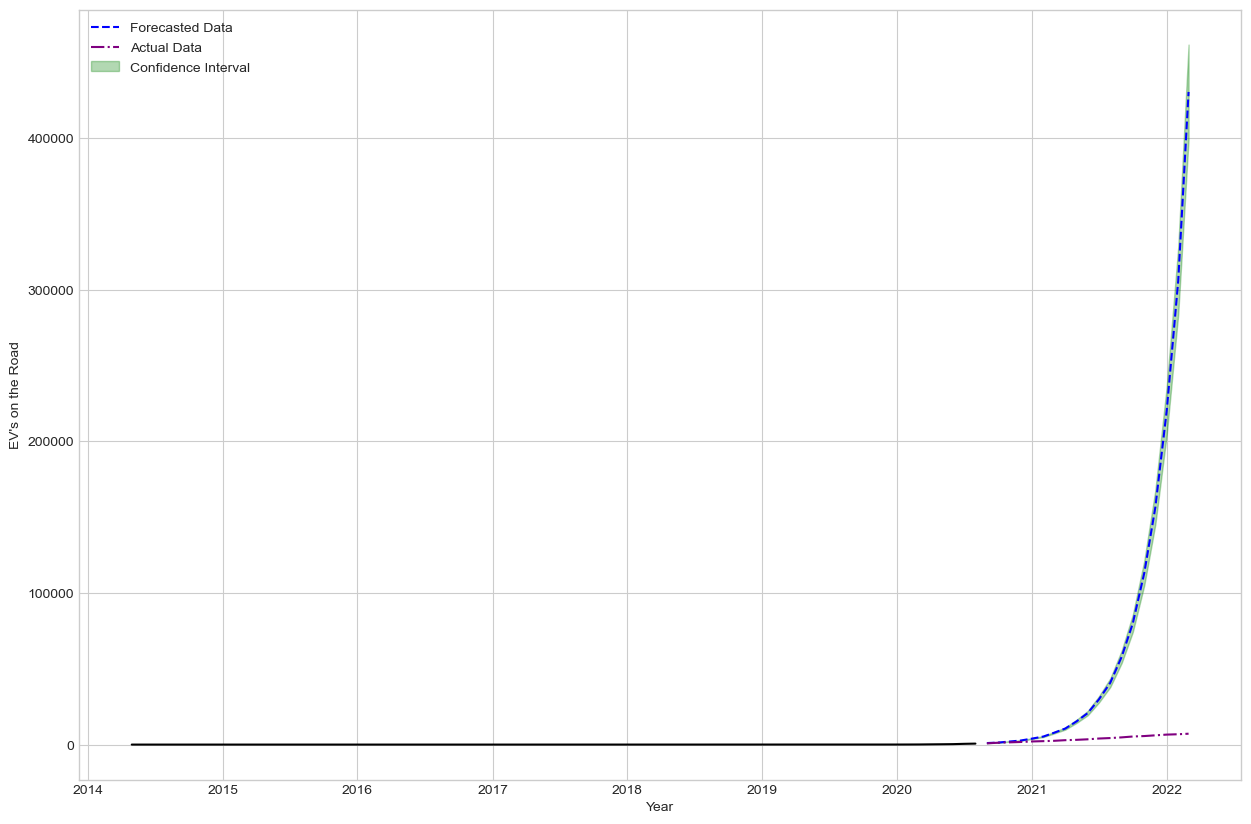

In [139]:
df_WESTCHESTER_forecast = get_forecast(model, train_WESTCHESTER, test_WESTCHESTER, 
                                    plot=True)

The forecast and the observed data are very close to each other throughout the forecasting period. This suggests that our model's performing very well with its predictions. Therefore, we can fit the model to all observed data for Thurston County and make predictions for the future electric vehicle counts.

### Future Predictions

#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   EV's on the Road   No. Observations:                   95
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -433.345
Date:                            Thu, 17 Nov 2022   AIC                            872.690
Time:                                    02:31:33   BIC                            879.836
Sample:                                04-30-2014   HQIC                           875.555
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4599      0.080      5.770      0.000       0.304       0.616
ar.L2          0.4687      0.076      6.183      0.000       0.320       0.617
sigma2      2968.3007    265.231     11.191      0.000    2448.458    3488.144
===================================================================================
Ljung-Box (L1) (Q):                   8.12   Jarque-Bera (JB):               105.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            9867.83   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

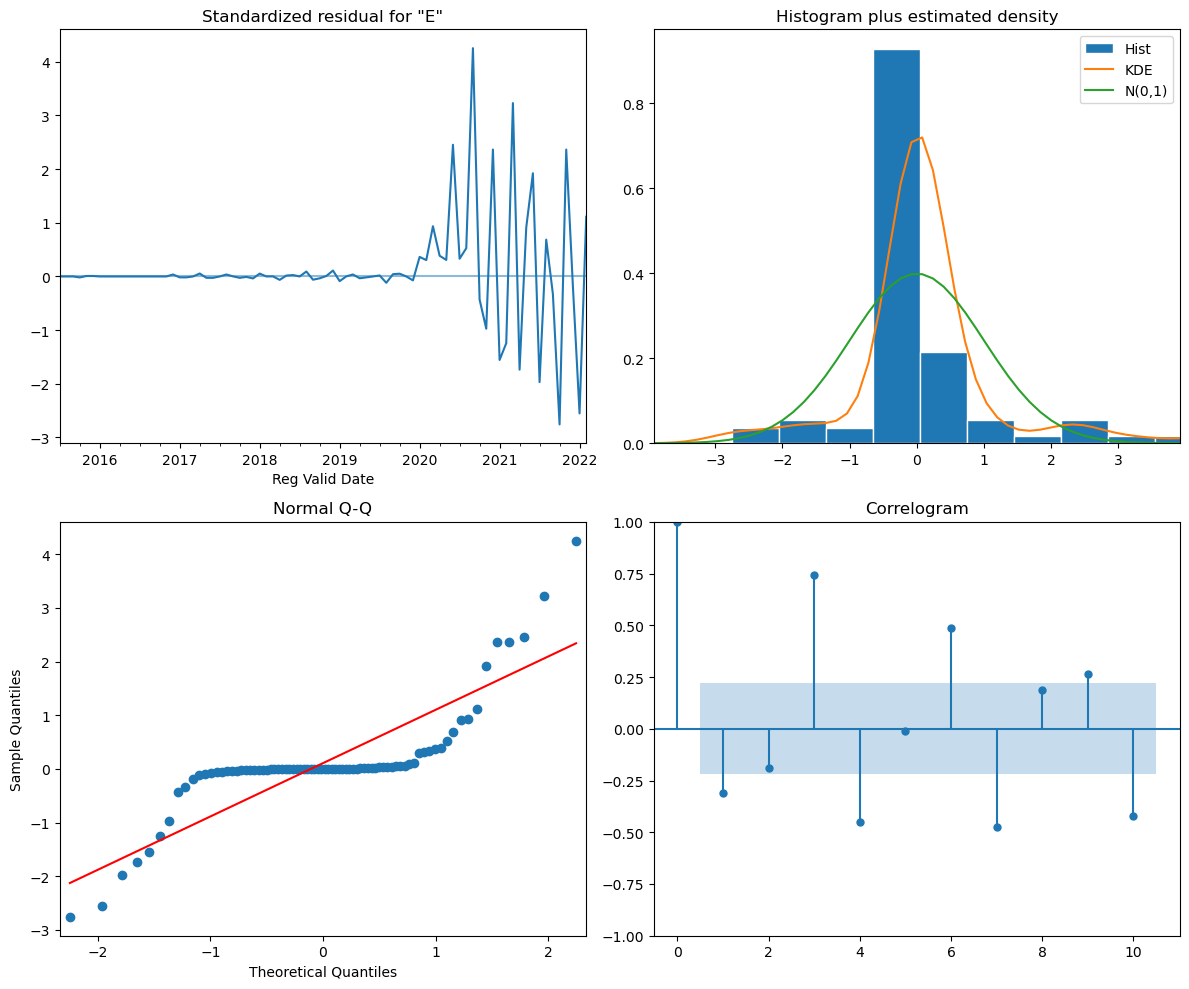

In [140]:
model = SARIMAX(county_information['WESTCHESTER']['df'], order=(2,1,0), 
                seasonal_order=(0,1,0,12), enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

The p-values for all the coefficients in the model are statistically significant based on an alpha value of 0.05. Additionally, the residuals are nearly normally distributed with seasonality successfully removed. Next, we can make predictions on the electric vehicle counts for future dates.

#### Plotting & Saving Predictions

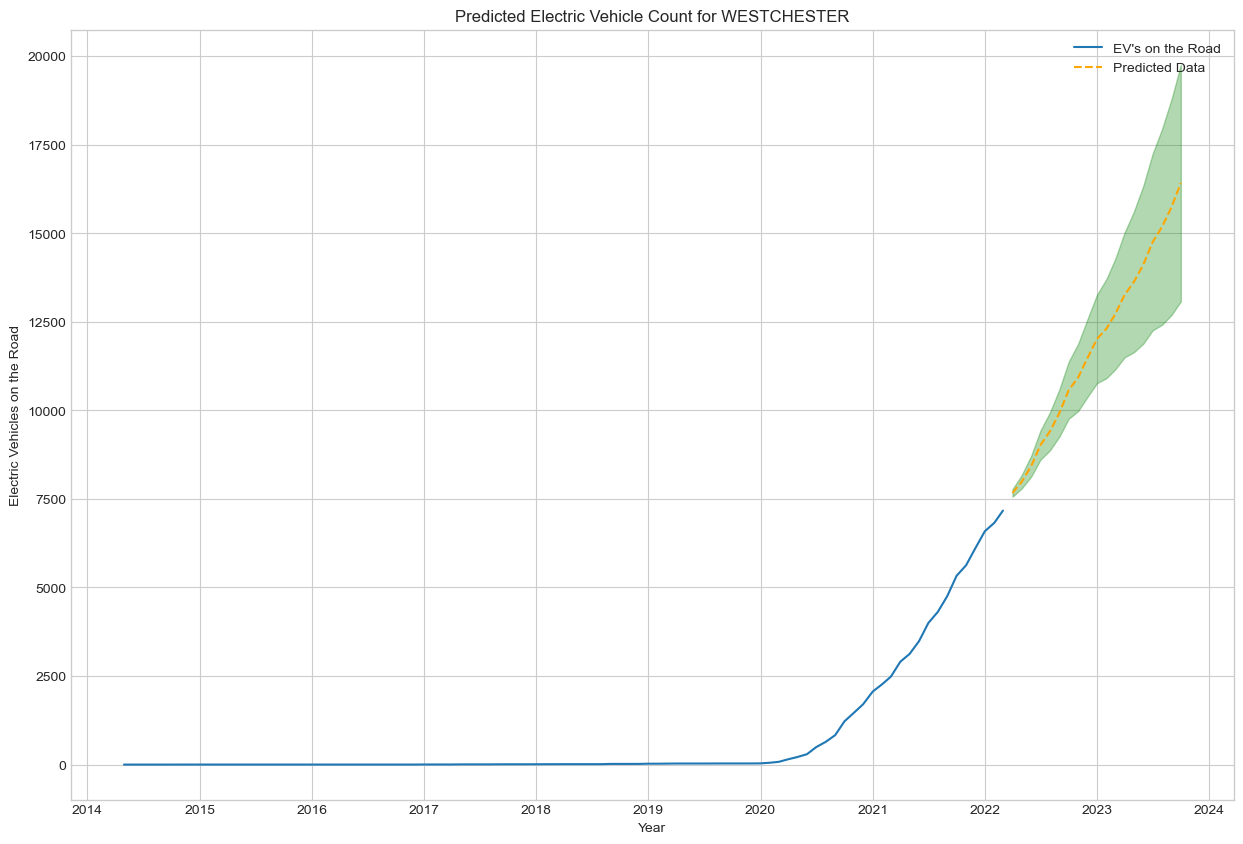

In [141]:
#getting and plotting predictions
df_WESTCHESTER_preds = get_prediction(model, county_information['WESTCHESTER']['df'], 
                               test_WESTCHESTER, 'WESTCHESTER', plot=True)

The model is predicting that the amount of electric vehicles in Thurston County are going to keep increasing at a linear rate (based on the mean prediction). However, if we look at the upper and lower confidence intervals we also see the possibilities of an exponential increase and a leveling off.

In [142]:
#saving predictions
county_information['WESTCHESTER']['Predictions'] = df_WESTCHESTER_preds

## QUEENS

### Seasonality Check

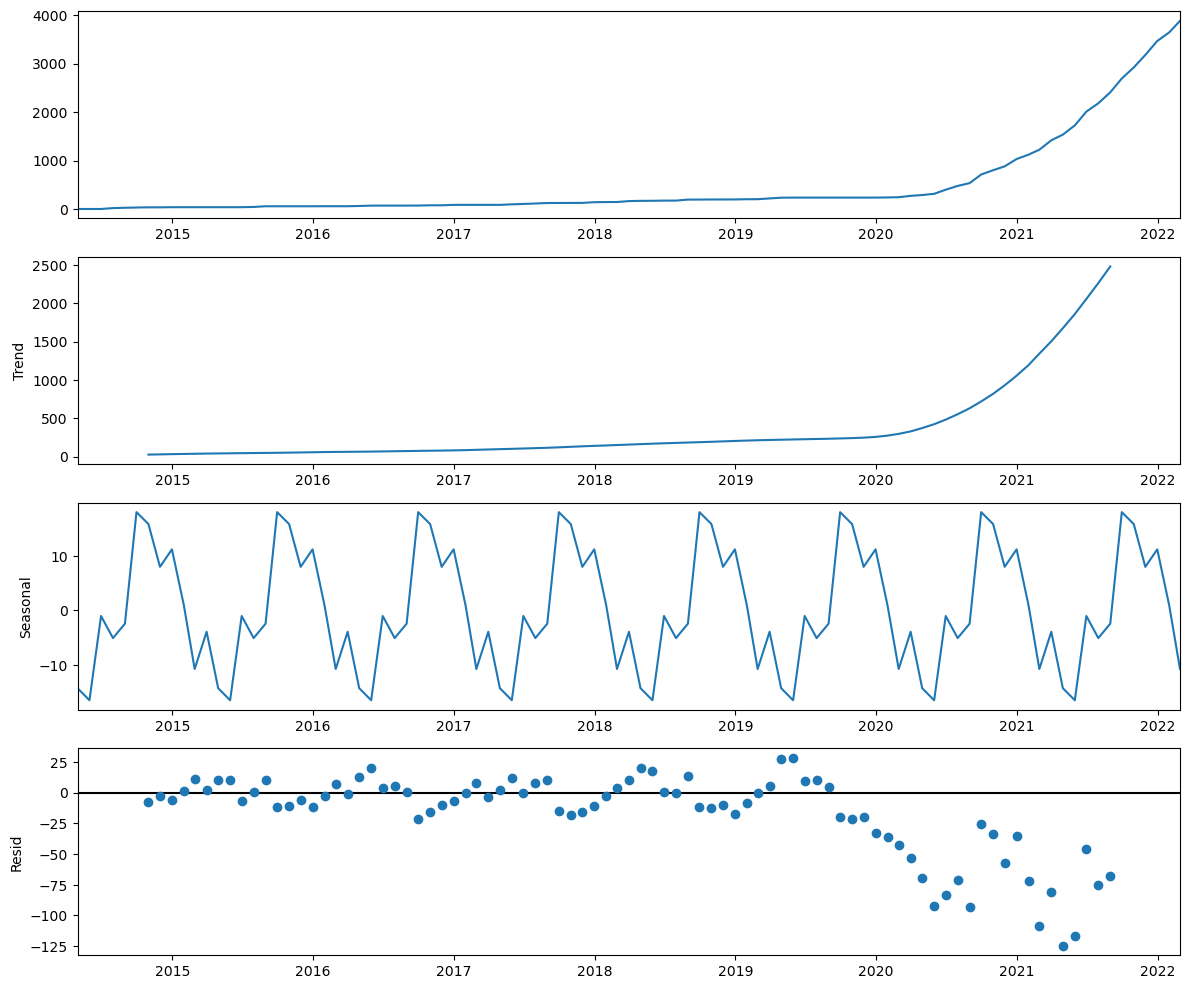

In [143]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['QUEENS']['df'])
decomp.plot();

Electric vehicle count in Kitsap County, similar to previous counties, has an upward trend. It also is showing a seasonal pattern but it is relatively smaller compared to other counties.

### train_test_split

After multiple iterations, we found that the 0.75-0.25 split of the data belonging to Kitsap County resulted in the best performance.

In [144]:
#splitting data into train/test sets for validation
train_QUEENS, test_QUEENS = train_test_split_ts(county_information['QUEENS']['df'], 
                                            0.75, 0.25)

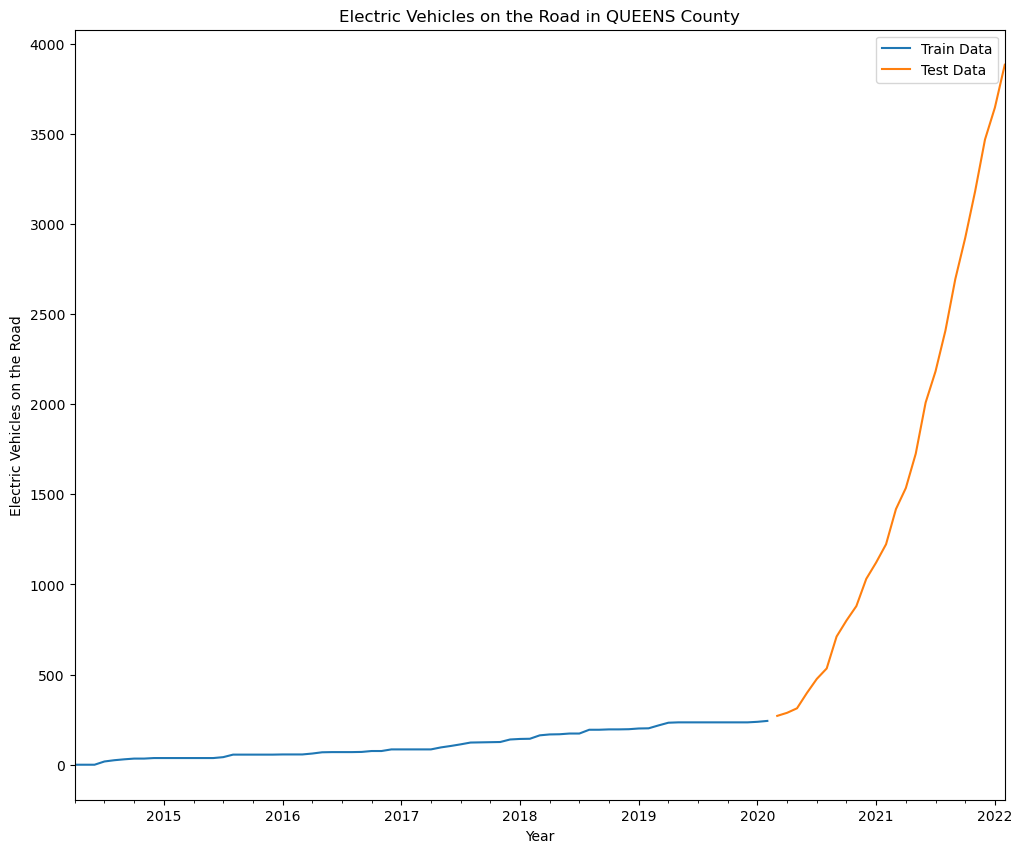

In [145]:
#plotting the split
plot_train_test_split(train_QUEENS, test_QUEENS, 'QUEENS')

### Finding Best Parameters with Auto-Arima

In [146]:
#finding best parameters
auto_model = pm.auto_arima(train_QUEENS, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   71
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -212.694
Date:                              Thu, 17 Nov 2022   AIC                            431.389
Time:                                      02:31:56   BIC                            438.134
Sample:                                  04-30-2014   HQIC                           434.068
                                       - 02-29-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4195      1.218      2.807      0.005       1.032       5.807
ma.S.L12       0.4924      0.098      5.025      0.000       0.300       0.684
sigma2        24.3253      4.165      5.841      0.000      16.162      32.488
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                24.09
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             1.23
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (0, 1, 0) for the ARIMA order with (0, 0, [1], 12) for seasonality. This shows us that the models that had a seasonality order specified performed worse than this model. As discussed above, considering the relatively lower seasonality trend for Kitsap County this is not exactly a surprise. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                   71
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -181.072
Date:                              Thu, 17 Nov 2022   AIC                            366.143
Time:                                      02:32:03   BIC                            370.229
Sample:                                  04-30-2014   HQIC                           367.731
                                       - 02-29-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.6132      0.128      4.793      0.000       0.362       0.864
sigma2        30.6483      4.682      6.547      0.000      21.473      39.824
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                10.51
Prob(Q):                              0.34   Prob(JB):                         0.01
Heteroskedasticity (H):               1.31   Skew:                             0.90
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

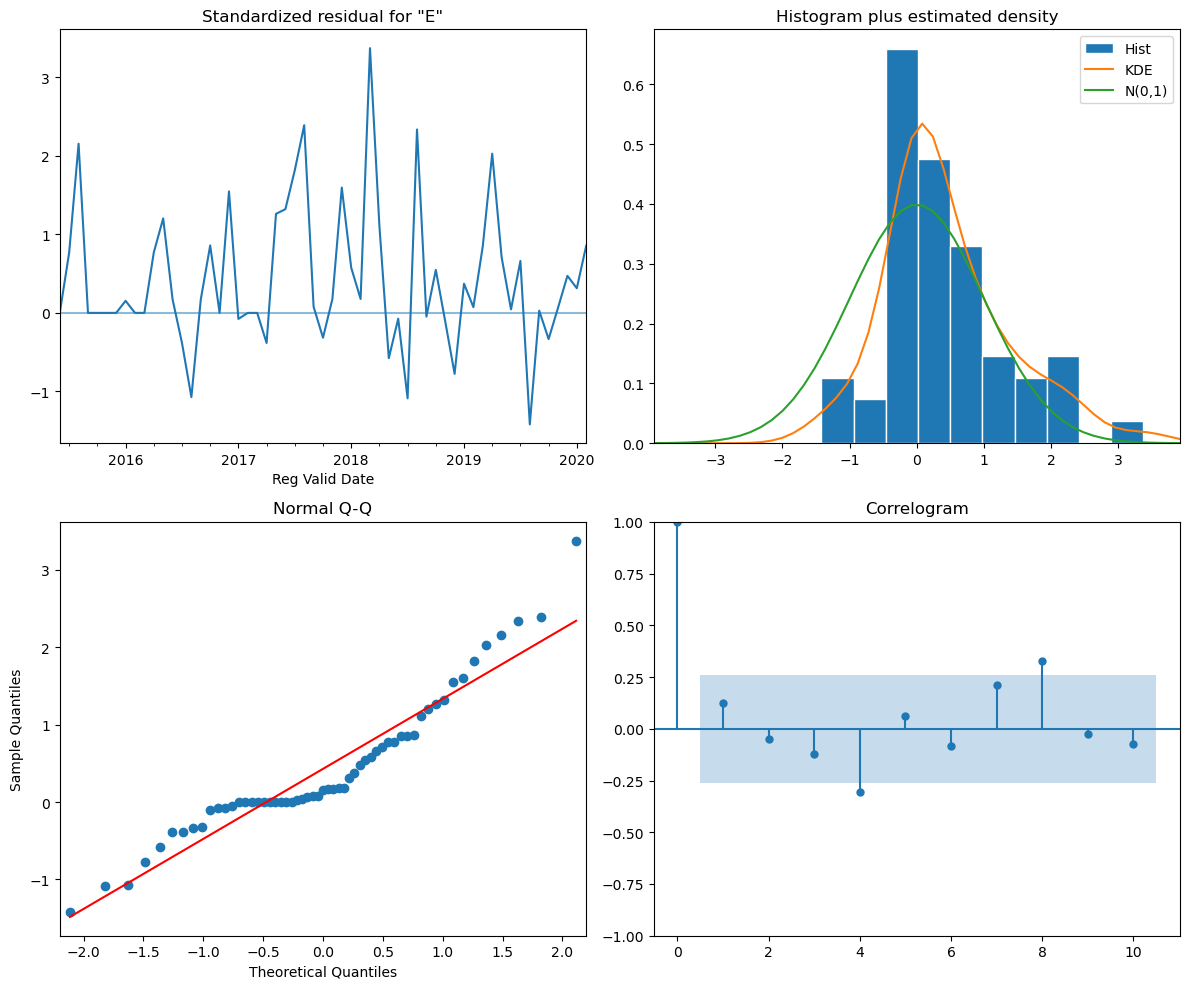

In [147]:
model = SARIMAX(train_QUEENS, order=(0, 1, 0), seasonal_order=(0, 0, [1], 12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

Even though not all p-values for the coefficients are statistically significant based on an alpha of 0.05, the residuals from the model are normally distributed and based on the correlogram, we can once again see that there is no seasonality.

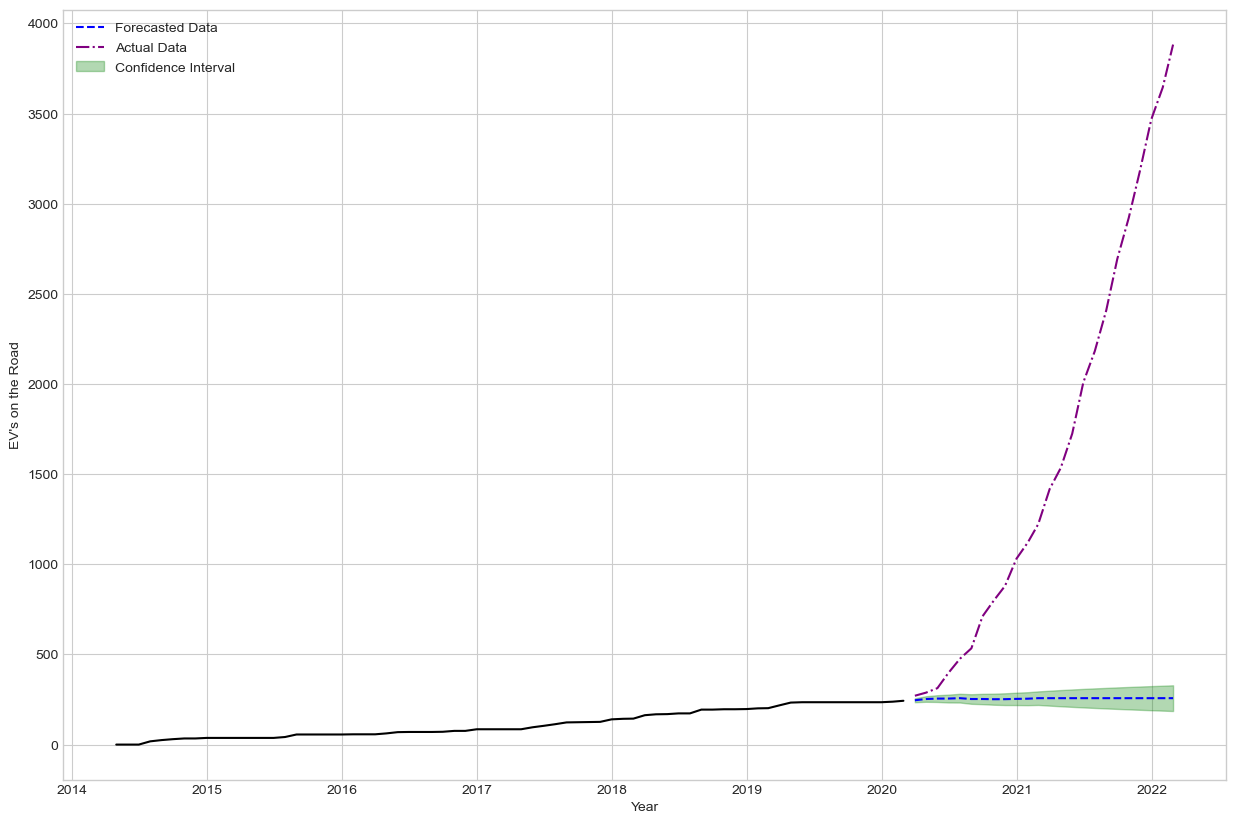

In [148]:
df_Queens_forecast = get_forecast(model, train_QUEENS, test_QUEENS, plot=True)

The forecast and the observed data seem to be very close to each other which validates that the model is ready to be fitted to all observed data to make future predictions.

### Future Predictions

#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                   95
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -465.527
Date:                              Thu, 17 Nov 2022   AIC                            935.053
Time:                                      02:32:37   BIC                            939.842
Sample:                                  04-30-2014   HQIC                           936.975
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.0000      0.108      9.243      0.000       0.788       1.212
sigma2      4278.9444   2.53e-05   1.69e+08      0.000    4278.944    4278.944
===================================================================================
Ljung-Box (L1) (Q):                  60.12   Jarque-Bera (JB):                32.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             589.01   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  6e+23. Standard errors may be unstable.
"""

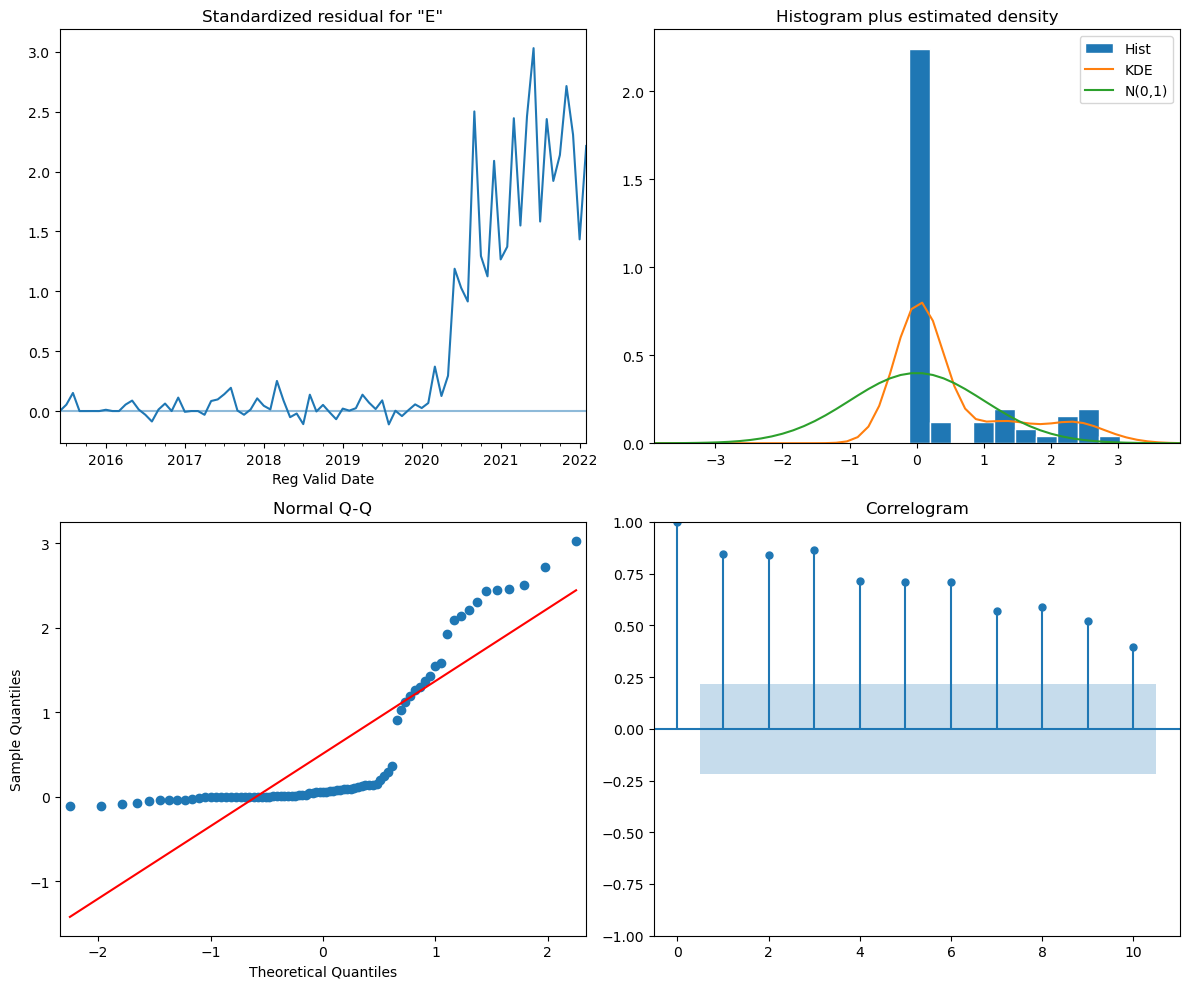

In [149]:
model = SARIMAX(county_information['QUEENS']['df'], order=(0, 1, 0), 
                seasonal_order=(0, 0, [1], 12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)


#### Plotting & Saving Predictions

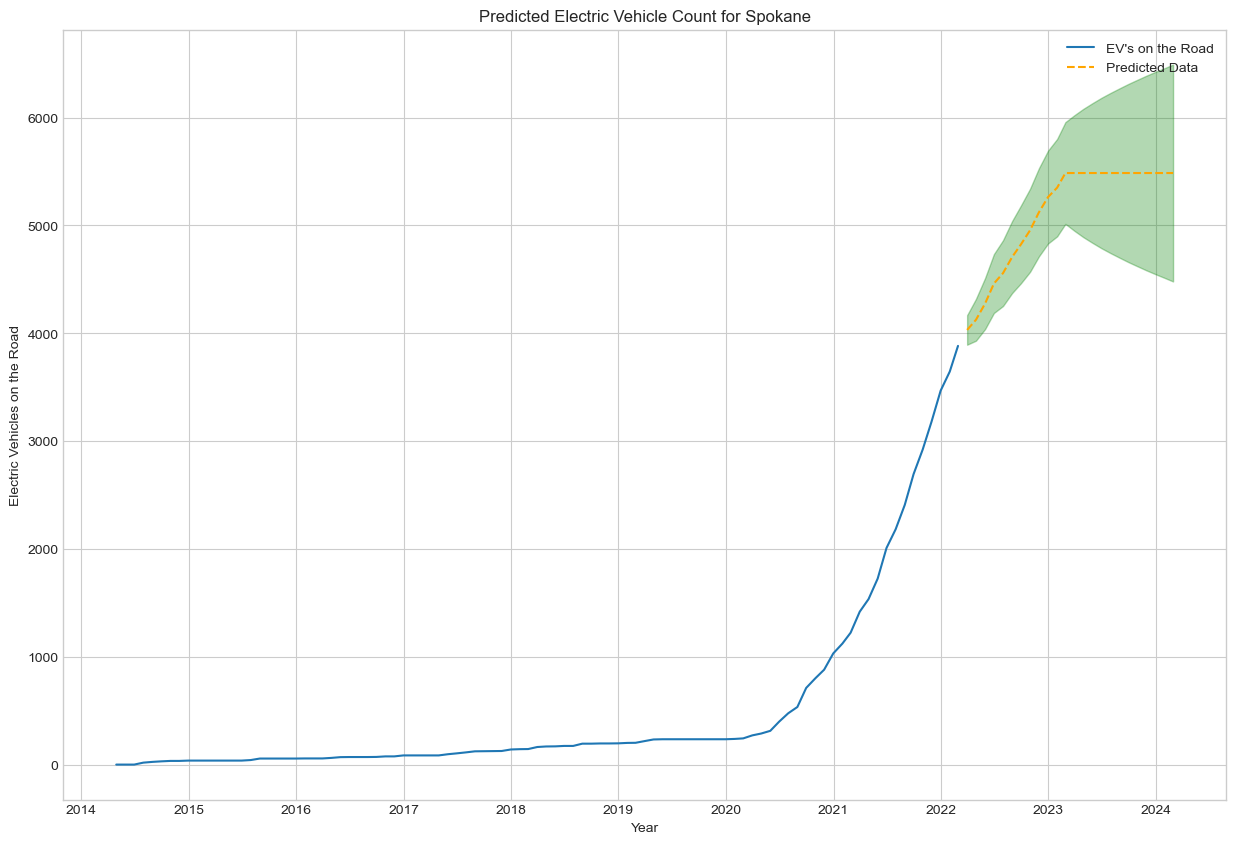

In [150]:
#getting and plotting predictions
df_QUEENS_preds = get_prediction(model, county_information['QUEENS']['df'], 
                               test_QUEENS, 'Spokane', plot=True)

In [151]:
#saving predictions
county_information['QUEENS']['Predictions'] = df_QUEENS_preds

## NEW YORK

### Seasonality Check

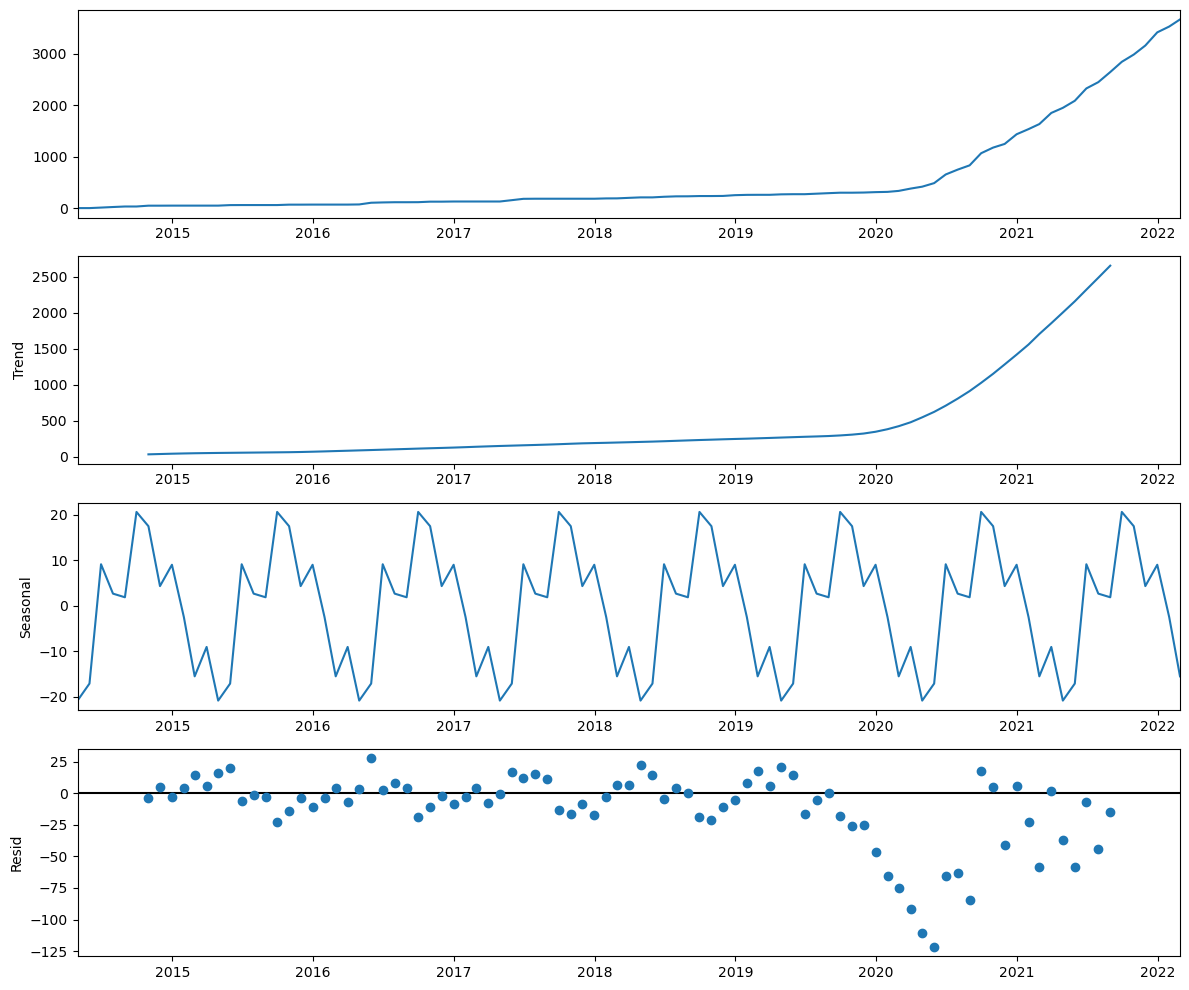

In [152]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['NEW YORK']['df'])
decomp.plot();

### train_test_split

In [153]:
#splitting data into train/test sets for validation
train_NEW_YORK, test_NEW_YORK = train_test_split_ts(county_information['NEW YORK']['df'], 
                                            0.75, 0.25)

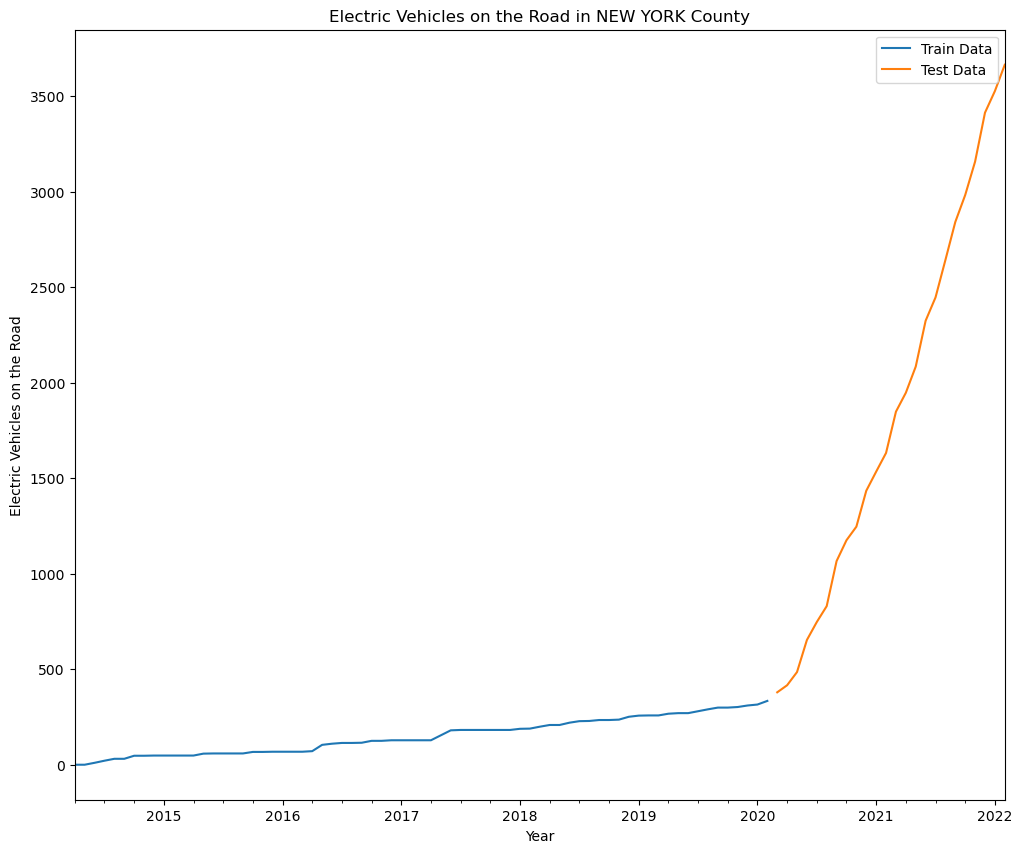

In [154]:
#plotting the split
plot_train_test_split(train_NEW_YORK, test_NEW_YORK, 'NEW YORK')

### Finding Best Parameters with Auto-Arima

In [155]:
#finding best parameters
auto_model = pm.auto_arima(train_NEW_YORK, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   71
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -228.519
Date:                              Thu, 17 Nov 2022   AIC                            463.039
Time:                                      02:33:00   BIC                            469.784
Sample:                                  04-30-2014   HQIC                           465.718
                                       - 02-29-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8737      1.495      3.260      0.001       1.944       7.803
ma.S.L12       0.4912      0.145      3.397      0.001       0.208       0.775
sigma2        38.2417      6.264      6.105      0.000      25.965      50.519
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                63.44
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             1.65
Prob(H) (two-sided):                  0.46   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (0,1,0) for the ARIMA order with with (0, 0, [1], 12) for seasonality. This shows us that the models that had a seasonality order specified performed worse than this model. As discussed above, considering the relatively lower seasonality trend for NEW York County this is not exactly a surprise. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                   71
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -193.684
Date:                              Thu, 17 Nov 2022   AIC                            391.369
Time:                                      02:33:01   BIC                            395.455
Sample:                                  04-30-2014   HQIC                           392.957
                                       - 02-29-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.6860      0.253      2.715      0.007       0.191       1.181
sigma2        46.2336      8.979      5.149      0.000      28.636      63.831
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                71.22
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             1.85
Prob(H) (two-sided):                  0.87   Kurtosis:                         7.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

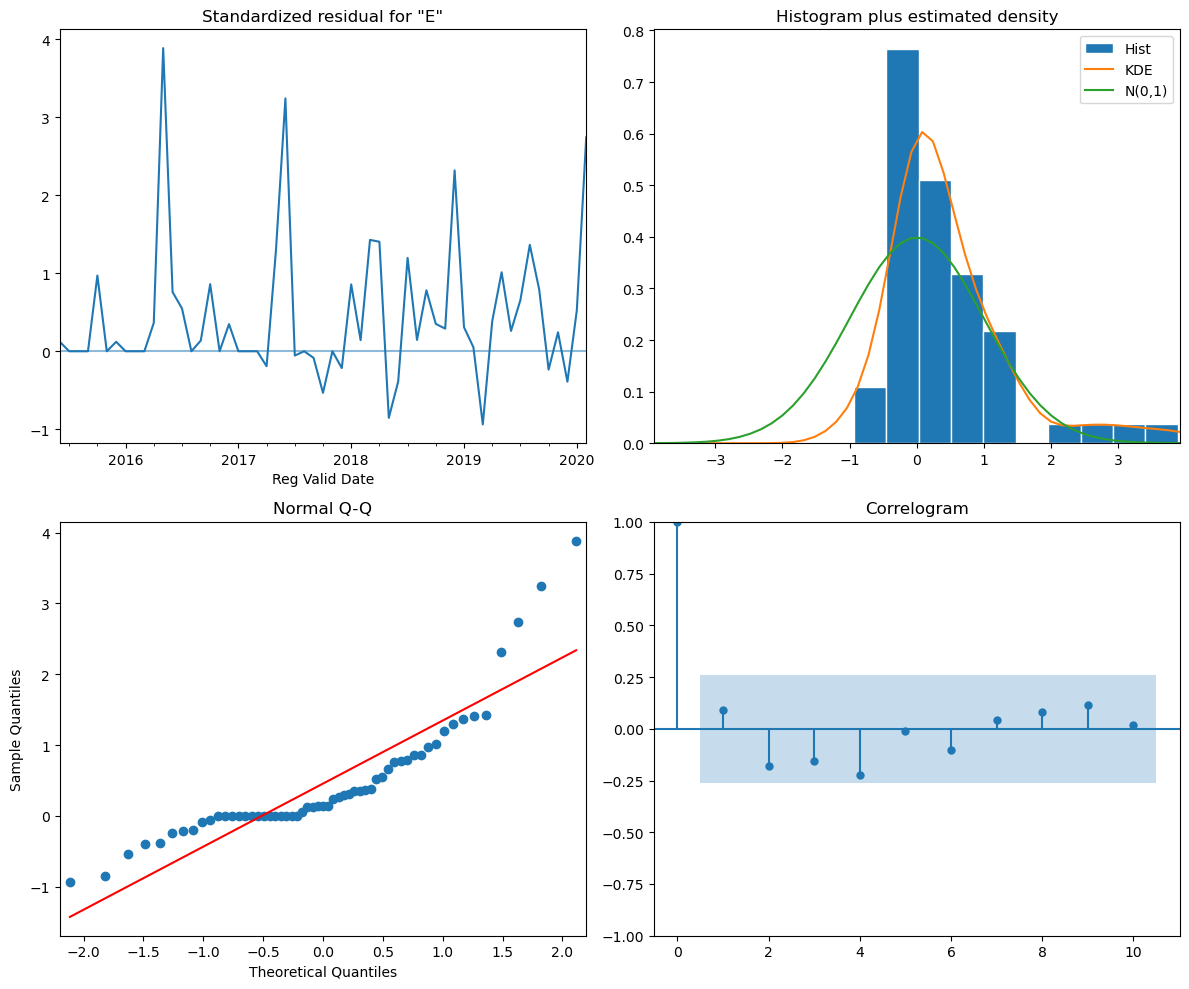

In [156]:
#fitting SARIMAX model with best params
model = SARIMAX(train_NEW_YORK, order=(0,1,0), seasonal_order=(0, 0, [1], 12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

Above, we can see that the residuals are almost perfectly normally distributed. This indicates that the parameters chosen above were successful in removing the seasonality and the trend. Additionally, even though some of the coefficients have values higher than 0.05 (our chosen alpha value), based on the AIC score these parameters resulted in the best model. So we will be moving on with this model.

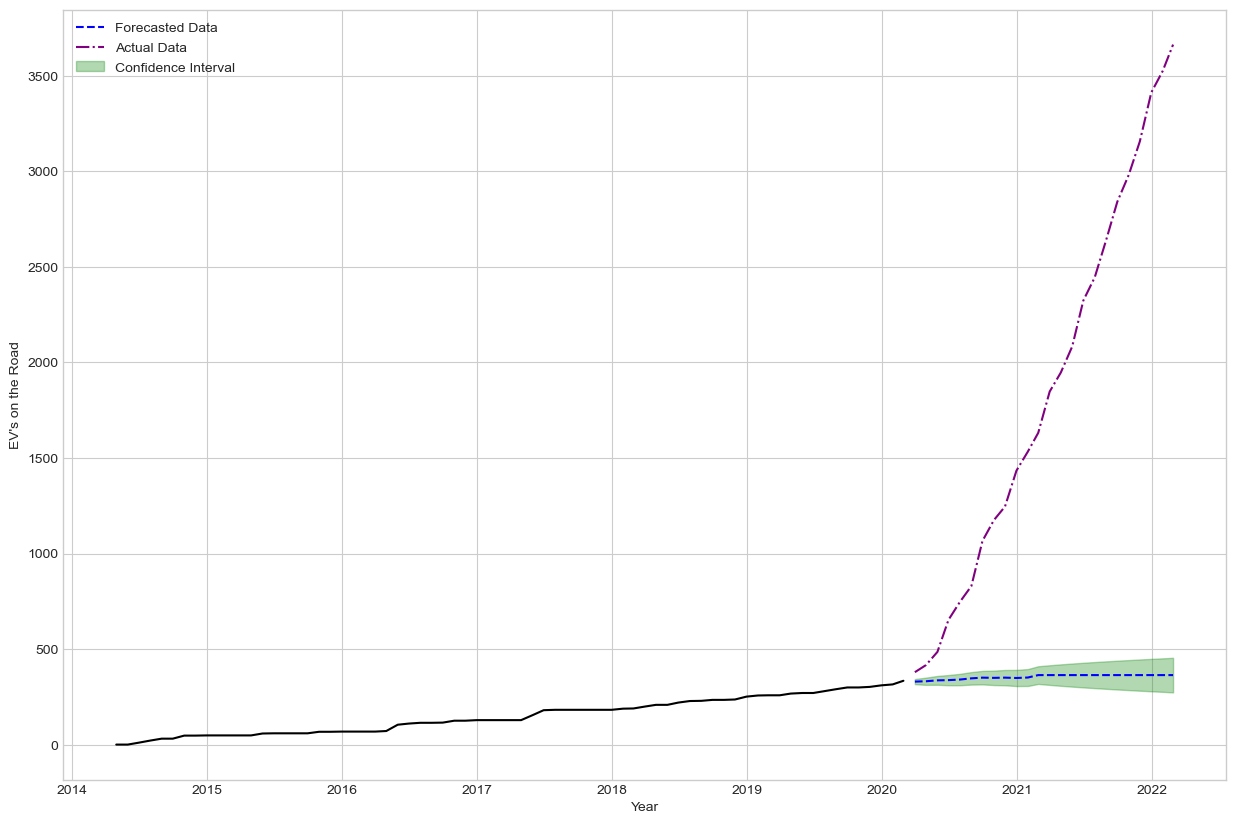

In [157]:
df_NEY_YORK_forecast = get_forecast(model, train_NEW_YORK, test_NEW_YORK, plot=True)

### Future Predictions

#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     EV's on the Road   No. Observations:                   95
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -450.203
Date:                              Thu, 17 Nov 2022   AIC                            904.407
Time:                                      02:33:08   BIC                            909.196
Sample:                                  04-30-2014   HQIC                           906.328
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       1.0000      0.087     11.490      0.000       0.829       1.171
sigma2      2930.0167   2.97e-05   9.86e+07      0.000    2930.017    2930.017
===================================================================================
Ljung-Box (L1) (Q):                  34.07   Jarque-Bera (JB):                99.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             227.33   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.55e+22. Standard errors may be unstable.
"""

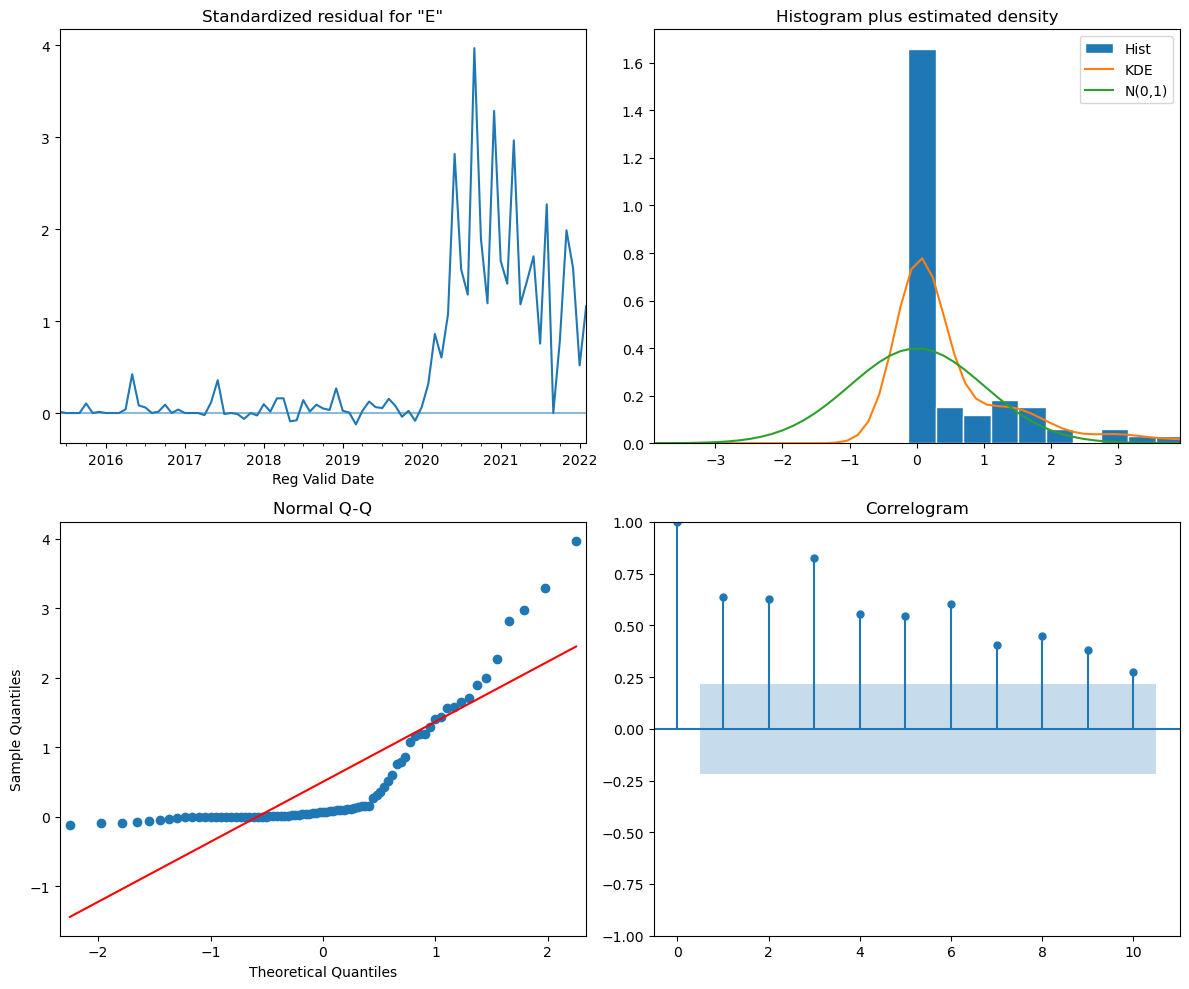

In [158]:
model = SARIMAX(county_information['NEW YORK']['df'], order=(0, 1, 0), 
                seasonal_order=(0, 0, [1], 12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

#### Plotting & Saving Predictions

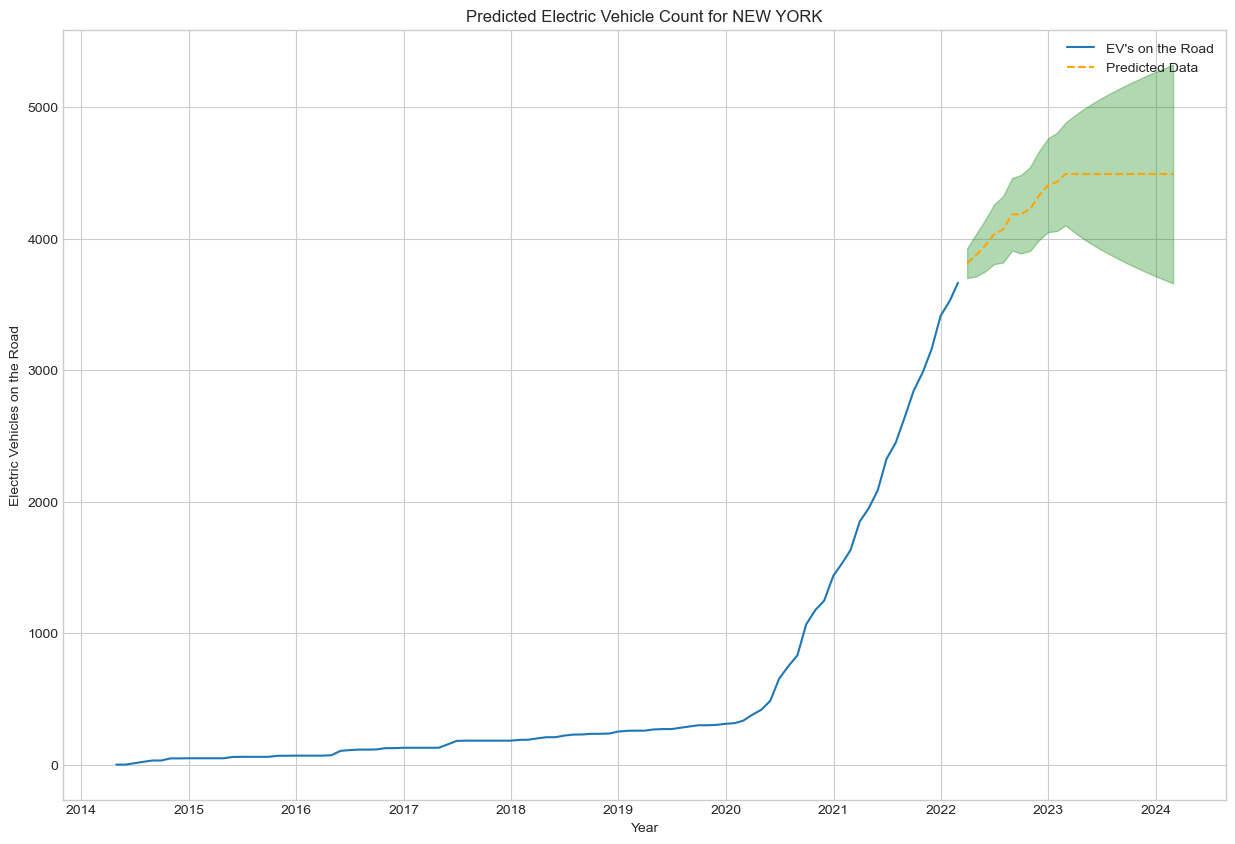

In [161]:
#getting and plotting predictions
df_NEW_YORK_preds = get_prediction(model, county_information['NEW YORK']['df'], 
                               test_NEW_YORK, 'NEW YORK', plot=True)

In [162]:
#saving predictions
county_information['NEW YORK']['Predictions'] = df_NEW_YORK_preds

### Importing the data

In [163]:
df_chargers = pd.read_csv('Resources/Electric_Vehicle_Charging_Stations_in_New_York.csv') 
df_chargers.head()

Fuel Type Code                Station Name             Street Address  \
0           ELEC  Town of Penfield - Library              1985 Baird Rd   
1           ELEC          Village of Webster        28 West Main Street   
2           ELEC   HOTSARA CHARGER STATION 1                100 Main St   
3           ELEC            Houghton College                 9736 Rt 19   
4           ELEC    NYC FLEET DPRMBLOT8_1_L3  920 Father Capodanno Blvd   

  Intersection Directions           City State    ZIP  Plus4 Station Phone  \
0                     NaN       Penfield    NY  14526    NaN  585-340-8720   
1                     NaN        Webster    NY  14580    NaN  866-816-7584   
2                     NaN   Saranac Lake    NY  12983    NaN  888-758-4389   
3                     NaN       Houghton    NY  14744    NaN  866-816-7584   
4                     NaN  Midland Beach    NY  10305    NaN  888-758-4389   

  Status Code  ...   Latitude  Longitude Date Last Confirmed      ID  \
0           E  ...  43.137476 -77.465214          06/07/2021   49941   
1           E  ...  43.211386 -77.431663          11/10/2022  116756   
2           E  ...  44.326862 -74.130150          11/10/2022  149787   
3           E  ...  42.423869 -78.154428          11/10/2022  157942   
4           E  ...  40.572636 -74.086140          11/10/2022  182295   

            Updated At  Owner Type Code  Federal Agency ID  \
0  2022-02-10 19:42:29               LG                NaN   
1  2022-11-10 02:00:34              NaN                NaN   
2  2022-11-10 00:57:46              NaN                NaN   
3  2022-11-10 02:00:45              NaN                NaN   
4  2022-11-10 01:05:12              NaN                NaN   

  Federal Agency Name   Open Date  EV Connector Types  
0                 NaN  04/01/2012               J1772  
1                 NaN  08/31/2018               J1772  
2                 NaN  12/07/2019               J1772  
3                 NaN  05/15/2020               J1772  
4                 NaN  01/27/2021  CHADEMO J1772COMBO  

[5 rows x 31 columns]

To be able to interpret our results correctly and find the counties with the most potential for investment, we need to take into account the existing charging infrastructure. A

## Current Charger Infrastructure by County

In [164]:
df_chargers = pd.read_csv('Resources/Electric_Vehicle_Charging_Stations_in_New_York.csv') 
df_chargers.head()

Fuel Type Code                Station Name             Street Address  \
0           ELEC  Town of Penfield - Library              1985 Baird Rd   
1           ELEC          Village of Webster        28 West Main Street   
2           ELEC   HOTSARA CHARGER STATION 1                100 Main St   
3           ELEC            Houghton College                 9736 Rt 19   
4           ELEC    NYC FLEET DPRMBLOT8_1_L3  920 Father Capodanno Blvd   

  Intersection Directions           City State    ZIP  Plus4 Station Phone  \
0                     NaN       Penfield    NY  14526    NaN  585-340-8720   
1                     NaN        Webster    NY  14580    NaN  866-816-7584   
2                     NaN   Saranac Lake    NY  12983    NaN  888-758-4389   
3                     NaN       Houghton    NY  14744    NaN  866-816-7584   
4                     NaN  Midland Beach    NY  10305    NaN  888-758-4389   

  Status Code  ...   Latitude  Longitude Date Last Confirmed      ID  \
0           E  ...  43.137476 -77.465214          06/07/2021   49941   
1           E  ...  43.211386 -77.431663          11/10/2022  116756   
2           E  ...  44.326862 -74.130150          11/10/2022  149787   
3           E  ...  42.423869 -78.154428          11/10/2022  157942   
4           E  ...  40.572636 -74.086140          11/10/2022  182295   

            Updated At  Owner Type Code  Federal Agency ID  \
0  2022-02-10 19:42:29               LG                NaN   
1  2022-11-10 02:00:34              NaN                NaN   
2  2022-11-10 00:57:46              NaN                NaN   
3  2022-11-10 02:00:45              NaN                NaN   
4  2022-11-10 01:05:12              NaN                NaN   

  Federal Agency Name   Open Date  EV Connector Types  
0                 NaN  04/01/2012               J1772  
1                 NaN  08/31/2018               J1772  
2                 NaN  12/07/2019               J1772  
3                 NaN  05/15/2020               J1772  
4                 NaN  01/27/2021  CHADEMO J1772COMBO  

[5 rows x 31 columns]

In [165]:
df_chargers["ZIP"].dropna()


0       14526
1       14580
2       12983
3       14744
4       10305
        ...  
3079    14222
3080    10314
3081    12834
3082    13440
3083    14454
Name: ZIP, Length: 3084, dtype: int64

In [166]:
df_chargers['Status Code'].value_counts()

E    3084
Name: Status Code, dtype: int64

Creating Zipcode Map to Find Counties

In [168]:
from uszipcode import SearchEngine

C:\Users\simro\anaconda3\envs\mlenv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [169]:
#Creating a dictionary that shows which county each zipcode is in
zipcodes_to_search = list(df_chargers['ZIP'].unique())
search = SearchEngine()
zip_map = {}


for zipcode in zipcodes_to_search:
    if zipcode == 12081:
        pass
    elif zipcode == 12217:
        pass
    else:
        zip_info = search.by_zipcode(zipcode).county
        zip_map[zipcode] = zip_info

zip_map

Download C:\Users\simro\.uszipcode\simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


{14526: 'Monroe County',
 14580: 'Monroe County',
 12983: 'Franklin County',
 14744: 'Allegany County',
 10305: 'Richmond County',
 14227: 'Erie County',
 11220: 'Kings County',
 13090: 'Onondaga County',
 10954: 'Rockland County',
 14853: 'Tompkins County',
 11040: 'Nassau County',
 12205: 'Albany County',
 11976: 'Suffolk County',
 12590: 'Dutchess County',
 11212: 'Kings County',
 12534: 'Columbia County',
 14204: 'Erie County',
 10901: 'Rockland County',
 12180: 'Rensselaer County',
 10065: 'New York County',
 13027: 'Onondaga County',
 14621: 'Monroe County',
 11954: 'Suffolk County',
 11710: 'Nassau County',
 12110: 'Albany County',
 11901: 'Suffolk County',
 12020: 'Saratoga County',
 12477: 'Ulster County',
 13441: 'Oneida County',
 12144: 'Rensselaer County',
 14223: 'Erie County',
 14850: 'Tompkins County',
 14616: 'Monroe County',
 12054: 'Albany County',
 12866: 'Saratoga County',
 14731: 'Cattaraugus County',
 10022: 'New York County',
 14072: 'Erie County',
 12065: 'Sarat

# Feature Engineering 'County' Column for df_chargers

In [170]:
#mapping county information for each charger based on zipcode
df_chargers['County'] = df_chargers['ZIP'].map(zip_map) 
df_chargers['County'].head()

0      Monroe County
1      Monroe County
2    Franklin County
3    Allegany County
4    Richmond County
Name: County, dtype: object

### Saving Total Electrical Charger Count in Each County

In [171]:
df_charger_counts = pd.DataFrame(df_chargers['County'].value_counts()) 
df_charger_counts.reset_index(inplace=True) 
df_charger_counts.columns=['County', 'Charger Count'] 
df_charger_counts.head(10)

County  Charger Count
0     New York County            357
1       Albany County            331
2         Erie County            212
3       Monroe County            179
4      Suffolk County            178
5     Saratoga County            146
6  Westchester County            122
7        Kings County            108
8     Onondaga County            100
9       Queens County             98

In [173]:
df_charger_counts['County'] = df_charger_counts['County'].str[:-7]


In [174]:
df_charger_counts['County']=df_charger_counts['County'].str.upper()
df_charger_counts

County  Charger Count
0    NEW YORK            357
1      ALBANY            331
2        ERIE            212
3      MONROE            179
4     SUFFOLK            178
..        ...            ...
58      LEWIS              3
59      TIOGA              3
60   CHENANGO              3
61  SCHOHARIE              2
62   CAMPBELL              1

[63 rows x 2 columns]

In [175]:
df_charger_counts.set_index('County')

Charger Count
County                  
NEW YORK             357
ALBANY               331
ERIE                 212
MONROE               179
SUFFOLK              178
...                  ...
LEWIS                  3
TIOGA                  3
CHENANGO               3
SCHOHARIE              2
CAMPBELL               1

[63 rows x 1 columns]

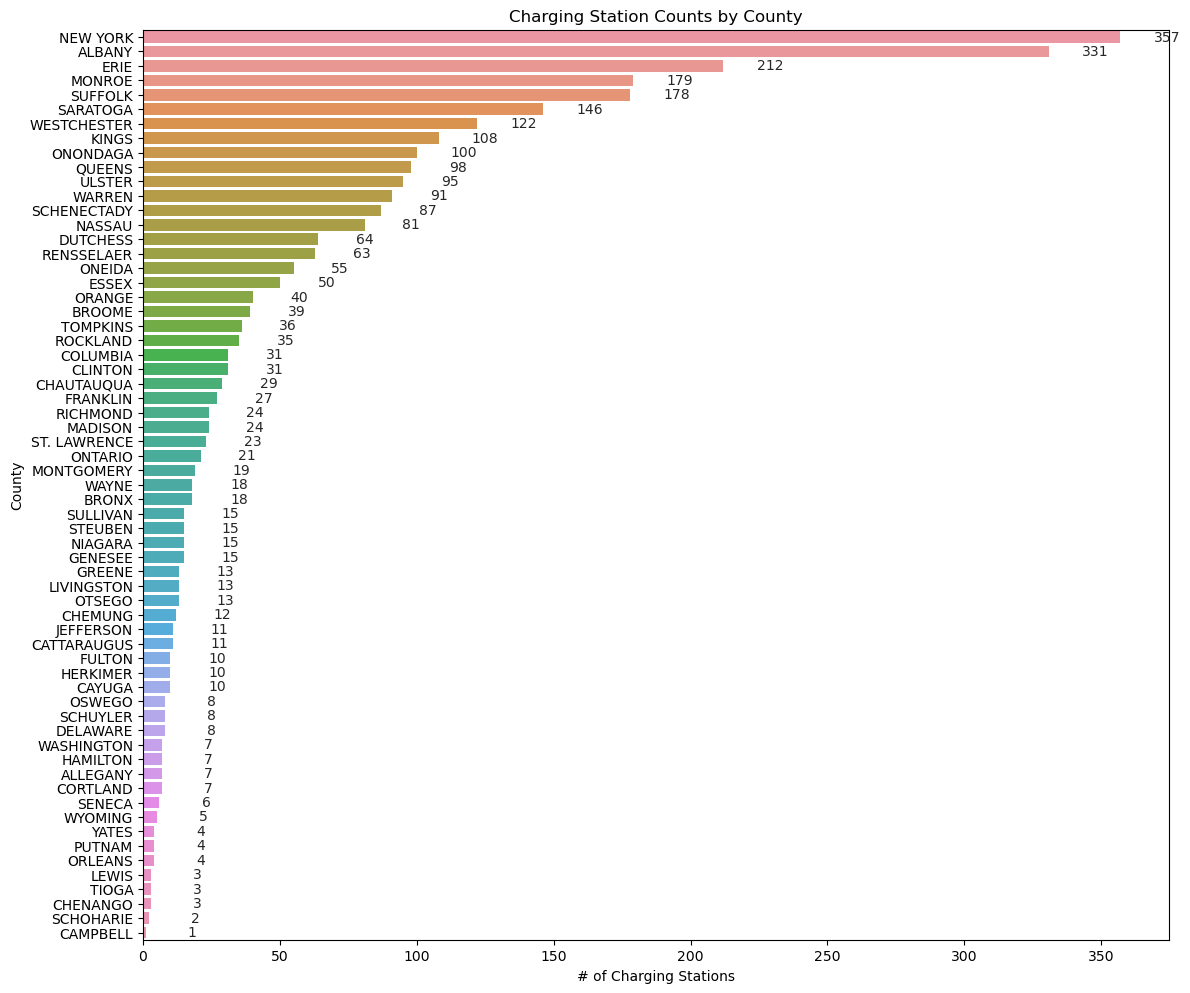

In [176]:
fig, ax = plt.subplots()
with plt.style.context('seaborn-whitegrid'):
    sns.barplot(x='Charger Count', y='County', data=df_charger_counts, orient='h', ax=ax)
    ax.set_title('Charging Station Counts by County')
    ax.set_xlabel('# of Charging Stations')
    x_labels = list(df_charger_counts['Charger Count'])
    rects = ax.patches

    for rect, label in zip(rects, x_labels):
        width = rect.get_width()
        ax.text(rect.get_width()+17, rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')
    plt.tight_layout();
plt.savefig('images/charger_counts.png', facecolor='white')

In [177]:
#saving the df for dashboarding
path = 'Resources'
output_file = os.path.join(path,f'df_charger_counts.csv') 
df_charger_counts.to_csv(output_file, index=False)

In [178]:
top_6_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK']

In [179]:
comparison_df=pd.DataFrame()
i=0
for county in top_6_county:
    print(county)
    comparison_df.loc[i, 'County']=county
    
    comparison_df.loc[i, 'EV Count for 2021-05-31']= \
    county_information[county]['df']["EV's on the Road"][-1]
    
    print(round(county_information[county]['Predictions']['Predictions'][15],0))
    comparison_df.loc[i, 'EV Prediction for 2023-08-31'] = \
    round(county_information[county]['Predictions']['Predictions'][15],0)
    
    
    comparison_df.loc[i, 'Existing Charger Count'] = \
    df_charger_counts.loc[df_charger_counts['County'] == county, 'Charger Count'].iloc[0]
    i+=1

comparison_df['Chargers per EV'] = \
round(comparison_df['Existing Charger Count']/\
      comparison_df['EV Prediction for 2023-08-31'],3)

comparison_df['EVs per Charger'] = \
round(comparison_df['EV Prediction for 2023-08-31']/\
      comparison_df['Existing Charger Count'],0)

comparison_df['EVs Added (Today-2023)'] = \
comparison_df['EV Prediction for 2023-08-31'] - comparison_df['EV Count for 2021-05-31']

comparison_df.sort_values('EV Prediction for 2023-08-31', ascending=False, 
                          inplace=True)
comparison_df.set_index('County', inplace=True)
comparison_df

KINGS
48347.0
NASSAU
18747.0
SUFFOLK
15507.0
WESTCHESTER
14749.0
QUEENS
5486.0
NEW YORK
4490.0


EV Count for 2021-05-31  EV Prediction for 2023-08-31  \
County                                                               
KINGS                        10212.0                       48347.0   
NASSAU                        8531.0                       18747.0   
SUFFOLK                       7369.0                       15507.0   
WESTCHESTER                   7170.0                       14749.0   
QUEENS                        3883.0                        5486.0   
NEW YORK                      3664.0                        4490.0   

             Existing Charger Count  Chargers per EV  EVs per Charger  \
County                                                                  
KINGS                         108.0            0.002            448.0   
NASSAU                         81.0            0.004            231.0   
SUFFOLK                       178.0            0.011             87.0   
WESTCHESTER                   122.0            0.008            121.0   
QUEENS                         98.0            0.018             56.0   
NEW YORK                      357.0            0.080             13.0   

             EVs Added (Today-2023)  
County                               
KINGS                       38135.0  
NASSAU                      10216.0  
SUFFOLK                      8138.0  
WESTCHESTER                  7579.0  
QUEENS                       1603.0  
NEW YORK                      826.0

In [180]:
col_list = list(comparison_df.columns)
col_list.remove('Chargers per EV')

In [181]:
for col in col_list:
    comparison_df[col] = comparison_df[col].astype('int64')

In [182]:
comparison_df.sort_values('EVs per Charger', ascending=False, inplace=True)
comparison_df.style.background_gradient(axis=0, subset=['EVs per Charger'], 
                                        cmap='RdYlGn')
# comparison_df.style.applymap('green', subset=pd.IndexSlice['Island'])

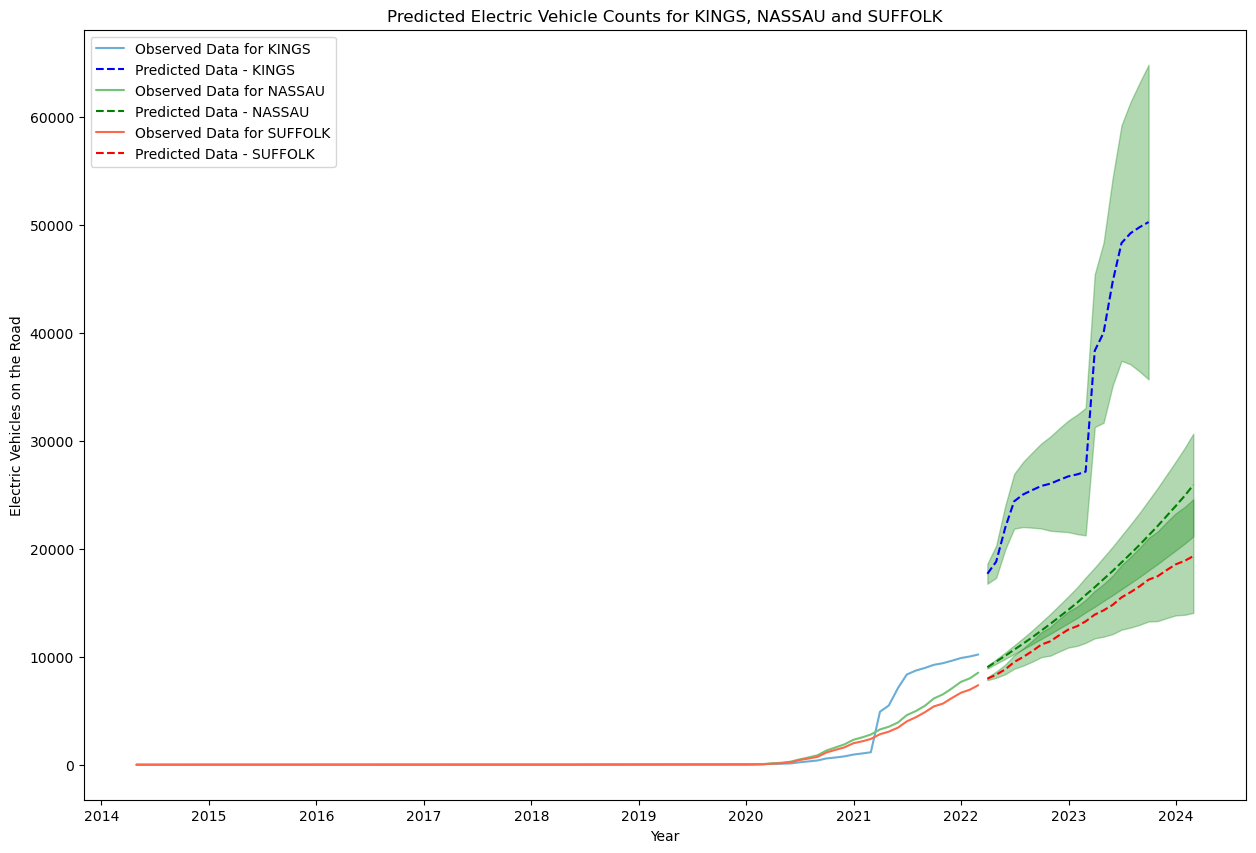

In [183]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicles on the Road')
ax.set_title(f'Predicted Electric Vehicle Counts for KINGS, NASSAU and SUFFOLK')

for county in ['KINGS', 'NASSAU', 'SUFFOLK']:
    prediction_df = county_information[county]['Predictions']
    
    if county == 'KINGS':
        palette = 'Blues'
        color='blue'
    elif county == 'NASSAU':
        palette='Greens'
        color='green'
    else:
        palette='Reds'
        color='red'
    with plt.style.context('seaborn-whitegrid'):
                county_df = county_information[county]['df']
                county_df.columns=[f'Observed Data for {county}']
                sns.lineplot(data=county_df, ax=ax, 
                             palette=palette)
                sns.lineplot(data=prediction_df, x=prediction_df.index, 
                             y='Predictions', color=color, ax=ax,  
                             label=f'Predicted Data - {county}', ls='--')
                ax.fill_between(prediction_df.index, 
                                y1=prediction_df['Lower Confidence Interval'], 
                                y2=prediction_df['Upper Confidence Interval'], 
                                alpha=0.3, color='green')
ax.legend(loc=2);